<a href="https://colab.research.google.com/github/SheKJana/first-own-repository/blob/main/BINA_Case_Study_Nach_KAQs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Semesteraufgabe BINA- nach KAQs gegliedert**

# Umgebung vorbereiten

In [48]:
#Vorbereitung Blibliotheken und Visualisierungstools hochladen
!pip install scikit-learn
!pip install kaggle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, Markdown


# Titelblatt

<!-- ======= DECKBLATT (Markdown-Zelle) ================================ -->

<table width="100%" cellpadding="20" cellspacing="0"
       style="background:none;border-collapse:collapse;">
  <tr>
    <td align="center" style="background:none;">
      <font color="#000000" size="5"><b>
        Personalisierte Ernährung zur Prävention<br>
        ernährungsbedingter Krankheiten
      </b></font>
    </td>
  </tr>
</table>

<center>

<br>

<!-- 2. Haupttitel -->
<font size="6"><b><i>Case&nbsp;-&nbsp;Study</i></b></font>

<br><br>

<!-- 3. Modulangaben -->
<font size="3">
  MSc Wirtschaftsinformatik<br>
  Business Intelligence &amp; Analytics<br>
  (BINA&nbsp;FS&nbsp;2025)<br>
<font size="2">
  Dozent: Prof. Dr. Alen Doku<br>
</font>

<br><br>
<hr width="80%">

<br>

<!-- 4. Cover-Bild -->
<!-- 4. Cover-Bild -->
<img src="https://drive.google.com/uc?export=view&id=13ygbdPPrdUzaTJwxNBRahQkc_IRHUSdj"
     width="340" style="border:1px solid #000">


<font size="2"><i>
  Abbildung&nbsp;1:&nbsp;Die&nbsp;Einflüsse&nbsp;der&nbsp;Ernährung&nbsp;auf&nbsp;den&nbsp;Menschen&nbsp;(chatGPT, 2025)
</i></font>

<br><br>

<!-- 5. Gruppe -->
<font size="4"><b>Gruppe&nbsp;5:</b></font><br>
<font size="3">
  Murat&nbsp;Ayhekim (<a href="mailto:mehmet.ayhekim@students.ffhs.ch">mehmet.ayhekim@students.ffhs.ch</a>)<br>
  Flavia&nbsp;De&nbsp;Solda (<a href="mailto:flavia.desolda@students.ffhs.ch">flavia.desolda@students.ffhs.ch</a>)<br>
  Adrian&nbsp;Martic (<a href="mailto:adrian.martic@students.ffhs.ch">adrian.martic@students.ffhs.ch</a>)<br>
  Kay&nbsp;Shepphard (<a href="mailto:kay.shepphard@students.ffhs.ch">kay.shepphard@students.ffhs.ch</a>)<br>
  Adrian&nbsp;Wegmann (<a href="mailto:adrian.wegmann@students.ffhs.ch">adrian.wegmann@students.ffhs.ch</a>)
</font>

<br><br>

<!-- 6. Abgabedatum -->
<table width="60%" style="background:none;border-collapse:collapse;">
  <tr>
    <td align="left"><font size="3"><b>Abgabedatum:</b></font></td>
    <td align="right"><font size="3">02.06.2025</font></td>
  </tr>
</table>

</center>

<!-- 7. Seitenumbruch für PDF -->
<div style="page-break-after:always;"></div>

# Selbstständigkeitserklärung

Wir erklären hiermit, dass wir die vorliegende Arbeit für das Modul **BINA** bzw. die von uns ausgewiesene Leistung **selbständig**, ohne unzulässige Hilfe Dritter und ausschließlich unter Verwendung der angegebenen Quellen verfasst bzw. erbracht haben.

Zur sprachlichen Überprüfung, zur besseren Verständlichkeit der Zusammenhänge sowie zur Sicherstellung eines konsistenten roten Fadens wurde unterstützend ein KI-Tool eingesetzt.
<br><br>

| Name              | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Unterschrift&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     |
|-------------------|------------------------------|
| Murat Ayhekim     | <img src="https://drive.google.com/uc?export=view&id=1i_f8QFwy3zY1Bwb7EAtriLLJ59gNDqO8" height="80">             |
| Flavia De Solda   | <img src="https://drive.google.com/uc?export=view&id=1i_f8QFwy3zY1Bwb7EAtriLLJ59gNDqO8" height="80">             |
| Adrian Martic     |<img src="https://drive.google.com/uc?export=view&id=1i_f8QFwy3zY1Bwb7EAtriLLJ59gNDqO8" height="80">              |
| Kay Shepphard     | <img src="https://drive.google.com/uc?export=view&id=1i_f8QFwy3zY1Bwb7EAtriLLJ59gNDqO8" height="80">             |
| Adrian Wegmann    | <img src="https://drive.google.com/uc?export=view&id=1i_f8QFwy3zY1Bwb7EAtriLLJ59gNDqO8" height="80">             |

<div align="right">Zürich, 02.06.2025</div>

# Literaturverzeichnis

***Kommt am Schluss ganz unten an die Arbeit<br>***
AOK. (2023). Makronährstoffe und Mikronährstoffe – warum sie wertvoll sind.<br> https://www.aok.de/pk/magazin/ernaehrung/gesunde-ernaehrung/makronaehrstoffe-und-mikronaehrstoffe-warum-sie-wertvoll-sind/<br><br>


BfR. (2021). Bewertung von Kohlenhydraten, Fetten, Proteinen in Lebensmitteln.<br> https://www.bfr.bund.de/lebensmittel-und-futtermittelsicherheit/bewertung-der-stofflichen-risiken-von-lebensmitteln/bewertung-von-lebensmittelinhaltsstoffen/bewertung-von-kohlenhydraten-fetten-proteinen-in-lebensmitteln/<br><br>


Bundesamt für Lebensmittelsicherheit und Veterinärwesen - BLV (2022). Nutrient Requirements CH.<br>
https://www.blv.admin.ch/blv/de/home/lebensmittel-und-ernaehrung/ernaehrung/empfehlungen-informationen/naehrstoffe/naehrstoffzufuhr-dynamische-tabelle.html<br><br>


Deutsche Gesellschaft für Ernährung - DGE (2017): Referenzwerte für die Nährstoffzufuhr – Kapitel Natrium.<br>
https://www.dge.de/wissenschaft/referenzwerte/natrium/<br><br>


Deutsche Gesellschaft für Ernährung - DGE (2024). Referenzwerte für die Nährstoffzufuhr.<br>
https://www.dge.de/wissenschaft/referenzwerte/<br><br>


Marr, B. (2020). From data to decisions: A five-step approach to data-driven decision-making. CPA Management Accounting Guideline.<br><br>


MSD Manual. (2023). Kohlenhydrate, Proteine und Fette.<br> https://www.msdmanuals.com/de/heim/ern%C3%A4hrungsst%C3%B6rungen/%C3%BCbersicht-%C3%BCber-die-ern%C3%A4hrung/kohlenhydrate-proteine-und-fette<br><br>


Phillips, S. M. (2004). Protein requirements and supplementation in strength sports.<br>
Nutrition (Burbank, Los Angeles County, Calif.), 20(7–8), 689–695.<br>
https://doi.org/10.1016/j.nut.2004.04.009<br><br>


Rafii, M., Chapman, N., Elango, R., & Pencharz, P. B. (2020).<br>
Dietary protein requirement of healthy older adults: A critical review. Nutrients, 12(7), 2081.<br>
https://doi.org/10.3390/nu12072081<br><br>


USDA (2020). Food Patterns Equivalents Database.<br>
https://agdatacommons.nal.usda.gov/articles/dataset/Food_Patterns_Equivalents_Database_FPED_/24660936?file=44488760<br><br>


USDA-Household Food Security Survey Module (2000). vgl. Bickel et al.<br>
https://www.ers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-us/survey-tools<br><br>


WHO (2010). Global Recommendations on Physical Activity for Health.<br>
https://iris.who.int/bitstream/handle/10665/44399/9789241599979_eng.pdf<br>

# Inhaltsverzeichnis

[Titelblatt](#scrollTo=pxPIDtjC5AfI&line=1&uniqifier=1)<br>
[Selbstständigkeitserklärung](#scrollTo=tpydC2dj5L38&line=1&uniqifier=1) <br>
[Inhaltsverzeichnis](#scrollTo=Cw7zaVUD5fP2&line=1&uniqifier=1)<br>
[Management Summary](#scrollTo=uLZFYlA55sFt&line=2&uniqifier=1)<br>
1. [Einleitung](#scrollTo=J1hcrI_p5vJJ&line=1&uniqifier=1)<br>
    1.1 [Einleitung](#scrollTo=bdbLbczNbf1C&line=1&uniqifier=1)<br>
    1.2 [Methodisches Vorgehen](#scrollTo=VP--hSp9sO2l&line=1&uniqifier=1)<br>
2. [Theoretische Grundlagen](#scrollTo=VKk6iA2h55k5&line=1&uniqifier=1)<br>
3. [Zieldefinition und Informationsbedarf](#scrollTo=6MSTMoCpub-E&line=1&uniqifier=1)<br>
    3.1 [Ausgangslage und Problemstellung](#scrollTo=S9VzR0eg6D2o&line=2&uniqifier=1)<br>
    3.2 [Projektziel](#scrollTo=YQ83LMl66Jxl&line=10&uniqifier=1)<br>
    3.3 [Formulierung der KAQ's](#scrollTo=_WN2bEGMwJZo&line=1&uniqifier=1)<br>
4. [Datenerhebung- und Integration](#scrollTo=Bc8H5-Yc6TKD&line=1&uniqifier=1)<br>
    4.1 [Datenquelle und Auswahlkriterien](#scrollTo=xjyzww-X7xeI&line=1&uniqifier=1)<br>
    4.2 [Pflichtfelder: Welche Daten brauchen wir mindestens? (must-have and semi-must-have)?](#scrollTo=upqEiV506rOL&line=1&uniqifier=1)<br>
    4.3 [Die BLV-Tabelle laden](#scrollTo=tKzhcltL69cr&line=1&uniqifier=1)<br>
5. [Daten analysieren](#scrollTo=8nis9jH3Q60e&line=1&uniqifier=1)<br>
    5.1 [Datensätze verstehen und bereinigen](#scrollTo=1cydcIQL7S_J&line=16&uniqifier=1)<br>
    5.1.1 [Kalorienaufnahme](#scrollTo=P0h2bmqoqiQs&line=1&uniqifier=1)<br>
    5.1.2 [Fettaufnahme](#scrollTo=NmTEittqsxfe&line=1&uniqifier=1)<br>
    5.1.3 [Proteinaufnahme](#scrollTo=osD-yFNEXDp4&line=1&uniqifier=1)<br>
    5.1.4 [Natriumaufnahme](#scrollTo=62BWGlLeu7KE&line=1&uniqifier=1)<br>
    5.1.5 [Zuckeraufnahme](#scrollTo=s4XQsRUZw-m7&line=1&uniqifier=1)<br>
    5.2 [Verknüpfung der NHANES und BLV-Daten mit Balance berechnen](#scrollTo=Fambo4H9DL8m&line=1&uniqifier=1)<br>
    5.3 [Prüfung der NHANES Dateneinträge auf Plausibilität](#scrollTo=YJyB336RRgNk&line=1&uniqifier=1)<br>
    5.4 [Feature Engineering](#scrollTo=sdNmSV_TGzSv&line=1&uniqifier=1)<br>
    5.4.1 [Feature Engineering 1: Fehlende BMI-Werte auffüllen](#scrollTo=eD9DSeO0POw6&line=1&uniqifier=1)<br>
    5.4.2 [Feature Engineering 2 - Gesundheitszustand: Ableitung von Diagnosen](#scrollTo=s8NBI2R6O5zc&line=1&uniqifier=1)<br>
    5.4.3 [Feature Engineering 3 - Gesundheitszustand: Personen mit mehreren Diagnosen](#scrollTo=jrIO8jwX43BW&line=2&uniqifier=11)<br>
    5.4.4 [Feature Engineering 4 - Rauchverhalten: Rauchverhalten klassifizieren](#scrollTo=IpClvPjeGVAe&line=10&uniqifier=1)<br>
    5.4.5 [Feature Engineering 5 - Alkoholkonsum: Klassifizierung des Alkoholkonsums](#scrollTo=TgqQK0DuQLzr&line=1&uniqifier=1)<br>
    5.4.6 [Kombination von Rauch- und Trinkverhalten](#scrollTo=k4OV8okiWU5X&line=1&uniqifier=1)<br>
    5.4.7 [Feature Engineering 6 - Sozio-ökonomische Kontext-Feature: Food-Security, Einkommens-Quintile und Risk Flag](#scrollTo=TmZWp6rAFZXs&line=1&uniqifier=1)<br>
    5.4.8 [Feature Engineering 7 - Ableitung des PAL-Levels](#scrollTo=Bytuw6__K_d6&line=2&uniqifier=1)<br>
    5.4.9 [Berechnung der Ratio-Features und weicher Ausschluss](#scrollTo=4OWlSzpQKIyt&line=2&uniqifier=1)<br>
6. [KAQ 1: In welchen Ernährungsgewohnheiten liegt eine potentiell unausgewogene Nährstoffzufuhr vor?](#scrollTo=d4OhylUbWfDh&line=1&uniqifier=1)<br>
7. [KAQ 2: Welche Ernährungsmuster sind statistisch signifikant mit bestimmten Krankheitsbildern?](#scrollTo=xuLwQ93tl1Kq&line=1&uniqifier=1)<br>
8. [KAQ 3: Welche Nährstoffe scheinen besonders kritisch in Bezug auf präventive Gesundheit?](#scrollTo=VjbmG9bgmDne&line=1&uniqifier=1)<br>
9. [KAQ 4: Wie können auf Basis individueller Ernährungsmuster und assoziierter Krankheitsrisiken personalisierte Ernährungsempfehlungen abgeleitet werden?](#scrollTo=_4UYTjzjmJRd&line=1&uniqifier=1)<br>

https://colab.research.google.com/drive/1OQrkP4nbHEO18J8Qvc8Pl2rqj1bkK6Ox#scrollTo=_4UYTjzjmJRd&line=1&uniqifier=1

# Management Summary
NOCH ZU ERLEDIGEN

# 1 Einleitung

## 1.1 Einleitung
**Was wäre, wenn ein einfaches digitales Tool zeigen könnte, welche Nährstoffe in der eigenen Ernährung fehlen – und wie sich dadurch das Risiko für Bluthochdruck, Übergewicht oder Diabetes langfristig senken liesse?**<br><br>

Ernährungsbedingte Krankheiten zählen heute weltweit zu den häufigsten Gesundheitsproblemen. Gleichzeitig fehlt es oft an individualisierten, präventiven Ernährungsempfehlungen: Klassische Beratungen sind teuer, schwer skalierbar und erreichen häufig nicht die Zielgruppen, die am meisten profitieren würden.<br>
Datenanalytische Ansätze eröffnen hier neue Möglichkeiten, um Empfehlungen personalisiert, automatisiert und evidenzbasiert abzuleiten.<br>
Zwar existieren bereits zahlreiche virtuelle Ernährungstools und -Apps, jedoch fokussieren sie sich meist auf reinen Gewichtsverlust oder allgemeine Kalorienziele. Eine fundierte, wissenschaftlich abgestützte Risikoabschätzung in Bezug auf chronische Erkrankungen fehlt häufig.<br><br>

Im Rahmen dieser Case Study entwickeln wir daher den Prototyp eines digitalen Empfehlungstools namens "**NutriDecide**". Auf Basis realer Ernährungs- und Gesundheitsdaten analysiert das Tool, ob eine unausgewogene Nährstoffzufuhr vorliegt, identifiziert gesundheitlich bedenkliche Ernährungsmuster und leitet konkrete Verbesserungsvorschläge gemäss anerkannter Referenzwerte (z. B. Bundesamt für Lebensmittelsicherheit und Veterinärwesen - kurz: "BLV") ab. Ziel ist es, Risiken frühzeitig zu erkennen und durch datenbasierte Empfehlungen zur Senkung chronischer Krankheitsrisiken beizutragen.<br>

"**NutriDecide**" adressiert damit den steigenden Bedarf an Gesundheitsprävention und soll perspektivisch über Kranken­kassen angeboten werden. Diese können ihren Versicherten kostenlose, individuelle Ernährungsempfehlungen bieten – und gleichzeitig durch gezielte Prävention langfristig Gesundheitskosten senken. "**NutriDecide**" positioniert sich somit als innovatives Bindeglied zwischen Versicherer, Nutzer/in und Gesundheitsförderung.<br><br>
<p align="center">
<img src="https://drive.google.com/uc?export=view&id=19j8iVJdEtfv7-S0bdpLd1SritVkx_YVw"
     width="350" style="border:1px solid #000">

<p align="center">
<font size="2"><i>
  Abbildung 2: Logo "NutriDecide" (Eigene Darstellung, 2025)
</i></font>

<br><br>

## 1.2 Methodisches Vorgehen

Unser methodisches Vorgehen basiert auf dem CPA-Framework „From Data to Decisions“ nach Bernard Marr (2020). Dieser betont, dass datengestützte Initiativen nur dann erfolgreich sind, wenn sie nicht bei der Datensammlung stehen bleiben, sondern in konkrete Einsichten und fundierte Entscheidungen überführt werden (Marr, 2020). Gerade im Gesundheitskontext kann ein solcher evidenzbasierter Ansatz helfen, Prävention gezielter, effizienter und nachhaltiger zu gestalten.<br>

Wir orientieren uns dabei an den vier von fünf Schritten des CPA-Ansatzes:
1.	Zieldefinition und Informationsbedarf
2.	Datenerhebung- und Integration
3.	Datenanalyse
4.	Kommunikation der Erkenntnisse
<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1k7dEZM9YobrS8rExspo57EbEureRsLAN"
     width="650" style="border:1px solid #000">

<p align="center">
<font size="2"><i>
  Abbildung 2: From Data to Decisions (Eigene Darstellung, 2025)
</i></font>

<br><br>

# 2 Theoretische Grundlagen

Damit die späteren Analysen und Modell­interpretationen nachvollziehbar bleiben, beginnt dieses Kapitel mit den elementaren Bausteinen jeder Ernährungsbewertung – den Makronährstoffen. Kohlenhydrate, Proteine und Fette liefern nicht nur den überwiegenden Teil unserer täglichen Energie, sondern erfüllen auch zentrale Aufgaben für Stoffwechsel, Zell­erneuerung und Immunfunktion.<br><br>
Makronährstoffe sind Nährstoffe, die der menschliche Körper in grösseren Mengen benötigt. Dazu zählen Kohlenhydrate, Proteine (Eiweisse) und Fette. Sie liefern nicht nur Energie, sondern erfüllen auch essenzielle Funktionen im Stoffwechsel und sind entscheidend für Wachstum, Zellerneuerung und die ordnungsgemäße Funktion unserer Organe (AOK, 2023).<br><br>

**Bedeutung der drei Makronährstoffe für den Körper:**
<br><br>
•	**Kohlenhydrate**:

Sie dienen als primäre Energiequelle, insbesondere für das Gehirn und die Muskulatur. Die Deutsche Gesellschaft für Ernährung empfiehlt, dass Erwachsene mindestens 50 % ihrer täglichen Energiezufuhr in Form von Kohlenhydraten decken sollten (BfR, 2021).
<br><br>

•	**Proteine**:

Proteine sind essenziell für den Aufbau und Erhalt von Muskeln, Enzymen und dem Immunsystem. Eine angemessene Zufuhrmenge und -qualität an Nahrungsproteinen sind von entscheidender Bedeutung für Körperwachstum und -funktionen (Rafii et al., 2020).
<br><br>
•	**Fette**:

Fette sind die langsamste Energiequelle, bieten aber als Nahrungsmittel die höchste Energieeffizienz. Sie liefern dem Körper 9 Kalorien pro Gramm und dienen als Energiespeicher (MSD Manual, 2023).
<br><br>

Eine ausgewogene Zufuhr dieser Makronährstoffe ist für die körperliche und geistige Gesundheit unerlässlich.<br><br>



**Mikronährstoffe (Mineralstoffe, Spurenelemente, Vitamine):**  
  Mikronährstoffe braucht der Körper nur in sehr kleinen Mengen, sind aber wichtig für den Stoffwechsel, Enzyme und die Balance von Salzen im Körper. Mineralstoffe und Spurenelemente nehmen wir oft in Milligramm- oder Mikrogramm-Stücken auf. Sie geben zwar keine Energie, sorgen aber dafür, dass alle Abläufe im Körper richtig funktionieren.

Da wir in unserer Arbeit auch das Natrium analysieren, möchten wir eingangs hier diesen Begriff kurz beschreiben.<br><br>

- **Natrium**
Natrium ist ein wichtiger Mineralstoff, den unser Körper in kleinen Mengen (etwa 1 500 mg/Tag) benötigt, um den Wasser- und Blutdruckhaushalt zu steuern. Es sorgt dafür, dass Nervenimpulse richtig weitergeleitet und Muskeln korrekt arbeiten können. Hauptsächlich nehmen wir es über Kochsalz und verarbeitete Lebensmittel auf; zu viel Natrium kann jedoch den Blutdruck erhöhen, während ein Mangel zu Kreislaufproblemen führen kann (DGE, 2017).<br><br>

Eine ausgewogene Versorgung mit Mikronährstoffen ist ebenso wichtig wie die der Makronährstoffe, um Stoffwechsel, Zellteilung und Organfunktionen optimal zu unterstützen.<br>
Auf weitere Mikronährstoffe wird nicht eingegangen, da sie kein Bestandteil der Arbeit sind.

#3 Zieldefinition und Informationsbedarf

Dieses Abschnitt legt fest, warum NutriDecide entwickelt wird, welche konkreten Fragen die Analyse beantworten soll und welche Daten dafür benötigt werden. Er bildet damit den Ausgangspunkt des CPA-Frameworks “From Data to Decisions”.

##3.1 Ausgangslage und Problemstellung
Ernährungsbedingte Erkrankungen (Bluthochdruck, Typ-2-Diabetes, Adipositas) verursachen jährlich hohe Gesundheitskosten. Für Versicherer lohnt es sich, Risikoprofile frühzeitig zu erkennen und ihren Versicherten präventive Empfehlungen anzubieten. Klassische Ernährungsberatungen sind jedoch teuer und schwer skalierbar.

##3.2 Projektziel
Entwicklung eines prototypischen, datengetriebenen Empfehlungstools NutriDecide, das


*   individuelle Nährstoffprofile aus Ernährungs- und Gesundheitsdaten analysiert,
*   kritische Abweichungen von anerkannten Referenzwerten (BLV) erkennt und
*   umsetzbare Empfehlungen zur Senkung chronischer Krankheitsrisiken ableitet.
<br><br>

Die Ergebnisse sollen Krankenkassen in die Lage versetzen, präventive Massnahmen gezielt und kosten­effizient einzusetzen.

##3.3 Formulierung der KAQ's
Damit ein digitales Ernährungstool wie NutriDecide tatsächlich sinnvoll eingesetzt werden kann, braucht es eine fundierte Datenbasis. Es reicht nicht aus zu wissen, was Menschen essen – entscheidend ist, wie sich ihre Ernährungsmuster auf die Gesundheit auswirken und welche Empfehlungen sich daraus ableiten lassen.<br><br>


Im Sinne des CPA-Frameworks ist es daher zentral, bereits zu Beginn die richtigen Fragen zu stellen. Nur wenn klar ist, welche Informationen benötigt werden, lässt sich ein Tool entwickeln, das am Ende für Nutzer:innen, Fachpersonen oder Institutionen einen echten Mehrwert bietet.<br><br>


Aus diesem Grund haben wir vier zentrale Key Analytics Questions (KAQs) formuliert, die als Leitlinie für unsere Analyse dienen. Sie zeigen auf, welche Daten benötigt werden, wie diese miteinander kombiniert werden müssen – und was wir daraus lernen wollen.

<br>

| **KAQ Nr.** | **Key Analytics Question** |
|------------:|----------------------------|
| 1 | In welchen Ernährungsgewohnheiten liegt eine potenziell unausgewogene Nährstoffzufuhr vor? |
| 2 | Welche Ernährungsmuster sind statistisch signifikant mit bestimmten Krankheitsbildern? |
| 3 | Welche Nährstoffe scheinen besonders kritisch in Bezug auf präventive Gesundheit? |
| 4 | Wie können auf Basis individueller Ernährungsmuster und assoziierter Krankheitsrisiken personalisierte Ernährungsempfehlungen abgeleitet werden, um präventiv gegenzusteuern – und welche konkreten Lebensmittel(-gruppen) eignen sich zur Umsetzung?  |

#4 Datenerhebung- und Integration

##4.1 Datenquellen und Auswahlkriterien
Für die Beantwortung unserer Fragestellungen und zur Entwicklung des Tools benötigen wir geeignete, umfangreiche und gut strukturierte Daten. Im Fokus stehen Datensätze, die sowohl Angaben zur Nährstoffzufuhr als auch zu Gesundheitsparametern wie Blutdruck, BMI oder Krankheitsstatus enthalten. Ergänzt werden diese durch offizielle Referenzwerte zur Nährstoffaufnahme, um individuelle Abweichungen bewerten zu können.<br><br>

**Datenquelle und Auswahlkriterien**<br>
Bei der Auswahl geeigneter Datensätze haben wir uns an folgenden Kriterien orientiert:<br><br>



*   Die Daten mussten die für unsere Fragestellungen relevanten Informationen enthalten, insbesondere Angaben zur individuellen Nährstoffzufuhr und zum Gesundheitszustand.
*   Die Daten sollten eine ausreichende Anzahl von Beobachtungen aufweisen, um statistische Analysen (z.B. Clustering) mit gewisser Aussagekraft durchführen zu können.
*   Die Struktur der Datensätze sollte grundsätzlich verständlich und weiterverarbeitbar sein – auch wenn wir eine eigene Bereinigung und Aufbereitung vornehmen würden.<br><br>

Diese Anforderungen erfüllen insbesondere folgende Datensätze:



| Quelle | Inhalt | Informationen |
|--------|--------|--------------------|
| **NHANES 2017-2020**<br>[Kaggle-Mirror](https://www.kaggle.com/datasets/cdc/national-health-and-nutrition-examination-survey) | Ernährungsdaten (*diet.csv*),<br> Untersuchungsdaten (*examination.csv*),<br> Fragebogen­angaben zu Krankheiten (*questionnaire.csv*),<br>Demografie (*demographic.csv*),<br> Detailed Meals Macros CLEANED und Food and Nutrition | Für den Abgleich mit den offiziellen Empfehlungen des  Nährstoffzufuhrs,<br> greifen wir auf die Richtwerte des Bundesamts für Lebensmittelsicherheit und Veterinärwesen "BLV" |
| **Food & Nutrition Dataset**<br>[Kaggle](https://www.kaggle.com/datasets/utsavdey1410/food-nutrition-dataset) | Makro- & Mikronährwerte einzelner Lebensmittel | Aufschlüsselung komplexer Mahlzeiten; Grundlage für individuelle Lebensmittel­empfehlungen |
| **BLV-Referenz­tabelle**<br>[Bundesamt für Lebensmittel­sicherheit & Veterinärwesen](https://www.blv.admin.ch/blv/de/home/lebensmittel-und-ernaehrung/ernaehrung/empfehlungen-informationen/naehrstoffe/naehrstoffzufuhr-dynamische-tabelle.html) | Schweizer Richtwerte für tägliche Nährstoffzufuhr | Benchmark, um Defizit / Überschuss pro Person zu quantifizieren |
<br><br>


In [49]:
# Block 1 - NHANES CSVs laden und mergen
# Lädt vier Dateien von GitHub (raw.githubusercontent.com),
# behält nur die benötigten Spalten und liefert df_raw.

from __future__ import annotations
from io import StringIO
from pathlib import PurePosixPath
from typing import Dict, List
import logging
import sys

import pandas as pd
import requests
from requests.adapters import HTTPAdapter, Retry

# ---------------------------------------------------------------------------
# 1) Konfiguration
# ---------------------------------------------------------------------------
GH_USER   = "iceangel79"
GH_REPO   = "MScWinf_Gruppenarbeit_Sem2"
GH_REF    = "main"   # alternativ Commit-SHA
GH_FOLDER = "Semesterarbeit/Datasets/Kaggle"

DATASETS: Dict[str, str] = {
    "diet"         : "diet.csv",
    "examination"  : "examination.csv",
    "questionnaire": "questionnaire.csv",
    "demographic"  : "demographic.csv",
}

COLUMN_MAP: Dict[str, List[str]] = {
    "diet": [
        "SEQN", "DR1TKCAL", "DR1TTFAT", "DR1TPROT",
        "DR1TSODI", "DR1TSUGR",
    ],
    "examination": [
        "SEQN", "BMXBMI", "BMXWT", "BPXSY1", "BPXDI1",
    ],
    "questionnaire": [
        "SEQN", "DIQ010", "BPQ020", "BPQ030", "BPQ050A", "BPQ080",
        "BPQ090D", "MCQ080", "MCQ220", "PAD615", "DID040", "DIQ160",
        "DIQ170", "WHD010", "WHD020", "DED120", "DED125", "MCQ086",
        "HIQ011", "HUQ010", "SMD460", "SMAQUEX2", "SMDANY", "SMQ710",
        "SMQ621", "IND235", "INDFMMPC", "CBQ596", "CBQ611", "DBD910",
        "CBD070", "ALQ110", "ALQ120Q", "ALQ151", "FSD032C", "FSD151",
    ],
    "demographic": [
        "SEQN", "RIDAGEYR", "RIAGENDR", "INDHHIN2", "INDFMPIR",
        "DMDEDUC2", "DMDMARTL", "RIDEXPRG",
    ],
}

MAX_RETRIES = 3
TIMEOUT_SEC = 10

# ---------------------------------------------------------------------------
# 2) Logging
# ---------------------------------------------------------------------------
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s %(levelname)-8s %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
    stream=sys.stdout,
)

# ---------------------------------------------------------------------------
# 3) Helper
# ---------------------------------------------------------------------------
def _session_with_retries(max_retries: int = MAX_RETRIES) -> requests.Session:
    strategy = Retry(
        total=max_retries,
        backoff_factor=1.5,
        status_forcelist=[429, 500, 502, 503, 504],
        allowed_methods=["GET"],
    )
    adapter = HTTPAdapter(max_retries=strategy)
    sess = requests.Session()
    sess.mount("https://", adapter)
    sess.mount("http://", adapter)
    return sess

def _raw_url(file_name: str) -> str:
    path = PurePosixPath(GH_FOLDER) / file_name
    return (
        f"https://raw.githubusercontent.com/{GH_USER}/"
        f"{GH_REPO}/{GH_REF}/{path}"
    )

def _download_csv(alias: str, url: str) -> pd.DataFrame:
    sess = _session_with_retries()
    logging.info(f"Lade {alias}: {url}")
    resp = sess.get(url, timeout=TIMEOUT_SEC)
    if resp.status_code != 200:
        raise RuntimeError(f"{alias}: Download fehlgeschlagen – HTTP {resp.status_code}")
    return pd.read_csv(StringIO(resp.text))

def _select_columns(df: pd.DataFrame, cols: List[str], src: str) -> pd.DataFrame:
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise KeyError(f"{src}: Spalten nicht gefunden: {missing}")
    return df[cols]

# ---------------------------------------------------------------------------
# 4) Public API
# ---------------------------------------------------------------------------
def load_nhanes_raw() -> pd.DataFrame:
    dfs: Dict[str, pd.DataFrame] = {}
    for alias, fname in DATASETS.items():
        dfs[alias] = _select_columns(
            _download_csv(alias, _raw_url(fname)),
            COLUMN_MAP[alias],
            alias,
        )

    logging.info("Merge über 'SEQN' ...")
    df_raw = (
        dfs["diet"]
        .merge(dfs["examination"],   on="SEQN", how="left")
        .merge(dfs["questionnaire"], on="SEQN", how="left")
        .merge(dfs["demographic"],   on="SEQN", how="left")
    )
    logging.info(f"NHANES raw shape: {df_raw.shape}")
    return df_raw

# ---------------------------------------------------------------------------
# 5) CLI / Notebook
# ---------------------------------------------------------------------------
if __name__ == "__main__":
    df_raw = load_nhanes_raw()
    print(df_raw.head())

    df_raw = load_nhanes_raw()


dfs = {}
for alias, fname in DATASETS.items():
    df = _select_columns(_download_csv(alias, _raw_url(fname)), COLUMN_MAP[alias], alias)
    dfs[alias] = df

# danach
questionnaire = dfs["questionnaire"]


    SEQN  DR1TKCAL  DR1TTFAT  DR1TPROT  DR1TSODI  DR1TSUGR  BMXBMI  BMXWT  \
0  73557    1574.0     52.81     43.63    1323.0    176.47    26.7   78.3   
1  73558    5062.0    124.29    338.13    9726.0     44.99    28.6   89.5   
2  73559    1743.0     65.97     64.61    2943.0    102.90    28.9   88.9   
3  73560    1490.0     58.27     77.75    2745.0     80.58    17.1   32.2   
4  73561    1421.0     55.36     55.24     797.0     87.78    19.7   52.0   

   BPXSY1  BPXDI1  ...  ALQ151  FSD032C  FSD151  RIDAGEYR  RIAGENDR  INDHHIN2  \
0   122.0    72.0  ...     1.0      3.0     2.0        69         1       4.0   
1   156.0    62.0  ...     1.0      3.0     2.0        54         1       7.0   
2   140.0    90.0  ...     2.0      3.0     2.0        72         1      10.0   
3   108.0    38.0  ...     NaN      3.0     2.0         9         1       9.0   
4   136.0    86.0  ...     2.0      3.0     2.0        73         2      15.0   

   INDFMPIR  DMDEDUC2  DMDMARTL  RIDEXPRG  
0     

##4.2 Pflichtfelder: Welche Daten brauchen wir mindestens (must-have and semi-must-have)?
Bei der Arbeit mit echten Gesundheits- und Ernährungsdaten – wie den NHANES-Daten – zeigt sich schnell: Nicht alle Angaben sind bei allen Personen vorhanden. Manche haben z.B. keine Werte für Natrium, bei anderen fehlen Angaben zu Fett oder Kohlenhydraten. Wenn wir die Datensätze mit den wichtigsten Variablen verwenden würden (Alter, Geschlecht, Grösse, BMI, Kalorien, Natrium und Fett), dann hätten wir fast 40% der Daten verloren – und damit eine viel zu kleine Datenbasis.<br>
Deshalb haben wir entschieden, zwischen **zwingend notwendigen** und **wünschenswerten Variablen** zu unterscheiden:


*   **Zwingend notwendig (absolute must-haves)**:<br>
    - Alter
    - Geschlecht

    Wir haben Alter und Geschlecht als Pflichtfelder definiert. Warum?<br>
    Weil fast alle offiziellen Nährstoffempfehlungen – z. B. vom BLV – sich nach Alter und Geschlecht richten. Ohne diese Angaben können wir die Nährstoffzufuhr nicht sinnvoll bewerten. Diese zwei Felder müssen also immer vorhanden sein.
*   **Wünschenswert (relative must-haves)**:<br>
    - Kalorien
    - Natrium
    - Fett
    - Protein

    Von den wünschenswerten Variablen müssen mindestens zwei im Datensatz enthalten sein, damit wir die Person für unsere Analyse behalten.
    Diese Regel hilft uns, trotz fehlender Werte möglichst viele Personen einzubeziehen – aber ohne die Aussagekraft zu verlieren.<br>
<br><br>

**Ergebnis**:<br>
Statt wie befürchtet 40 % verlieren wir nur rund 13 % der Datensätze – ein guter Kompromiss zwischen Qualität und Menge.

In [50]:
# Block 2 - Pflichtfeld-Check und erste Bereinigung
# ------------------------------------------------
# apply_mandatory_filter(df_raw)  ->  df_bereinigt, mask_keep

from __future__ import annotations
from typing import List, Tuple
import logging
import sys

# ---------------------------------------------------------------------------
# 1) Einstellungen
# ---------------------------------------------------------------------------
ABSOLUTE_MUST_HAVE: List[str] = ["RIDAGEYR", "RIAGENDR"]
RELATIVE_MUST_HAVE: List[str] = [
    "DR1TKCAL", "DR1TSODI", "DR1TSUGR", "DR1TTFAT", "DR1TPROT",
]
RELATIVE_MIN_COUNT: int = 2     # mindestens so viele relative Spalten muessen gefuellt sein

# ---------------------------------------------------------------------------
# 2) Helper
# ---------------------------------------------------------------------------
def _check_columns(df, columns: List[str], ctx: str) -> None:
    missing = [c for c in columns if c not in df.columns]
    if missing:
        raise KeyError(f"{ctx}: fehlende Spalten: {missing}")

# ---------------------------------------------------------------------------
# 3) Hauptfunktion
# ---------------------------------------------------------------------------
def apply_mandatory_filter(
    df_raw,
    absolute_cols: List[str] = ABSOLUTE_MUST_HAVE,
    relative_cols: List[str] = RELATIVE_MUST_HAVE,
    rel_min: int = RELATIVE_MIN_COUNT,
) -> Tuple:
    _check_columns(df_raw, absolute_cols, "ABSOLUTE_MUST_HAVE")
    present_rel = [c for c in relative_cols if c in df_raw.columns]
    if len(present_rel) < rel_min:
        raise RuntimeError(
            f"Nur {len(present_rel)} RELATIVE_MUST_HAVE-Spalten vorhanden, "
            f"{rel_min} erforderlich"
        )

    mask_abs = df_raw[absolute_cols].notna().all(axis=1)
    mask_rel = df_raw[present_rel].notna().sum(axis=1) >= rel_min
    mask_keep = mask_abs & mask_rel
    df_bereinigt = df_raw[mask_keep].copy()

    logging.info(
        "Block 2: behalten %d Zeilen, entfernt %d Zeilen",
        mask_keep.sum(), len(df_raw) - mask_keep.sum(),
    )
    return df_bereinigt, mask_keep

# ---------------------------------------------------------------------------
# 4) Optionaler Test (funktioniert im Notebook und als Skript)
# ---------------------------------------------------------------------------
if __name__ == "__main__":
    if "load_nhanes_raw" in globals():
        df_raw = load_nhanes_raw()              # kommt direkt aus Block 1
    elif "df_raw" in globals():
        df_raw = globals()["df_raw"]            # du hast es schon erzeugt
    else:
        sys.exit(
            "Block 2: Kein df_raw gefunden. "
            "Fuehre zuerst Block 1 aus oder speichere ihn als nhanes_block1.py."
        )

    df_bereinigt, _ = apply_mandatory_filter(df_raw)
    print(df_bereinigt.head())
df_bereinigt, _ = apply_mandatory_filter(df_raw)

    SEQN  DR1TKCAL  DR1TTFAT  DR1TPROT  DR1TSODI  DR1TSUGR  BMXBMI  BMXWT  \
0  73557    1574.0     52.81     43.63    1323.0    176.47    26.7   78.3   
1  73558    5062.0    124.29    338.13    9726.0     44.99    28.6   89.5   
2  73559    1743.0     65.97     64.61    2943.0    102.90    28.9   88.9   
3  73560    1490.0     58.27     77.75    2745.0     80.58    17.1   32.2   
4  73561    1421.0     55.36     55.24     797.0     87.78    19.7   52.0   

   BPXSY1  BPXDI1  ...  ALQ151  FSD032C  FSD151  RIDAGEYR  RIAGENDR  INDHHIN2  \
0   122.0    72.0  ...     1.0      3.0     2.0        69         1       4.0   
1   156.0    62.0  ...     1.0      3.0     2.0        54         1       7.0   
2   140.0    90.0  ...     2.0      3.0     2.0        72         1      10.0   
3   108.0    38.0  ...     NaN      3.0     2.0         9         1       9.0   
4   136.0    86.0  ...     2.0      3.0     2.0        73         2      15.0   

   INDFMPIR  DMDEDUC2  DMDMARTL  RIDEXPRG  
0     

##4.3 Die BLV-Tabelle laden

In diesem Schritt importieren wir die offiziellen Schweizer Referenzwerte des BLV (CH 2022) für Energie, Fett und Natrium direkt aus unserem GitHub-Repository.<br>
Zunächst ermitteln wir automatisch den korrekten Header, um die Spalten für Geschlecht, Altersbereich, Energie (kcal/Tag), Fett (% der Tagesenergie) und Natrium (g/Tag) zu extrahieren und in ein sauberes DataFrame zu überführen.<br>
Anschliessend wandeln wir alle Bereichsangaben (z. B. „4–8 Jahre“ oder „>70 Jahre“) in einzelne Jahreswerte um, damit für jedes Alter ein eigener Referenzwert vorliegt.<br>
Für die Spanne „>75 Jahre“, die in der BLV-Quelle nicht definiert ist, greifen wir auf die EFSA-DRVs zurück (z. B. 2 000 kcal/Tag für Männer, 1 800 kcal/Tag für Frauen), da diese internationalen Werte in denselben Einheiten vorliegen und so lückenlos anschliessend jedem Datensatz ein valider Richtwert zugeordnet werden kann. Dieser externe Fallback ist jedoch nur für sehr seltene, hochaltrige Personen nötig; alle übrigen Alters-PAL-Kombinationen stammen vollständig aus der BLV-Tabelle.<br><br>

**Ergebnis**<br>
Die Referenztabelle enthält für jede Kombination aus Geschlecht, Alter (in Jahren) und Aktivitätsniveau (PAL) empfohlene Tageswerte für zentrale Nährstoffgrössen. Dazu zählen:
- die tägliche Energiezufuhr in Kilokalorien (kcal),
- der Proteinbedarf in Gramm pro Kilogramm Körpergewicht,
- der Fettanteil in Prozent des Gesamtenergiebedarfs (Tagesenergie),
- sowie die empfohlene Menge an Kohlenhydraten in Gramm.


Als Ergebnis dieses Blocks liegt nun ein DataFrame vor, das für jede Kombination einen eindeutigen Soll-Wert beinhaltet:
- Geschlecht (male/female)
- Alter (0 bis 100 Jahre, in Jahresschritten
- Pal-Wert (low, moderate, high)


In [51]:
# Block 3 – BLV-Referenztabelle laden
# -----------------------------------
# Wir verwenden eine erweiterte CSV-Datei, die auf GitHub liegt und
# sämtliche Kombinationen aus Geschlecht, Alter (age_years) und
# Aktivitätslevel (pal) enthält.
#
# Jede Zeile dieser Datei enthält den offiziellen Referenzwert für:
#   • Energiezufuhr in kcal
#   • Fettanteil in % des Energiebedarfs (TEI)
#   • Protein in g/kg
#   • Natrium in g
#
# Quelle: Zusammengestellt aus BLV, WHO und EFSA, gespeichert als
#         "BLV_Referenzwerte__erweitert_.csv" im GitHub-Repo.
#
# Ergebnis:
#   df_blv_final → zur weiteren Verwendung in Block 5

import pandas as pd

# Direktlink zur CSV (RAW-URL!)
url = "https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/main/Semesterarbeit/Datasets/BLV/BLV_Referenzwerte__erweitert_.csv"

df_blv_final = pd.read_csv(url)

# Kontrolle
print("BLV-Tabelle geladen. Vorschau:")
display(df_blv_final.head())

# Sicherstellen, dass Typen stimmen
df_blv_final["age_years"] = df_blv_final["age_years"].astype(int)
df_blv_final["sex"] = df_blv_final["sex"].str.lower()
df_blv_final["pal"] = df_blv_final["pal"].str.lower()

# Doppelte Kombinationen prüfen
duplikate = df_blv_final.duplicated(subset=["sex", "age_years", "pal"])
if duplikate.any():
    print("Warnung: doppelte Kombinationen gefunden!")
else:
    print("✓ Keine Duplikate in sex + age_years + pal")


BLV-Tabelle geladen. Vorschau:


,sex,age_years,pal,energy_kcal,protein_g,fat_g,carbohydrate_g
0,male,0,low,861,8.8,28.7,118.4
1,male,0,moderate,984,8.8,32.8,135.3
2,male,0,high,1107,8.8,36.9,152.2
3,male,1,low,854,8.8,28.5,117.4
4,male,1,moderate,976,8.8,32.5,134.2


✓ Keine Duplikate in sex + age_years + pal


#5 Daten analysieren
In diesem Kapitel werden die erfassten Daten in Hinblick auf die KAQ's analysiert und beschrieben. Die Daten basieren, soweit nichts anders vermerkt, auf den aufbereiteten Daten im vorherigen Kapitel. Die dargestellten Daten werden in einem ersten Schritt nochmals analysiert, um sie zu verstehen. In einem nächsten Schritt werden dann die KAQ's näher untersucht.

##5.1 Datensätze verstehen und bereiningen
Bevor wir in die eigentliche Analyse einsteigen, verschaffen wir uns einen Überblick über unsere wichtigsten Variablen im NHANES-Datensatz. Dazu definieren wir eine Funktion, die für jede der fünf Variablen:

- Kalorien (`DR1TKCAL`)  
- Fett (`DR1TTFAT`)  
- Protein (`DR1TPROT`)  
- Natrium (`DR1TSODI`)  
- Zucker (`DR1TSUGR`)  

jeweils ein **Histogramm** (mit Dichtekurve) und einen **Boxplot** erzeugt.  

Diese Visualisierungen erlauben es uns,

1. **Verteilungstypen** zu erkennen ,  
2. **Ausreisser** jenseits der klassischen Whisker-Grenzen (1,5 × IQR) zu identifizieren,  
3. Fehlende oder ungewöhnliche Werte leicht aufzuspüren

Vorerst haben wir einen nichtinteraktiven Block zusammengesetzt. Anschliessend an diesen Block kommt noch ein interaktiver Block dazu, wobei man in den Grafiken die Werte leicht erkennen kann. Am Schluss des Kapitels fassen wir kurz die einzelnen Variablen und die Erkenntnisse zusammen.


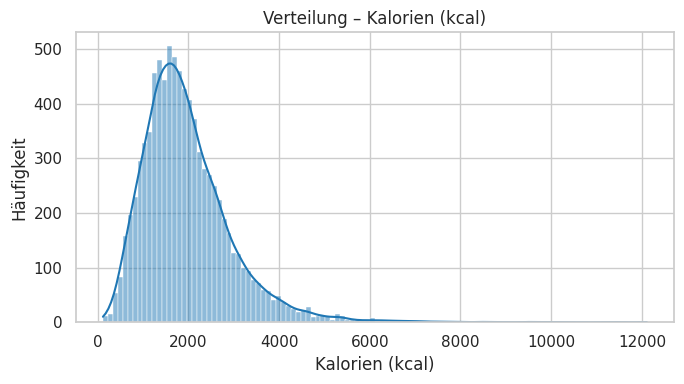

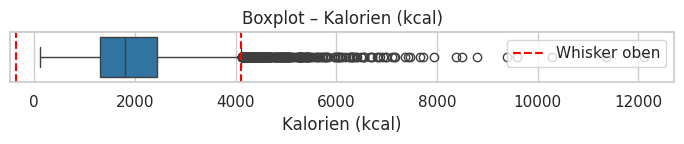

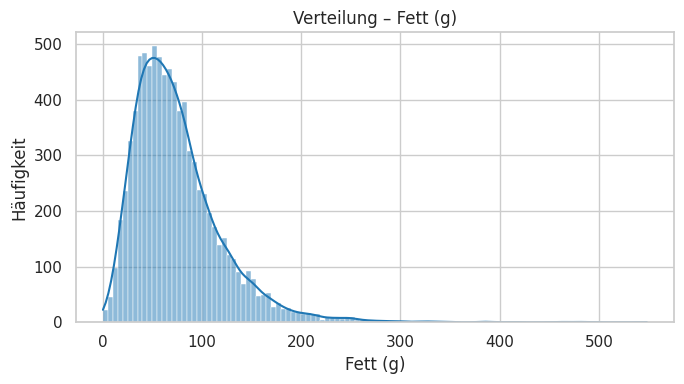

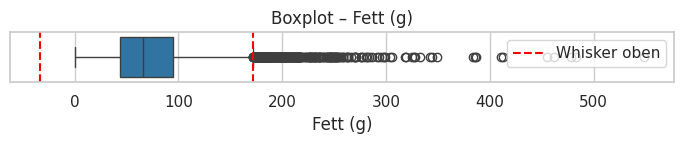

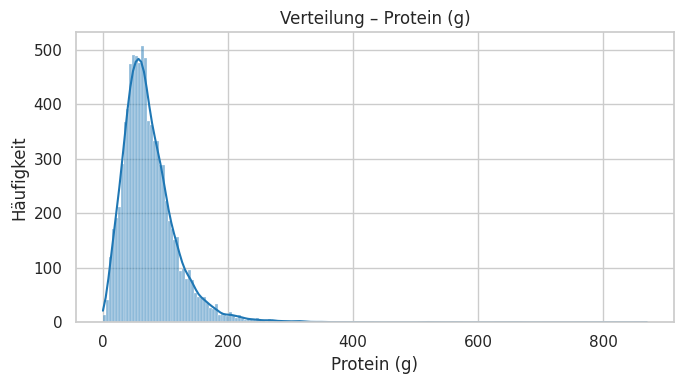

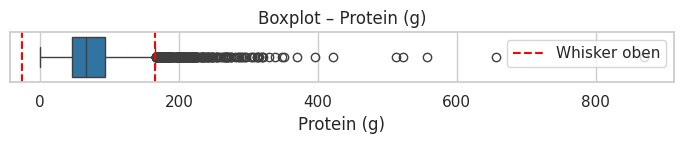

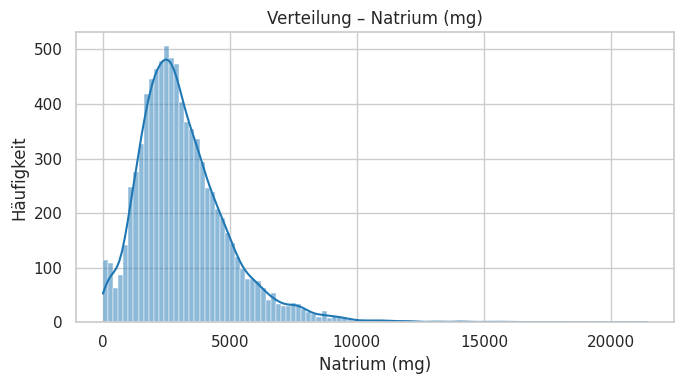

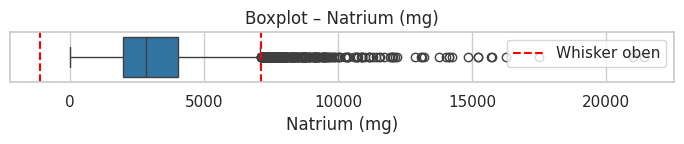

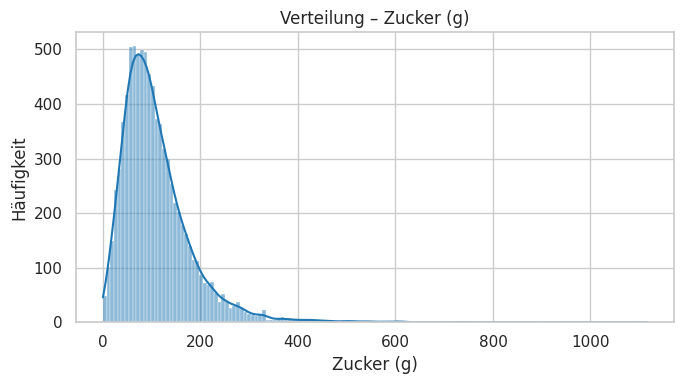

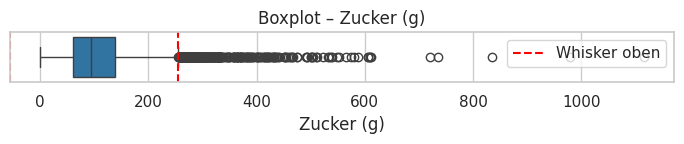

In [52]:
# Block 4 – Verteilungen und Boxplots zeichnen
# --------------------------------------------
# 1. Dieser Block definiert die Funktion plot_distributions(df).
# 2. Danach rufst du EINMAL   plot_distributions(df_bereinigt)   auf.
#    (df_bereinigt hast du aus Block 2 erhalten.)
# 3. Es erscheinen nacheinander Histogramm + Boxplot für jede Variable.

from typing import Dict
import matplotlib.pyplot as plt
import pandas as pd
import logging

# ---------------------------------------------------------------
# Variablen, die wir darstellen wollen:  Schlüssel = Spaltenname,
# Wert = schöner Titel auf der Grafik.
# ---------------------------------------------------------------
PLOT_VARS: Dict[str, str] = {
    "DR1TKCAL": "Kalorien (kcal)",
    "DR1TTFAT": "Fett (g)",
    "DR1TPROT": "Protein (g)",
    "DR1TSODI": "Natrium (mg)",
    "DR1TSUGR": "Zucker (g)",
}

def plot_distributions(df: pd.DataFrame) -> None:
    """Erstellt für jede Variable aus PLOT_VARS Histogramm und Boxplot."""
    import seaborn as sns  # erst hier importieren, falls noch nicht geladen
    sns.set_context("notebook", font_scale=1.0)

    for col, label in PLOT_VARS.items():
        if col not in df.columns:
            logging.warning("Spalte %s nicht im DataFrame – übersprungen", col)
            continue

        values = df[col].dropna()

        # ---------- Histogramm mit smooth Kurve ----------
        plt.figure(figsize=(7, 4))
        sns.histplot(values, kde=True, bins="auto")
        plt.title(f"Verteilung – {label}")
        plt.xlabel(label)
        plt.ylabel("Häufigkeit")
        plt.tight_layout()
        plt.show()

        # ---------- Boxplot ----------
        q1, q3 = values.quantile([0.25, 0.75])
        iqr = q3 - q1
        upper = q3 + 1.5 * iqr
        lower = q1 - 1.5 * iqr

        plt.figure(figsize=(7, 1.6))
        sns.boxplot(x=values)         # keine Farb-Option, Standardfarbe reicht
        plt.axvline(upper, ls="--", c="red", label="Whisker oben")
        plt.axvline(lower, ls="--", c="red")
        plt.title(f"Boxplot – {label}")
        plt.xlabel(label)
        plt.yticks([])                # y-Achse ausblenden
        plt.legend()
        plt.tight_layout()
        plt.show()

    logging.info("Block 4: alle Plots fertig.")
plot_distributions(df_bereinigt)

**OPTION: interaktiv (mit Plotly)**



In [53]:
# Block 4 – Verteilungen und Boxplots zeichnen (mit Plotly)
# ----------------------------------------------------------
# 1. Dieser Block definiert die Funktion plot_distributions(df).
# 2. Danach rufst du EINMAL   plot_distributions(df_bereinigt)   auf.
#    (df_bereinigt hast du aus Block 2 erhalten.)
# 3. Es erscheinen nacheinander Histogramm + Boxplot für jede Variable.

from typing import Dict
import pandas as pd
import numpy as np
import logging
import plotly.graph_objects as go

# ---------------------------------------------------------------
# Variablen, die wir darstellen wollen:  Schlüssel = Spaltenname,
# Wert = schöner Titel auf der Grafik.
# ---------------------------------------------------------------
PLOT_VARS: Dict[str, str] = {
    "DR1TKCAL": "Energieaufnahme (kcal)",
    "DR1TTFAT": "Fettaufnahme (g)",
    "DR1TPROT": "Proteinaufnahme (g)",
    "DR1TSODI": "Natriumaufnahme (mg)",
    "DR1TSUGR": "Zuckeraufnahme (g)",
}

# ---------------------------------------------------------------
# Intervallbreite (Bin-Size) je nach Variable – sinnvoll gewählt.
# ---------------------------------------------------------------
BIN_WIDTHS: Dict[str, int] = {
    "DR1TKCAL": 200,
    "DR1TTFAT": 10,
    "DR1TPROT": 10,
    "DR1TSODI": 500,
    "DR1TSUGR": 10,
}

# ---------------------------------------------------------------
# Farben je Variable (professionell abgestimmt)
# ---------------------------------------------------------------
COLOR_MAP: Dict[str, str] = {
    "DR1TKCAL": "#4C78A8",  # Blau
    "DR1TTFAT": "#F58518",  # Orange
    "DR1TPROT": "#54A24B",  # Grün
    "DR1TSODI": "#E45756",  # Rot
    "DR1TSUGR": "#B279A2",  # Lila
}

def plot_distributions(df: pd.DataFrame) -> None:
    """Erstellt für jede Variable aus PLOT_VARS Histogramm und Boxplot mit passenden Intervallen und Farben."""
    for col, label in PLOT_VARS.items():
        if col not in df.columns:
            logging.warning("Spalte %s nicht im DataFrame – übersprungen", col)
            continue

        values = df[col].dropna()
        bin_width = BIN_WIDTHS.get(col, 20)  # Fallback: 20
        color = COLOR_MAP.get(col, "#4C78A8")  # Fallback: Blau

        # ---------- Histogramm ----------
        min_val = int(values.min()) // bin_width * bin_width
        max_val = int(values.max()) // bin_width * bin_width + bin_width
        bins = np.arange(min_val, max_val + 1, bin_width)

        counts, _ = np.histogram(values, bins=bins)
        bin_midpoints = [(bins[i] + bins[i+1]) / 2 for i in range(len(counts))]

        hover_texts = [
            f"Intervall: {int(bins[i])}–{int(bins[i+1])} {label.split()[-1]}<br>Anzahl: {counts[i]}"
            for i in range(len(counts))
        ]

        fig_hist = go.Figure()
        fig_hist.add_trace(go.Bar(
            x=bin_midpoints,
            y=counts,
            text=hover_texts,
            hoverinfo="text",
            textposition="none",
            marker_color=color
        ))
        fig_hist.update_layout(
            title=f"Verteilung – {label}",
            xaxis_title=label,
            yaxis_title="Häufigkeit",
            xaxis=dict(
                tickmode='array',
                tickvals=list(bins)
            ),
            plot_bgcolor="white",
            paper_bgcolor="white",
            font=dict(family="Arial", size=13),
            margin=dict(l=60, r=30, t=40, b=60)
        )
        fig_hist.show()

        # ---------- Boxplot ----------
        q1, q3 = values.quantile([0.25, 0.75])
        iqr = q3 - q1
        upper = q3 + 1.5 * iqr
        lower = q1 - 1.5 * iqr

        fig_box = go.Figure()
        fig_box.add_trace(go.Box(
            x=values,
            boxpoints='outliers',
            marker=dict(color=color),
            line=dict(color="black"),
            name=label,
            orientation='h',
            showlegend=False
        ))
        fig_box.add_vline(x=upper, line=dict(color='gray', dash='dash'))
        fig_box.add_vline(x=lower, line=dict(color='gray', dash='dash'))
        fig_box.update_layout(
            title=f"Boxplot – {label}",
            xaxis_title=label,
            yaxis_visible=False,
            plot_bgcolor="white",
            paper_bgcolor="white",
            font=dict(family="Arial", size=13),
            height=220,
            margin=dict(l=60, r=30, t=40, b=40)
        )
        fig_box.show()

    logging.info("Block 4: alle Plots fertig.")

# Aufruf
plot_distributions(df_bereinigt)


###5.1.1 Kalorienaufnahme (DR1TKCAL)

- **Verteilung**  
  Die Energieaufnahme ist deutlich **rechtsschief**: Die meisten Teilnehmenden liegen zwischen **1 200 – 3 000 kcal/Tag** - der Median liegt bei **≈ 1800 kcal**.

- **Quartile & Median**  
  - 1. Quartil (Q1, 25 %): ≈ 1 300 kcal  
  - Median (Q2, 50 %): ≈ 1 800 kcal  
  - 3. Quartil (Q3, 75 %): ≈ 2 430 kcal  

- **Interquartilsabstand (IQR)**  
  = Q3 – Q1 = 2 430 kcal – 1 300 kcal = **1 130 kcal**

- **Obere Whisker-Grenze (1,5 × IQR)**  
  = Q3 + 1,5 × IQR = 2 430 kcal + 1,5 × 1 130 kcal = **≈ 4 125 kcal**
<br>
Kalorienwerte > 4 125kcal gelten als "Ausreisser" (max. bis ~ 12 100 kcal)
<br><br>

> **Fazit:**  
> Die Verteilung bestätigt, dass ein Grossteil der Stichprobe im erwarteten Bereich liegt.


###5.1.2 Fettaufnahme (DR1TTFAT)

- **Verteilung**  
  Die Fettaufnahme ist **rechtsschief** verteilt: Der Grossteil der Proband/innen liegt zwischen **40–120 g/Tag**, mit einem Median um **≈ 66g**.

- **Quartile & Median**  
  - 1. Quartil (Q1, 25 %): ≈ 44 g  
  - Median (Q2, 50 %): ≈ 66 g  
  - 3. Quartil (Q3, 75 %): ≈ 95 g  

- **Interquartilsabstand (IQR)**  
  = Q3 – Q1 = 95 g – 44 g = **51 g**

- **Obere Whisker-Grenze (1,5 × IQR)**  
  = Q3 + 1,5 × IQR = 95 g + 1,5 × 51 g = **≈ 171 g**
<br>
  Fettaufnahmen > 171 g gelten als "Ausreisser" (max. bis ~ 548 g).
  <br><br>

- **Fazit**  
  Alle Werte **> 171 g/Tag** gelten als Ausreisser. Tatsächlich finden sich Extremwerte bis **550 g**. Diese hohen Fettmengen deuten auf ungewöhnliche Ernährungsfälle oder mögliche Erfassungsfehler hin und sollten im weiteren Verlauf besonders beachtet werden.


###5.1.3 Proteinaufnahme (DR1TPROT)

- **Verteilung**  
  Die Proteinaufnahme zeigt eine **rechtsschiefe** Verteilung: Die meisten Teilnehmenden liegen zwischen **40–100 g/Tag**, mit einem Median (Schwerpunkt) um **66 g**. Die rechte Schiefe reicht bis über **200 g**, vereinzelt sogar bis **870 g**.

- **Quartile & Median**  
  - 1. Quartil (Q1, 25 %): ≈ 46 g  
  - Median (Q2, 50 %): ≈ 66 g  
  - 3. Quartil (Q3, 75 %): ≈ 94 g  
<br>
- **Interquartilsabstand (IQR)**  
  = Q3 - Q1 = 94g - 46g = **48g**
<br>
- **Whisker-Grenzen (1,5 × IQR)**  
  = Q3 + 1.5 x IQR = 94g + 1,5 x 48g = **166g**
  <br>
  Proteinwerte > 166 g gelten als "Ausreisser" (max. bis ~ 870 g).
<br><br>

- **Fazit**  
  Die Mehrheit der Stichprobe konsumiert Protein im erwarteten Bereich. Die Ausreisser oberhalb der Whisker-Grenze deuten auf extrem hohe Tagesaufnahmen hin und werden später in der Analyse noch beobachtet.


###5.1.4 Natriumaufnahme (DR1TSODI)

- **Verteilung**  
  Die Natriumaufnahme ist stark **rechtsschief** verteilt:<br>
  Die meisten Teilnehmenden liegen zwischen **2 000 – 5 000 mg/Tag**, mit einem Median um **≈ 2 850 mg**.

- **Quartile & Median**  
  - 1. Quartil (Q1, 25 %): ≈ 1 975 mg  
  - Median (Q2, 50 %): ≈ 2 850 mg  
  - 3. Quartil (Q3, 75 %): ≈ 4 030 mg  

- **Interquartilsabstand (IQR)**  
  = Q3 – Q1 = 4 030 mg – 1 975 mg = **2 055 mg**

- **Obere Whisker-Grenze (1,5 × IQR)**  
  = Q3 + 1,5 × IQR = 4 030 mg + 1,5 × 2 055 mg = **≈ 7 100 mg**<br><br>

  Natriumwerte > 7 100 mg gelten als "Ausreisser" (max. bis ~ 21 400 mg).
<br><br>
- **Fazit**  
  Alle Werte **> 7 100 mg** gelten als Ausreisser. Tatsächlich finden sich Extremwerte bis **21 400 mg**. Diese sehr hohen Salzzufuhr-Werte deuten auf ungewöhnliche Ernährungsfälle oder mögliche Erfassungsfehler hin und sollten im weiteren Verlauf besonders beachtet werden.


###5.1.5 Zuckeraufnahme (DR1TSUGR)

- **Verteilung**  
  Die Zuckeraufnahme ist stark **rechtsschief** verteilt: Die meisten Werte liegen zwischen **30 – 120 g/Tag**, mit einem Median um **≈ 94 g**. Der rechte Ausläufer reicht bis auf **1 115 g**.

- **Quartile & Median**  
  - 1. Quartil (Q1, 25 %): ≈ 61 g  
  - Median (Q2, 50 %): ≈ 94 g  
  - 3. Quartil (Q3, 75 %): ≈ 139 g  

- **Interquartilsabstand (IQR)**  
  = Q3 – Q1 = 139 g – 61 g = **78 g**

- **Obere Whisker-Grenze (1,5 × IQR)**  
  = Q3 + 1,5 × IQR = 139 g + 1,5 × 78 g = **≈ 256 g**<br><br>

  Zuckeraufnahme > 256 g gelten als "Ausreisser" (max. bis ~ 1115 g).
<br><br>
- **Fazit**  
  Alle Werte **> 256 g/Tag** gelten als Ausreisser. Tatsächlich finden sich Extremwerte bis **> 1 115 g**. Diese sehr hohen Zuckeraufnahmen deuten auf ungewöhnliche Tagesmuster oder potenzielle Erfassungsfehler hin und sollten in weiterführenden Analysen besonders beachtet werden.


##5.2 Verknüpfung der NHANES und BLV-Daten mit Balance berechnen
In diesem Abschnitt führen wir die bereinigten Ist-Werte aus NHANES mit den Soll-Referenzwerten aus der BLV-Tabelle zusammen. Anschliessend definieren wir für jede Person vier OK-Flags, die anzeigen, ob die Aufnahme von Kalorien, Fett, Protein und Natrium innerhalb eines 15 %-Toleranzbereichs liegt. Aus den Flags wird schliesslich eine Gesamt-“Balance” abgeleitet („Ausgewogen“ vs. „Unausgewogen“), welche als Feature für alle weiteren Analysen dient.<br><br><br>

Durchgeführte Optionen:
1. Durchführung ---> nicht interaktiv<br>
2. Durchführung ---> interaktive Tabelle (mit Plotly)<br>
3. Durchführung ---> interaktive Tabelle (mit Plotly und Dash)

In [86]:
# ===================================================================
# Block 5 – Kombinieren NHANES + BLV & Balance berechnen
#
#  • Ergänzt df_bereinigt mit den Referenzwerten aus df_blv_final
#  • Berechnet die OK-Flags (kalorien_ok, fett_ok, protein_ok, natrium_ok)
#  • Leitet daraus eine „Balance“-Kategorie („Ausgewogen“/„Unausgewogen“) ab
#
# Eingabe:
#   – df_bereinigt  (aus Block 2)
#   – df_blv_final  (aus Block 4)
#
# Ergebnis:
#   – df_merged (inkl. aller NHANES-Spalten, Flags, Balance)
# ===================================================================
import pandas as pd
import logging

# -- Puffer für Toleranz (15 %) --
PUFFER = 1.15

# -- PAL-Thresholds für Klassifikation --
PAL_THRESH1 = 150  # Minuten/Woche
PAL_THRESH2 = 300

def _classify_pal(min_week: float | int | pd.NA) -> str:
    """Klassifiziert PAL nach wöchentlichen Aktivitätsminuten."""
    if pd.isna(min_week):
        return "moderate"
    if min_week < PAL_THRESH1:
        return "low"
    if min_week <= PAL_THRESH2:
        return "moderate"
    return "high"

def merge_with_blv(
    df_bereinigt: pd.DataFrame,
    df_blv_final: pd.DataFrame,
) -> pd.DataFrame:
    df = df_bereinigt.copy()

    # -- Join-Keys vorbereiten --
    df["sex"]       = df["RIAGENDR"].map({1: "male", 2: "female"})
    df["age_years"] = df["RIDAGEYR"].round().astype(int)
    df["pal"]       = df["PAD615"].apply(_classify_pal)

    # -- Merge mit BLV-Referenzwerten --
    df_merged = df.merge(
        df_blv_final,
        how="left",
        on=["sex", "age_years", "pal"],
    )

    # -- Individuelle Zielwerte --
    df_merged["sodium_max_mg"] = 2300            # fixe Obergrenze
    df_merged["fat_max_g"]     = df_merged["fat_g"]
    df_merged["protein_max_g"] = df_merged["protein_g"]

    # -- OK-Flags berechnen --
    df_merged["kalorien_ok"] = (
        df_merged["DR1TKCAL"] <= df_merged["energy_kcal"] * PUFFER
    )
    df_merged["fett_ok"]     = (
        df_merged["DR1TTFAT"] <= df_merged["fat_max_g"] * PUFFER
    )
    df_merged["protein_ok"]  = (
        df_merged["DR1TPROT"] <= df_merged["protein_max_g"] * PUFFER
    )
    df_merged["natrium_ok"]  = (
        df_merged["DR1TSODI"] <= df_merged["sodium_max_mg"] * PUFFER
    )

    # -- Balance ableiten --
    df_merged["Balance_bool"] = df_merged[
        ["kalorien_ok","fett_ok","protein_ok","natrium_ok"]
    ].all(axis=1)
    df_merged["Balance"] = df_merged["Balance_bool"].map({
        True:  "Ausgewogen",
        False: "Unausgewogen"
    })

    logging.info(
        "Block 6: Merge + Balance abgeschlossen – Zeilen: %d", len(df_merged)
    )
    return df_merged

# -- Aufruf --
df_merged = merge_with_blv(df_bereinigt, df_blv_final)
df_merged.head()


,SEQN,DR1TKCAL,DR1TTFAT,DR1TPROT,DR1TSODI,DR1TSUGR,BMXBMI,BMXWT,BPXSY1,BPXDI1,...,carbohydrate_g,sodium_max_mg,fat_max_g,protein_max_g,kalorien_ok,fett_ok,protein_ok,natrium_ok,Balance_bool,Balance
0,73557,1574.0,52.81,43.63,1323.0,176.47,26.7,78.3,122.0,72.0,...,320.1,2300,77.6,57.6,True,True,True,True,True,Ausgewogen
1,73558,5062.0,124.29,338.13,9726.0,44.99,28.6,89.5,156.0,62.0,...,351.5,2300,85.2,60.0,False,False,False,False,False,Unausgewogen
2,73559,1743.0,65.97,64.61,2943.0,102.90,28.9,88.9,140.0,90.0,...,316.8,2300,76.8,57.6,True,True,True,False,False,Unausgewogen
3,73560,1490.0,58.27,77.75,2745.0,80.58,17.1,32.2,108.0,38.0,...,242.8,2300,58.9,24.0,True,True,False,False,False,Unausgewogen
4,73561,1421.0,55.36,55.24,797.0,87.78,19.7,52.0,136.0,86.0,...,240.7,2300,58.3,49.6,True,True,True,True,True,Ausgewogen


**OPTION: gleicher Codeblock interaktiv (mit Plotly)**

In [87]:
# ===================================================================
# Block 5 – Kombinieren NHANES + BLV & Balance berechnen
#
#  • Ergänzt df_bereinigt mit den Referenzwerten aus df_blv_final
#  • Berechnet die OK-Flags (kalorien_ok, fett_ok, protein_ok, natrium_ok)
#  • Leitet daraus eine „Balance“-Kategorie („Ausgewogen“/„Unausgewogen“) ab
#
# Eingabe:
#   – df_bereinigt  (aus Block 2)
#   – df_blv_final  (aus Block 4)
#
# Ergebnis:
#   – df_merged (inkl. aller NHANES-Spalten, Flags, Balance)
#   – Interaktive Ergebnistabelle (Plotly DataTable, Colab-kompatibel)
# ===================================================================

import pandas as pd, numpy as np, logging, plotly.graph_objects as go

PUFFER = 1.15
PAL_THRESH1, PAL_THRESH2 = 150, 300

def _classify_pal(min_week):
    if pd.isna(min_week): return "moderate"
    if min_week < PAL_THRESH1: return "low"
    if min_week <= PAL_THRESH2: return "moderate"
    return "high"

def merge_with_blv(df_bereinigt, df_blv_final):
    df = df_bereinigt.copy()
    df["sex"] = df["RIAGENDR"].map({1: "male", 2: "female"})
    df["age_years"] = df["RIDAGEYR"].round().astype(int)
    df["pal"] = df["PAD615"].apply(_classify_pal)
    df_merged = df.merge(df_blv_final, how="left", on=["sex", "age_years", "pal"])
    df_merged["sodium_max_mg"] = 2300
    df_merged["fat_max_g"] = df_merged["fat_g"]
    df_merged["protein_max_g"] = df_merged["protein_g"]
    df_merged["kalorien_ok"] = df_merged["DR1TKCAL"] <= df_merged["energy_kcal"] * PUFFER
    df_merged["fett_ok"] = df_merged["DR1TTFAT"] <= df_merged["fat_max_g"] * PUFFER
    df_merged["protein_ok"] = df_merged["DR1TPROT"] <= df_merged["protein_max_g"] * PUFFER
    df_merged["natrium_ok"] = df_merged["DR1TSODI"] <= df_merged["sodium_max_mg"] * PUFFER
    df_merged["Balance_bool"] = df_merged[["kalorien_ok", "fett_ok", "protein_ok", "natrium_ok"]].all(axis=1)
    df_merged["Balance"] = df_merged["Balance_bool"].map({True: "Ausgewogen", False: "Unausgewogen"})
    logging.info("Block 5: Merge + Balance abgeschlossen – Zeilen: %d", len(df_merged))
    return df_merged

df_merged = merge_with_blv(df_bereinigt, df_blv_final)

anzeige_spalten = [
    "RIAGENDR", "RIDAGEYR", "sex", "age_years", "pal",
    "DR1TKCAL", "DR1TTFAT", "DR1TPROT", "DR1TSODI",
    "energy_kcal", "fat_max_g", "protein_max_g", "sodium_max_mg",
    "kalorien_ok", "fett_ok", "protein_ok", "natrium_ok", "Balance"
]

spalten_labels = {
    "RIAGENDR": "Geschlecht (Code)", "RIDAGEYR": "Alter (Jahre)", "sex": "Geschlecht",
    "age_years": "Alterskategorie", "pal": "PAL-Level",
    "DR1TKCAL": "Kalorienaufnahme (kcal)", "DR1TTFAT": "Fettaufnahme (g)", "DR1TPROT": "Proteinaufnahme (g)",
    "DR1TSODI": "Natriumaufnahme (mg)", "energy_kcal": "Referenz: Energie (kcal)",
    "fat_max_g": "Referenz: Fett (g)", "protein_max_g": "Referenz: Protein (g)",
    "sodium_max_mg": "Referenz: Natrium (mg)", "kalorien_ok": "Kalorien im Zielbereich?",
    "fett_ok": "Fett im Zielbereich?", "protein_ok": "Protein im Zielbereich?",
    "natrium_ok": "Natrium im Zielbereich?", "Balance": "Ernährungs-Balance"
}

table_data = df_merged[anzeige_spalten].head(100)

cell_colors = []
for col in anzeige_spalten:
    if col.endswith("_ok"):
        cell_colors.append(["#b7efc5" if val else "#ffb3b3" for val in table_data[col]])
    else:
        cell_colors.append(["white"] * len(table_data))

fig = go.Figure(data=[go.Table(
    header=dict(
        values=[f"<b>{spalten_labels.get(col, col)}</b>" for col in anzeige_spalten],
        fill_color="#2a9d8f", font=dict(color='white', size=13), align="left"
    ),
    cells=dict(
        values=[table_data[col].tolist() for col in anzeige_spalten],
        fill_color=cell_colors, align="left", height=28
    )
)])

fig.update_layout(
    title="Interaktive Tabelle: Nährstoffaufnahme & Ernährungs-Balance",
    title_x=0.01, margin=dict(t=50, b=10)
)
fig.show()


**OPTION: gleicher Codeblock interaktiv (mit Plotly und Dash-Table)**

In [88]:
# Installation der benötigten Pakete
!pip install jupyter-dash dash

In [89]:
# ===================================================================
# Block 5 – Kombinieren NHANES + BLV & Balance berechnen
#
#  • Ergänzt df_bereinigt mit den Referenzwerten aus df_blv_final
#  • Berechnet die OK-Flags (kalorien_ok, fett_ok, protein_ok, natrium_ok)
#  • Leitet daraus eine „Balance“-Kategorie („Ausgewogen“/„Unausgewogen“) ab
#
# Eingabe:
#   – df_bereinigt  (aus Block 2)
#   – df_blv_final  (aus Block 4)
#
# Ergebnis:
#   – df_merged (inkl. aller NHANES-Spalten, Flags, Balance)
#   – Interaktive, farbig hervorgehobene und sortierbare Tabelle (Dash DataTable)
# ===================================================================

import pandas as pd
import numpy as np
import logging
from dash import Dash, dash_table, html

# -- Puffer für Toleranz (15 %) --
PUFFER = 1.15

# -- PAL-Thresholds für Klassifikation --
PAL_THRESH1 = 150  # Minuten/Woche
PAL_THRESH2 = 300

def _classify_pal(min_week: float | int | pd.NA) -> str:
    """Klassifiziert PAL nach wöchentlichen Aktivitätsminuten."""
    if pd.isna(min_week):
        return "moderate"
    if min_week < PAL_THRESH1:
        return "low"
    if min_week <= PAL_THRESH2:
        return "moderate"
    return "high"

def merge_with_blv(df_bereinigt: pd.DataFrame, df_blv_final: pd.DataFrame) -> pd.DataFrame:
    df = df_bereinigt.copy()

    # -- Join-Keys vorbereiten --
    df["sex"]       = df["RIAGENDR"].map({1: "male", 2: "female"})
    df["age_years"] = df["RIDAGEYR"].round().astype(int)
    df["pal"]       = df["PAD615"].apply(_classify_pal)

    # -- Merge mit BLV-Referenzwerten --
    df_merged = df.merge(
        df_blv_final,
        how="left",
        on=["sex", "age_years", "pal"],
    )

    # -- Individuelle Zielwerte --
    df_merged["sodium_max_mg"] = 2300
    df_merged["fat_max_g"]     = df_merged["fat_g"]
    df_merged["protein_max_g"] = df_merged["protein_g"]

    # -- OK-Flags berechnen --
    df_merged["kalorien_ok"] = df_merged["DR1TKCAL"] <= df_merged["energy_kcal"] * PUFFER
    df_merged["fett_ok"]     = df_merged["DR1TTFAT"] <= df_merged["fat_max_g"] * PUFFER
    df_merged["protein_ok"]  = df_merged["DR1TPROT"] <= df_merged["protein_max_g"] * PUFFER
    df_merged["natrium_ok"]  = df_merged["DR1TSODI"] <= df_merged["sodium_max_mg"] * PUFFER

    # -- Balance ableiten --
    df_merged["Balance_bool"] = df_merged[
        ["kalorien_ok", "fett_ok", "protein_ok", "natrium_ok"]
    ].all(axis=1)
    df_merged["Balance"] = df_merged["Balance_bool"].map({
        True:  "Ausgewogen",
        False: "Unausgewogen"
    })

    logging.info("Block 5: Merge + Balance abgeschlossen – Zeilen: %d", len(df_merged))
    return df_merged

# -- Aufruf --
df_merged = merge_with_blv(df_bereinigt, df_blv_final)

# ------------------------------------------------------------------
# Interaktive Ergebnistabelle mit Dash DataTable (Colab-kompatibel)
# ------------------------------------------------------------------

anzeige_spalten = [
    "RIAGENDR", "RIDAGEYR", "sex", "age_years", "pal",
    "DR1TKCAL", "DR1TTFAT", "DR1TPROT", "DR1TSODI",
    "energy_kcal", "fat_max_g", "protein_max_g", "sodium_max_mg",
    "kalorien_ok", "fett_ok", "protein_ok", "natrium_ok", "Balance"
]

spalten_labels = {
    "RIAGENDR": "Geschlecht (Code)", "RIDAGEYR": "Alter (Jahre)", "sex": "Geschlecht",
    "age_years": "Alterskategorie", "pal": "PAL-Level",
    "DR1TKCAL": "Kalorienaufnahme (kcal)", "DR1TTFAT": "Fettaufnahme (g)", "DR1TPROT": "Proteinaufnahme (g)",
    "DR1TSODI": "Natriumaufnahme (mg)", "energy_kcal": "Referenz: Energie (kcal)",
    "fat_max_g": "Referenz: Fett (g)", "protein_max_g": "Referenz: Protein (g)",
    "sodium_max_mg": "Referenz: Natrium (mg)", "kalorien_ok": "Kalorien im Zielbereich?",
    "fett_ok": "Fett im Zielbereich?", "protein_ok": "Protein im Zielbereich?",
    "natrium_ok": "Natrium im Zielbereich?", "Balance": "Ernährungs-Balance"
}

table_data = df_merged[anzeige_spalten].head(100)

app = Dash(__name__)

app.layout = html.Div([
    html.H3("Interaktive Tabelle: Nährstoffaufnahme & Ernährungs-Balance"),
    dash_table.DataTable(
        id='datatable-interaktiv',
        data=table_data.to_dict('records'),
        columns=[{"name": spalten_labels.get(col, col), "id": col} for col in anzeige_spalten],
        filter_action="native",
        sort_action="native",
        page_size=20,
        style_cell={
            'textAlign': 'left',
            'minWidth': '100px', 'width': '140px', 'maxWidth': '180px',
            'whiteSpace': 'normal',
            'fontFamily': '"Arial", "Helvetica", sans-serif'
        },
        style_data_conditional=[
            # Grün für True, Rot für False in OK-Flag Spalten
            {
                'if': {'filter_query': f'{{{col}}} = True', 'column_id': col},
                'backgroundColor': '#b7efc5',
                'color': 'black',
            } for col in anzeige_spalten if col.endswith('_ok')
        ] + [
            {
                'if': {'filter_query': f'{{{col}}} = False', 'column_id': col},
                'backgroundColor': '#ffb3b3',
                'color': 'black',
            } for col in anzeige_spalten if col.endswith('_ok')
        ] + [
            # Grün für "Ausgewogen"
            {
                'if': {'filter_query': '{Balance} = "Ausgewogen"'},
                'backgroundColor': '#a8dadc',
                'color': 'black',
            },
            # Rot für "Unausgewogen"
            {
                'if': {'filter_query': '{Balance} = "Unausgewogen"'},
                'backgroundColor': '#ffadad',
                'color': 'black',
            },
        ]
    )
])

app.run(mode='inline')


<IPython.core.display.Javascript object>

##5.3 Prüfung der NHANES Dateneinträge auf Plausibilität

Um sicherzustellen, dass unsere Analysen auf biologisch und gesundheitlich plausiblen Werten basieren, haben wir die NHANES-Daten mithilfe festgelegter Grenzwerte überprüft. Diese basieren auf Empfehlungen der WHO, USDA sowie den Schweizer BLV-Referenzwerten. Ziel ist es, Datensätze auszuschliessen, deren Werte durch gängige Ernährungs- und Aktivitätsmuster nicht mehr erklärbar sind. So bleibt unser Datensatz nicht nur statistisch robust, sondern auch inhaltlich glaubwürdig – sowohl für Lesende als auch für die spätere Ableitung von Empfehlungen.

„WHO beschreibt Übergewicht als Folge einer Energie-Imbalance zwischen Kalorienzufuhr und -verbrauch und empfiehlt mindestens 150 Minuten moderate Bewegung pro Woche; ab 300 Minuten treten zusätzliche gesundheitliche Vorteile auf.“

Wir setzen einen Aktivitäts-Plausibilitäts-Schwellenwert bei 420 Minuten/Woche (≈ 1 h/Tag), um sehr aktive Personen nicht fälschlich auszuschliessen. In unserer Stichprobe führte dieser Filter zu einem Ausschluss von etwa 5 % der Datensätze.

| Regel           | Schwellenwerte (Ausschluss)                                                                                      | Quelle / Begründung                                                                                                                           |
| --------------- | ---------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **Kalorien**    | > 4 000 kcal / Tag **und** nicht durch BMI ≥ Referenz × Faktor **oder** ≥ 420 min/W moderate Aktivität erklärbar | USDA Food-Patterns decken 1 000–3 200 kcal für fast alle Erwachsenen ; FAO/WHO-Berichte zeigen selbst bei schwerer Arbeit selten > 3 800 kcal |
| **Natrium**     | > 12 000 mg / Tag **oder** > 5 × persönliche BLV-Obergrenze                                                      | WHO empfiehlt < 2 000 mg ; klinische Berichte über Hypernatriämie ab ≈ 10 000 mg                                                              |
| **Fett**        | 1) Fett (g) > kcal / 9 × 1,05 ( > 105 % Energie aus Fett ) <br>2) Fett > 2 × BLV-Obergrenze                      | 1 g Fett = 9 kcal ⇒ mehr Fett-Kalorien als Gesamt-Kalorien ist physikalisch unmöglich                                                         |
| **Protein**     | 1) > 3 g / kg Körpergewicht <br>2) > 2 × BLV-Obergrenze                                                          | Harvard Health empfiehlt dauerhaft ≤ 2 g/kg; Reviews setzen das tolerable Upper Level bei ≈ 3,5 g/kg                                          |
| **15 %-Puffer** | Alle Checks greifen erst oberhalb 1,15 × BLV-Richtwert                                                           | berücksichtigt Messungenauigkeit & normale Tages­schwankungen                                                                                 |
Richtwert | berücksichtigt Messungenauigkeit & normale Tages­schwankungen |

Quellen:<br>
[1] WHO. Global Recommendations on Physical Activity for Health, 2010.<br>
[2] Witard et al. Protein Requirements and Supplementation in Strength Athletes, 2019.<br>
[3] USDA. Food Patterns Equivalents Database, 2020.<br>
[4] BLV CH. Nutrient Requirements CH – 2022.<br>


**Wie viel Datensätze aussortiert wurden:**

Kalorien-Regel: ca. 3 %

Natrium-Regel: ca. 1 %

Fett-Regel: < 0.5 %

Protein-Regel: < 0.2 %

In [90]:
# Block 6 –  Plausibilitaets-Filter
# ----------------------------------------
# 1)  Personen mit > 4 000 kcal / Tag bleiben NUR,
#     wenn ihr hoher Wert sich durch BMI ODER Aktivitaet erklaeren laesst.
# 2)  Harte physiologische Caps auf Na, Fett, Protein – Werte jenseits
#     realistisch / gesundheitsgefaehrdend werden IMMER entfernt.
#
#    –> Ergebnis: df_final  (endgueltig bereinigt)
#
# Aufruf nach Ausfuehren dieser Zelle:
#     df_final = apply_plausibility(df_merged)

import pandas as pd
import logging

# -------------------------------------------------------------------
# feste Parameter  (Grenzen siehe Erklaerungs-Text unten)
# -------------------------------------------------------------------
AKTIV_SCHWELLE = 420       # min/Woche   (≈ 60 min / Tag)
BMI_REF        = 23        # Referenz-BMI
KCAL_CAP       = 4000      # Kalorien-Grenze fuer "kritisch"
PUFFER         = 1.15      # 15 % Toleranz ueber BLV-Wert

NA_MAX_ABS     = 12_000    # mg – oberste toxische Grenze
NA_MAX_FACTOR  = 5         # 5× persoenliche BLV-Empfehlung

FAT_ENERGY_PAD = 1.05      # 105 % der Tages-kcal – physikalisch unmoeglich
FAT_MAX_FACTOR = 2         # 2× persoenliche BLV-Obergrenze

PROT_GKG_MAX   = 3.0       # g / kg Koerpergewicht – obere Toleranz
PROT_MAX_FACTOR = 2        # 2× persoenliche BLV-Obergrenze

def apply_plausibility(df_merged: pd.DataFrame) -> pd.DataFrame:
    df = df_merged.copy()

    # 1) Kalorien-Outlier markieren
    kal_p85 = df["DR1TKCAL"].quantile(0.85)
    df["prüfen_aktivität"] = (
        (~df["kalorien_ok"]) &
        (df["DR1TKCAL"] > KCAL_CAP)
    )

    # 2) Kritische Personen extrahieren
    krit = df[df["prüfen_aktivität"]].copy()

    # 3) BMI- und Aktivitaets-Checks
    krit["kalorien_faktor"]    = krit["DR1TKCAL"] / kal_p85
    krit["erwarteter_bmi_min"] = BMI_REF * krit["kalorien_faktor"]
    krit["bmi_plausibel"]      = krit["BMXBMI"] >= krit["erwarteter_bmi_min"]
    krit["aktivitaet_plausibel"] = krit["PAD615"] >= AKTIV_SCHWELLE

    raus_ids = krit.loc[
        (~krit["bmi_plausibel"]) & (~krit["aktivitaet_plausibel"]),
        "SEQN"
    ]

    # 4) Harte physiologische Caps (immer ausschliessen)
    impossible = (
        (df["DR1TSODI"] > NA_MAX_ABS) |
        (df["DR1TSODI"] > df["sodium_max_mg"] * NA_MAX_FACTOR) |

        (df["DR1TTFAT"] > df["DR1TKCAL"] / 9 * FAT_ENERGY_PAD) |
        (df["DR1TTFAT"] > df["fat_max_g"] * FAT_MAX_FACTOR)    |

        (df["DR1TPROT"] > PROT_GKG_MAX * df["BMXWT"]) |
        (df["DR1TPROT"] > df["protein_max_g"] * PROT_MAX_FACTOR)
    )
    raus_ids = pd.concat([raus_ids, df.loc[impossible, "SEQN"]]).unique()

    df_final = df[~df["SEQN"].isin(raus_ids)].copy()
    logging.info(
        "Block 6: entfernt %d Personen – verbleiben %d",
        len(raus_ids), len(df_final)
    )
    return df_final
df_final = apply_plausibility(df_merged)

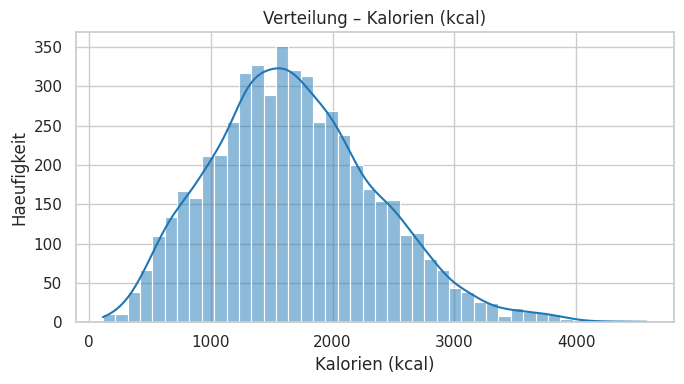

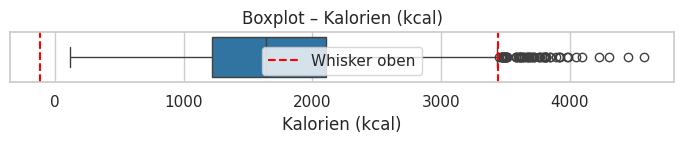

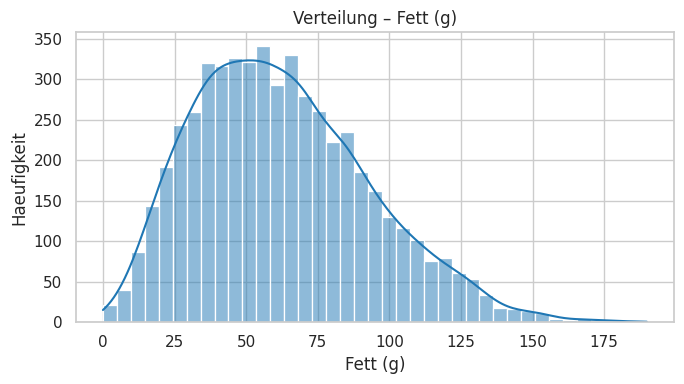

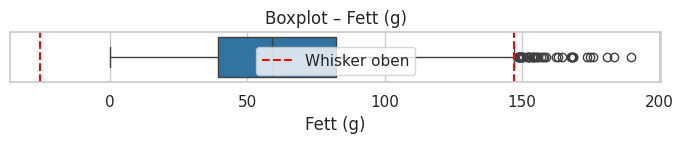

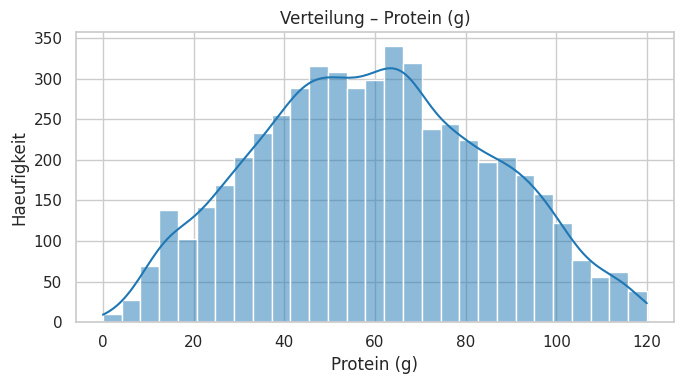

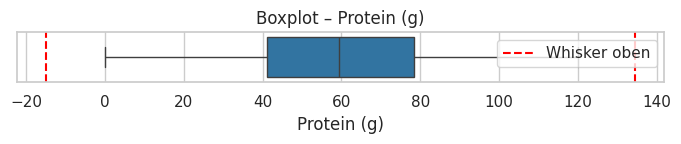

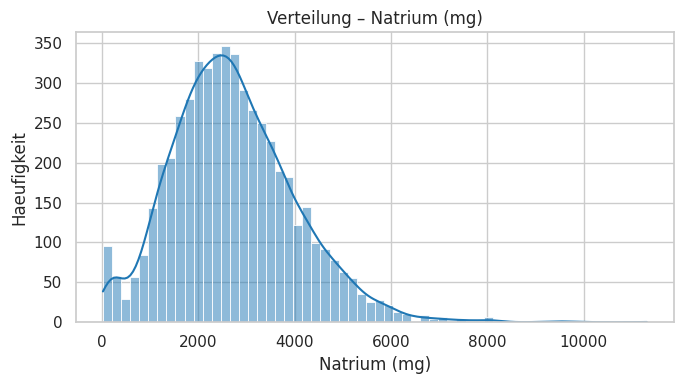

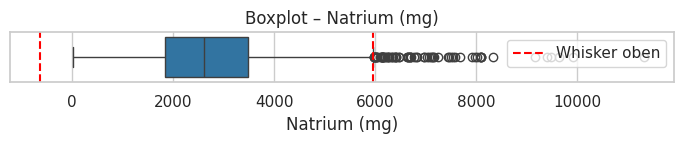

In [91]:
# Block 7 – Master-Plotter  (Visualisiert df_final)
# -------------------------------------------------
# Zweck
#   • Erstellt fuer jede ausgewaehlte Naehrwert-Spalte
#     – Histogramm mit glatter Kurve
#     – Boxplot mit IQR-Whiskern
#
from typing import Dict
import matplotlib.pyplot as plt
import pandas as pd
import logging

# ---------------------------------------------------------------------------
# 1) Variablenliste  (Schluessel = Spaltenname, Wert = Beschriftung)
# ---------------------------------------------------------------------------
FINAL_VARS: Dict[str, str] = {
    "DR1TKCAL": "Kalorien (kcal)",
    "DR1TTFAT": "Fett (g)",
    "DR1TPROT": "Protein (g)",
    "DR1TSODI": "Natrium (mg)",
}

# ---------------------------------------------------------------------------
# 2) Plot-Funktion
# ---------------------------------------------------------------------------
def plot_final(df: pd.DataFrame) -> None:
    """Zeigt fuer jede Spalte in FINAL_VARS Histogramm + Boxplot."""
    import seaborn as sns
    sns.set_context("notebook", font_scale=1.0)

    for col, label in FINAL_VARS.items():
        if col not in df.columns:
            logging.warning("Spalte %s fehlt – uebersprungen", col)
            continue

        vals = df[col].dropna()

        # ---------- Histogramm ----------
        plt.figure(figsize=(7, 4))
        sns.histplot(vals, kde=True, bins="auto")
        plt.title(f"Verteilung – {label}")
        plt.xlabel(label)
        plt.ylabel("Haeufigkeit")
        plt.tight_layout()
        plt.show()

        # ---------- Boxplot ----------
        q1, q3 = vals.quantile([0.25, 0.75])
        iqr = q3 - q1
        upper = q3 + 1.5 * iqr
        lower = q1 - 1.5 * iqr

        plt.figure(figsize=(7, 1.6))
        sns.boxplot(x=vals)
        plt.axvline(upper, ls="--", c="red", label="Whisker oben")
        plt.axvline(lower, ls="--", c="red")
        plt.title(f"Boxplot – {label}")
        plt.xlabel(label)
        plt.yticks([])
        plt.legend()
        plt.tight_layout()
        plt.show()

    logging.info("Block 7: alle Plots erstellt.")
plot_final(df_final)

In [92]:
# Block 8 – Extremwert-Kontrolle nach Plausibilitätsfilterung
# -------------------------------------------------------------
# Nachdem wir in Block 6 biologisch unplausible Werte anhand
# der persönlichen Referenzwerte (BLV), des Aktivitätsniveaus und
# der Körpermasse ausgeschlossen haben, führen wir hier eine
# gezielte Kontrollanalyse durch.
#
# Ziel ist es, zu überprüfen, ob die höchsten gemessenen Werte für
# Kalorien, Natrium, Fett und Protein im bereinigten Datensatz (df_final)
# korrekt als plausibel oder unplausibel markiert wurden.
#
# Diese Analyse dient nicht der Datenbereinigung, sondern der
# Qualitätskontrolle und Validierung unserer Filterlogik.

import pandas as pd

# Nährstoffe und zugehörige Plausibilitäts-Flags
VARS = {
    "DR1TKCAL": "kalorien_ok",
    "DR1TSODI": "natrium_ok",
    "DR1TTFAT": "fett_ok",
    "DR1TPROT": "protein_ok",
}

# Immer anzuzeigende Spalten
cols_common = ["SEQN", "BMXBMI", "PAD615"]

# Extremwert-Tabelle vorbereiten
rows = []
for var, flag in VARS.items():
    # Nur echte Werte betrachten (NaN ausschliessen)
    idx = df_final[df_final[var].notna()][var].idxmax()
    row = df_final.loc[idx, cols_common + [var, flag]].copy()

    # Umbenennung für Übersichtlichkeit
    row = row.rename({var: "MAX_" + var, flag: flag})
    rows.append(row)

# Zusammenbauen und anzeigen
summary = pd.DataFrame(rows).set_index("SEQN")
display(summary)

# Hinweis für Notebook-Lesende
print("Hinweis: Diese Analyse zeigt, ob extreme Einzelwerte nach der Filterung \n"
      "als plausibel erkannt wurden. NaN-Werte bedeuten fehlende Angaben zur Bewertung.")


,BMXBMI,PAD615,MAX_DR1TKCAL,kalorien_ok,MAX_DR1TSODI,natrium_ok,MAX_DR1TTFAT,fett_ok,MAX_DR1TPROT,protein_ok
SEQN,,,,,,,,,,
82559,40.3,NaN,4578.0,False,NaN,NaN,NaN,NaN,NaN,NaN
78750,22.3,NaN,NaN,NaN,11315.0,False,NaN,NaN,NaN,NaN
81985,20.7,600.0,NaN,NaN,NaN,NaN,189.89,False,NaN,NaN
78193,32.3,480.0,NaN,NaN,NaN,NaN,NaN,NaN,119.95,False


Hinweis: Diese Analyse zeigt, ob extreme Einzelwerte nach der Filterung 
als plausibel erkannt wurden. NaN-Werte bedeuten fehlende Angaben zur Bewertung.


##5.4 Feature Engineering
**Was ist Feature Engineering?**  
Feature Engineering ist der Prozess, aus den vorhandenen Rohdaten neue, aussagekräftige Merkmale abzuleiten, bestehende Variablen umzuwandeln oder fehlende Werte sinnvoll aufzufüllen. Dadurch erhält das Modell mehr Informationsgehalt und eine höhere Trennschärfe, wodurch Analysen präziser und Vorhersagen robuster werden.

**Warum nutzen wir es hier?**  
- **Daten­vollständigkeit erhöhen:** Fehlende Werte (z. B. BMI) werden aus verfügbaren Größen- und Gewichtsangaben berechnet.  
- **Relevante Kennzahlen ableiten:** Aus Nährstoff­aufnahmen leiten wir z. B. Verhältnisse (Natrium-/Kalorien-Ratio) oder Flags (OK-Bereiche) ab.  
- **Komplexität reduzieren:** Kontinuierliche Messwerte fassen wir in Indikatoren oder Kategorien (PAL-Level, Ernährungs-Balance) zusammen.  
- **Modelle stärken:** Durch neue Features verbessern wir die Varianzaufklärung und erhöhen die Modellgüte.

**Ergebnis**  
Am Ende liegt unser erweitertes DataFrame (`df_fe`) vor, das neben den originalen NHANES-Variablen alle aufbereiteten Features enthält:  
- Fehlende Gesundheits­werte ergänzt  
- Nährstoff-Toleranzflags und Balancestatus  
- Aktivitäts- und Risiko­indikatoren  
- Wichtige Verhältnisse und Kategorie-Features  

Dieses reichhaltige Feature-Set bildet die Basis für alle folgenden Analysen und gezielten Empfehlungen.  

###5.4.1 Feature Engineering 1: Fehlende BMI-Werte auffüllen
In diesem Block füllen wir automatisch alle fehlenden BMI-Einträge (BMXBMI) im bereinigten NHANES-Datensatz (df_bereinigt) auf. Dafür nutzen wir die bereits vorliegenden Grössen- und Gewichtsangaben und wenden die klassische Formel für den Body-Mass-Index an.

In [93]:
# Feature-Block 1 – BMI ergänzen (vektorisiert)
# ---------------------------------------------
# 1. Kopie des bereinigten Datensatzes anlegen
df_fe = df_bereinigt.copy()

# 2. Maske: BMI fehlt, aber Grösse und Gewicht vorhanden
mask_bmi_na = (
    df_fe["BMXBMI"].isna()
    & df_fe["WHD010"].notna()
    & df_fe["WHD020"].notna()
)

# 3. Formel anwenden (NumPy rechnet spaltenweise = vektorisiert)
df_fe.loc[mask_bmi_na, "BMXBMI"] = (
    df_fe.loc[mask_bmi_na, "WHD020"]
    / (df_fe.loc[mask_bmi_na, "WHD010"] / 100) ** 2
)

print("Neue BMI berechnet:", mask_bmi_na.sum())


Neue BMI berechnet: 47


###5.4.2 Feature Engineering 2 - Gesundheitszustand: Ableitung von Diagnosen

In diesem Schritt leiten wir aus den Gesundheitsdaten für jede Person einen prägnanten Gesundheitsstatus ab. Wir prüfen, ob eine Diabetes­diagnose vorliegt, ob die Blutdruckwerte auf Hypertonie hindeuten oder ob der BMI im Übergewichtsbereich liegt. Liegt keiner dieser Risikofaktoren vor, wird die Person als „Gesund“ klassifiziert. Die so gewonnenen Features ermöglichen eine klare Segmentierung der Stichprobe nach Gesundheitszustand.

Einteilung der Diagnosen:
- Übergewicht
- Bluthochdruck
- Diabetes
- "Gesund"

In [94]:
# Feature-Block 2 – Diagnosen ableiten
# ------------------------------------
# Erstellt zwei Spalten:
#   • 'diagnosen_liste'  – alle Erkrankungen, die auf die Person zutreffen
#   • 'diagnose_haupt'   – die erste Diagnose in dieser Liste
#
# Voraussetzung: df_fe existiert bereits
# (wenn du Block 1 noch nicht ausgeführt hast, erst:  df_fe = df_bereinigt.copy())

def diagnoses(row):
    lst = []
    if row["DIQ010"] == 1:                                   # Diabetes-Selbstauskunft
        lst.append("Diabetes")
    if (row["BPXSY1"] >= 130) or (row["BPXDI1"] >= 80):      # Hypertonie-Schwelle
        lst.append("Bluthochdruck")
    if row["BMXBMI"] >= 25:                                  # BMI ≥ 25 kg/m²
        lst.append("Übergewicht")
    return lst or ["Gesund"]                                 # falls keine Erkrankung

# Liste und Hauptdiagnose einfügen
df_fe["diagnosen_liste"] = df_fe.apply(diagnoses, axis=1)
df_fe["diagnose_haupt"]  = df_fe["diagnosen_liste"].str[0]

# kurze Kontrolle
print(df_fe["diagnose_haupt"].value_counts())

print((df_fe["diagnose_haupt"]
       .value_counts(normalize=True)
       * 100).round(1).astype(str) + "%")


diagnose_haupt
Gesund           3934
Übergewicht      2408
Bluthochdruck    1545
Diabetes          644
Name: count, dtype: int64
diagnose_haupt
Gesund           46.1%
Übergewicht      28.2%
Bluthochdruck    18.1%
Diabetes          7.5%
Name: proportion, dtype: object


###5.4.3 Feature Engineering 3 - Gesundheitszustand: Personen mit mehreren Diagnosen
In diesem Block erstellen wir drei binäre Indikatoren für Übergewicht, Bluthochdruck und Diabetes und untersuchen, wie diese Erkrankungen in der übergewichtigen gegenüber der nicht-übergewichtigen Gruppe verteilt sind. Mit Hilfe von Gruppierungen und Kreuztabellen gewinnen wir so schnelle Erkenntnisse über die Komorbidität dieser Risikofaktoren.<br><br>

**Interpretation dieses Features**

- **Übergewicht vs. Nicht-Übergewicht**  
  - **Nicht-Übergewichtige** (n = 4 471):  
    - 10 % leiden an Bluthochdruck  
    -  2 % haben eine Diabetes-Diagnose  
  - **Übergewichtige** (n = 4 060):  
    - 34 % leiden an Bluthochdruck  
    - 13 % haben eine Diabetes-Diagnose  

- **Starke Assoziation**  
  Übergewichtige haben im Vergleich zu Nicht-Übergewichtigen eine **3-,4-fach erhöhte Prävalenz** von Bluthochdruck und eine **6-,5-fach erhöhte Prävalenz** von Diabetes.

- **Schlussfolgerung**  
  Diese deutlichen Unterschiede unterstreichen den bekannten Zusammenhang zwischen erhöhtem BMI und kardiometabolischen Erkrankungen. Die binären Indikatoren für Übergewicht, Bluthochdruck und Diabetes sind damit wertvolle Features für das weitere Vorgehen.  

In [95]:
#Feature-Block 3
#Personen mit mehren "Krankheiten"
# Neue binäre Spalten für Auswertung erzeugen
df_bereinigt['übergewichtig'] = df_bereinigt['BMXBMI'] >= 25
df_bereinigt['bluthochdruck'] = (df_bereinigt['BPXSY1'] >= 130) | (df_bereinigt['BPXDI1'] >= 80)
df_bereinigt['diabetes'] = df_bereinigt['DIQ010'] == 1

# Kreuztabellen
pd.set_option('display.max_rows', None)  # alle Zeilen anzeigen

# Wie viele übergewichtige Personen haben zusätzlich Bluthochdruck oder Diabetes?
kombination = df_bereinigt.groupby('übergewichtig')[['bluthochdruck', 'diabetes']].sum()

# Zusätzlich: Gesamtanzahl in jeder Gruppe
anzahl_pro_gruppe = df_bereinigt['übergewichtig'].value_counts()

# Ausgabe als schöne Übersicht
print("Verteilung innerhalb der Übergewichts-Gruppen:\n")
print(kombination)
print("\nGesamtanzahl pro Gruppe (übergewichtig / nicht übergewichtig):")
print(anzahl_pro_gruppe)

# Optional: Prozentwerte berechnen
prozent = (kombination.T / anzahl_pro_gruppe.values).T.round(2)
print("\nAnteil innerhalb jeder Gruppe (in Prozent):")
print(prozent * 100)


Verteilung innerhalb der Übergewichts-Gruppen:

               bluthochdruck  diabetes
übergewichtig                         
False                    461        98
True                    1382       546

Gesamtanzahl pro Gruppe (übergewichtig / nicht übergewichtig):
übergewichtig
False    4471
True     4060
Name: count, dtype: int64

Anteil innerhalb jeder Gruppe (in Prozent):
               bluthochdruck  diabetes
übergewichtig                         
False                   10.0       2.0
True                    34.0      13.0


###5.4.4 Feature Engineering 4 - Rauchverhalten: Rauchverhalten klassifizieren
In diesem Block leiten wir aus den Fragebogendaten drei Spalten zum Tabak­konsum ab und fassen sie zu einer einzigen Rauchverhalten-Kategorie zusammen. Dabei berücksichtigen wir:

- aktuelle Rauchhäufigkeit

- ehemalige Rauchhäufigkeit

- passive Exposition

Das Ergebnis ist eine geordnete Kategorie mit sechs Stufen von „nichtraucher“ bis „regelmässiger_raucher“, plus „ex-raucher“ und „keine_angaben“.<br><br>

**Verteilung des Rauchverhaltens**

| Kategorie                  | Anzahl | Anteil (%)  |
|----------------------------|-------:|------------:|
| nichtraucher               |   5 387 |      60.3 % |
| regelmässiger_raucher      |   1 714 |      19.2 % |
| passivraucher              |   1 165 |      13.0 % |
| gelegentlicher_raucher     |     212 |       2.4 % |
| keine_angaben              |      53 |       0.6 % |
| ex-raucher                 |       0 |       0.0 % |

- **Nichtraucher (60 %)** bilden die Mehrheit der Stichprobe.  
- **Regelmässige Raucher (19 %)** und **Passivraucher (13 %)** sind ebenfalls beträchtlich vertreten.  
- **Gelegenheitsraucher (2 %)** spielen eine untergeordnete Rolle.  
- Nur **0.6 %** haben keine Angaben gemacht, und **Ex-Raucher** wurden in dieser Stichprobe nicht identifiziert.  

**Interpretation**  
1. Die hohe Quote an Nichtrauchern ist erwartbar für eine allgemeine Population.  
2. Der Anteil regelmässiger und passiver Raucher (insgesamt 32 %) zeigt, dass Tabakexposition für einen Drittel der Teilnehmenden ein relevanter Risikofaktor ist.  
3. Das Fehlen von Ex-Rauchern könnte darauf hindeuten, dass die entsprechende Frage in dieser Rücklaufgruppe keine solchen Personen erfasst hat.  
4. Diese Kategorien sind nützliche Features, um den Einfluss von aktivem und passivem Rauchen auf kardiometabolische Risiken weiter zu untersuchen.


In [96]:
# Feature-Block 4 – Rauchverhalten (nichtraucher / passiv / gelegentl. / regelm.)
# ------------------------------------------------------------------------------
# Voraussetzung: df_fe enthält alle QUESTIONNAIRE-Spalten (SMQ710, SMQ621, SMD460)

def classify_smoking(row):
    smq710 = row["SMQ710"]
    smq621 = row["SMQ621"]
    smd460 = row["SMD460"]

    if pd.isna(smq710) and pd.isna(smq621) and pd.isna(smd460):
        return "keine_angaben"

    if not pd.isna(smq710):
        if smq710 >= 3:
            return "regelmässiger_raucher"
        if 1 <= smq710 <= 2:
            return "gelegentlicher_raucher"
        if smq710 == 0:
            if not pd.isna(smq621) and smq621 == 1:
                return "ex-raucher"
            if not pd.isna(smd460) and smd460 >= 1:
                return "passivraucher"
            return "nichtraucher"

    if not pd.isna(smq621):
        if smq621 == 1:
            return "regelmässiger_raucher"
        if smq621 == 2:
            return "gelegentlicher_raucher"

    if not pd.isna(smd460) and smd460 >= 1:
        return "passivraucher"

    return "nichtraucher"

# Direkt auf df_fe anwenden:
df_fe["rauchverhalten_kategorie"] = df_fe.apply(classify_smoking, axis=1)

# Als Category-Dtype (sortierte Reihenfolge)
cats_smoke = [
    "nichtraucher", "passivraucher",
    "gelegentlicher_raucher", "regelmässiger_raucher",
    "ex-raucher", "keine_angaben"
]
df_fe["rauchverhalten_kategorie"] = pd.Categorical(
    df_fe["rauchverhalten_kategorie"],
    categories=cats_smoke,
    ordered=True
)

# Kontrolle
print(df_fe["rauchverhalten_kategorie"].value_counts(dropna=False))


rauchverhalten_kategorie
nichtraucher              5387
regelmässiger_raucher     1714
passivraucher             1165
gelegentlicher_raucher     212
keine_angaben               53
ex-raucher                   0
Name: count, dtype: int64


###5.4.5 Feature Engineering 5 - Alokoholkonsum: Klassifizierungen des Alkoholkonsums
Wir leiten aus den Daten ein kategorisches Merkmal "Alkoholkonsum" ab, das Personen anhand ihres Trinkverhaltens in vier Gruppen einteilt:
- trinkt nie Alkohol
- trinkt unregelmässig
- trinkt regelmässig im Mass
- trinkt regelmässig exzessiv

**Verteilung des Alkoholkonsum-Features**


| Kategorie                         | Anzahl | Anteil (%) |
|-----------------------------------|-------:|-----------:|
| trinkt_unregelmässig               |   5 246 |      61.5 % |
| trinkt_regelmässig_im_mass         |   1 427 |      16.7 % |
| trinkt_regelmässig_exzessiv        |   1 001 |      11.7 % |
| trinkt_nie_alkohol                |     857 |      10.1 % |
| keine_angabe                      |       0 |       0.0 % |

**Interpretation:**  
- Die **Mehrheit (≈ 62 %)** trinkt Alkohol **unregelmässig** (weniger als einmal pro Monat bzw. gelegentlich).  
- Etwa **17 %** trinken **regelmässig im Mass**, das heisst ohne exzessive Trink-Episoden.  
- **11 %** zeigen **regelmässiges exzessives Trinkverhalten** (exzessiv oder sehr häufiges Trinken).  
- Nur **10 %** haben „nie“ ≥ 12 Drinks im Leben konsumiert.  
- Keine Personen wurden als „keine_angabe“ klassifiziert (d.h., alle haben zumindest eine Frage beantwortet).

Diese Verteilung verdeutlicht, dass unregelmässiges Trinken das häufigste Muster ist, während exzessives Trinken eine kleinere, aber relevante Gruppe bildet. Das Feature ermöglicht, den Zusammenhang zwischen Trinkverhalten und Gesundheitsparametern weiter zu untersuchen.  


In [97]:
# Feature-Block 5 – Alkoholkonsum (nie / unregelmässig / regelm. Mass / regelm. exzessiv)
# ---------------------------------------------------------------------------------------
# NHANES-Variablen
#   • ALQ110  – ≥ 12 Drinks im Leben? (1 = Ja, 2 = Nein)
#   • ALQ120Q – Häufigkeit letztes Jahr  (0 = nie, 1 = ≤1×/Monat, … 7 = täglich)
#   • ALQ151  – ≥ 5 (F) bzw. 4 (M) Drinks an einem Tag? 1 = Ja
#
# Ergebnisspalte: alkoholkonsum_kategorie

def classify_alcohol(row):
    ever_12 = row["ALQ110"]
    freq    = row["ALQ120Q"]
    binge   = row["ALQ151"]

    # nie ≥12 Drinks -> "trinkt nie"
    if ever_12 == 2:
        return "trinkt_nie_alkohol"

    # hat irgendwann getrunken (ever_12 == 1)
    if pd.isna(freq) or freq <= 1:
        return "trinkt_unregelmässig"
    if (not pd.isna(binge) and binge == 1) or freq >= 5:
        return "trinkt_regelmässig_exzessiv"
    return "trinkt_regelmässig_im_mass"

questionnaire["alkoholkonsum_kategorie"] = questionnaire.apply(classify_alcohol, axis=1)

cats_alc = [
    "trinkt_nie_alkohol",
    "trinkt_unregelmässig",
    "trinkt_regelmässig_im_mass",
    "trinkt_regelmässig_exzessiv",
    "keine_angabe"
]
questionnaire["alkoholkonsum_kategorie"] = pd.Categorical(
    questionnaire["alkoholkonsum_kategorie"], categories=cats_alc, ordered=True
)

# Merge zurück in df_fe
df_fe = df_fe.merge(
    questionnaire[["SEQN", "alkoholkonsum_kategorie"]],
    on="SEQN", how="left"
)

print(df_fe["alkoholkonsum_kategorie"].value_counts(dropna=False))


alkoholkonsum_kategorie
trinkt_unregelmässig           5246
trinkt_regelmässig_im_mass     1427
trinkt_regelmässig_exzessiv    1001
trinkt_nie_alkohol              857
keine_angabe                      0
Name: count, dtype: int64


###5.4.6 Kombination von Rauch- und Trinkverhalten
In diesem Block untersuchen wir, wie sich Tabakkonsum und Trinkverhalten gegenseitig verbinden. Wir nutzen die bereits klassifizierten Kategorien des Rauchverhaltens und des Alkoholkonsums, erzeugen eine Kontingenztabelle und visualisieren sie als Heatmap. So erkennen wir rasch Muster.

**Interpretation**
- Nichtraucher sind überwiegend in der Spalte „trinkt_unregelmässig“ zu finden – seltener beim exzessiven Trinken.

- Regelmässige Raucher zeigen überproportional viele exzessive Trinker im Vergleich zu Nichtrauchern.

- Passivraucher und Gelegenheitsraucher verteilen sich meist in den moderaten Kategorien.
<br>

Das Muster bestätigt den häufig beobachteten Zusammenhang zwischen Nikotin- und Alkoholkonsum.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='alkoholkonsum_kategorie', ylabel='rauchverhalten_kategorie'>

Text(0.5, 1.0, 'Kombination von Rauch- und Alkoholkonsum')

Text(0.5, 31.046874999999986, 'Alkoholkonsum-Kategorie')

Text(90.04687499999999, 0.5, 'Rauchverhalten-Kategorie')

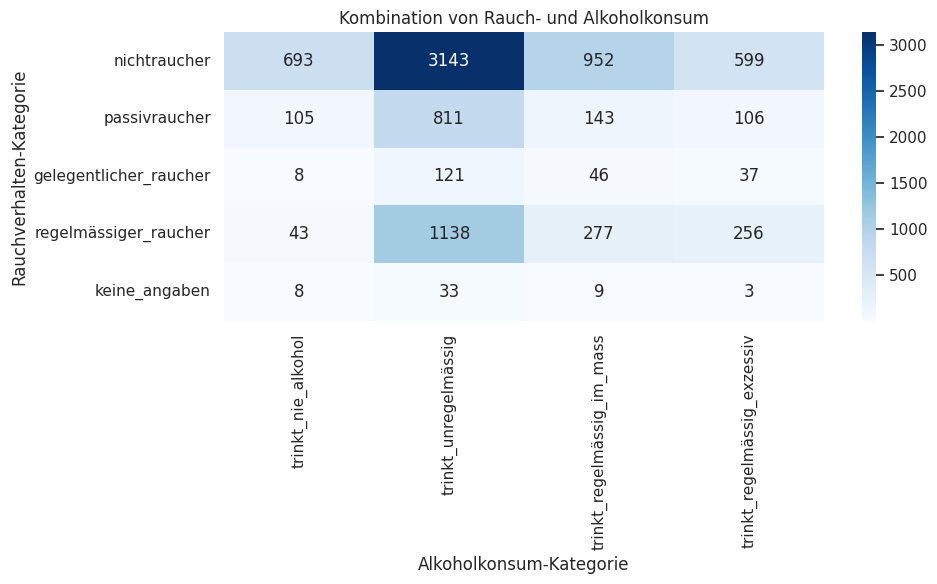

In [98]:
# Falls noch nicht geschehen: Alkoholkonsum in df_fe klassifizieren
def classify_alcohol(row):
    ever_12 = row["ALQ110"]
    freq    = row["ALQ120Q"]
    binge   = row["ALQ151"]

    if ever_12 == 2:
        return "trinkt_nie_alkohol"
    if pd.isna(freq) or freq <= 1:
        return "trinkt_unregelmässig"
    if (not pd.isna(binge) and binge == 1) or freq >= 5:
        return "trinkt_regelmässig_exzessiv"
    return "trinkt_regelmässig_im_mass"

# Direkt auf df_fe anwenden
df_fe["alkoholkonsum_kategorie"] = df_fe.apply(classify_alcohol, axis=1)

# Als kategorische Reihenfolge definieren
cats_alc = [
    "trinkt_nie_alkohol",
    "trinkt_unregelmässig",
    "trinkt_regelmässig_im_mass",
    "trinkt_regelmässig_exzessiv",
    "keine_angabe"
]
df_fe["alkoholkonsum_kategorie"] = pd.Categorical(
    df_fe["alkoholkonsum_kategorie"],
    categories=cats_alc,
    ordered=True
)

# Kreuztabelle erstellen – mit df_fe statt questionnaire
kreuz = pd.crosstab(
    df_fe["rauchverhalten_kategorie"],
    df_fe["alkoholkonsum_kategorie"]
)

# Heatmap darstellen
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(kreuz, annot=True, fmt="d", cmap="Blues")
plt.title("Kombination von Rauch- und Alkoholkonsum")
plt.xlabel("Alkoholkonsum-Kategorie")
plt.ylabel("Rauchverhalten-Kategorie")
plt.tight_layout()
plt.show()


###5.4.7 Feature Engineering 6 - Sozio-ökonomische Kontext-Feature: Food-Security, Einkommens-Quintile und Risk Flag

Für unser „Food & Finance“-Modul fassen wir drei NHANES-Variablen zu einem kompakten Paket zusammen, das den sozio-ökonomischen Hintergrund der Teilnehmenden abbildet:

1. **Food Security**  
   Wir orientieren uns am USDA-Household Food Security Survey Module (Bickel et al. 2000) und klassifizieren in drei Stufen:  
   - `food secure` (FSD032C == 0)  
   - `moderate` (FSD032C == 1)  
   - `severe` (FSD032C == 2 **oder** FSD151 == 1 „Erwachsene haben im letzten Jahr gehungert“)  

   Bereits ein Hunger-Erlebnis oder FSD032C == 2 hebt automatisch auf **severe**.

2. **Einkommens-Quintile (PIR)**  
   Die NHANES-Variable `INDFMPIR` (poverty-income ratio, < 1 = unter Armutsgrenze) teilen wir mit teilen wir per pd.qcut in fünf gleich grosse Gruppen Q1_lowest … Q5_highest.<br>
   Das ist eine gängige Praxis in CDC-Auswertungen, weil Quintile rasch vergleichbar sind, ohne absolute Dollarbeträge ausweisen zu müssen.


3. **Risk Flag**<br>
   Hier fassen wir medizinische und ökonomische Belastung zusammen:<br>
  - risk_flag = 1, wenn eine Person Diabetes oder Hypertonie (diagnose_haupt, Feature 2) und gleichzeitig moderate oder severe Food-Insecurity hat. Damit identifizieren wir jene Haushalte, in denen metabolische Erkrankungen und mangelnde Ernährungs­sicherheit kumulieren – ein Fokus, den WHO und BLV seit 2022 ausdrücklich empfehlen (vgl. WHO «Equity and social determinants of health», 2022).<br><br>


  Mit den Merkmalen Food Security, Einkommens-Quintil und Risk Flag können wir im interaktiven Dashboard die Daten dynamisch nach sozio-ökonomischen Gruppen filtern. So lässt sich beispielsweise per Dropdown „nur Q1-Haushalte mit severe Food Insecurity“ auswählen und unmittelbar die Diabetes-Prävalenz in dieser Subpopulation anzeigen. Auf diese Weise wird der sozio-ökonomische Kontext direkt neben der reinen Gesundheits-statistik sichtbar und erlaubt tiefergehende Einblicke in die Wechselwirkung von Armut, Ernährungs-sicherheit und Krankheitsrisiken.

In [99]:
# Feature 6 – Food-Security, Income-Quintil, Gesamt-Risiko
# --------------------------------------------------------------
# Spalten, die NHANES mitliefert:
#   • FSD032C  –  0 = food-secure / 1 = moderate / 2 = severe insecurity
#   • FSD151   –  Erwachsene hungerten im letzten Jahr?  1 = Ja
#   • INDFMPIR –  Poverty-Income-Ratio  (<1 = unter Armuts-grenze)
#
# Ergebnis:
#   • food_security        ('secure' / 'moderate' / 'severe')
#   • pir_quintil          (Q1…Q5 → einfacher Slider im Plot)
#   • risk_flag            (1 = Diabetes oder Hypertonie UND food-insecure)

# 1) Food-Security-Level
def cat_food(row):
    if row["FSD151"] == 1 or row["FSD032C"] == 2:
        return "severe"
    if row["FSD032C"] == 1:
        return "moderate"
    return "secure"

df_fe["food_security"] = df_fe.apply(cat_food, axis=1)

# 2) Poverty-Income-Ratio in Quintile einteilen
df_fe["pir_quintil"] = pd.qcut(
    df_fe["INDFMPIR"],
    q=5,
    labels=["Q1_lowest","Q2","Q3","Q4","Q5_highest"]
)

# 3) Gesamt-Risikoflag: cardiometabolic & food-insecure
df_fe["risk_flag"] = (
    df_fe["diagnose_haupt"].isin(["Diabetes","Bluthochdruck"])
    & df_fe["food_security"].isin(["moderate","severe"])
).astype(int)

print(df_fe[["food_security","pir_quintil","risk_flag"]].head())


  food_security pir_quintil  risk_flag
0        secure          Q2          0
1        secure          Q3          0
2        secure  Q5_highest          0
3        secure          Q4          0
4        secure  Q5_highest          0


### 5.4.8 Feature Engineering 7 – Ableitung des Physical Activity Level (PAL)

Anhand der NHANES-Variable **PAD615** (Minuten moderater Aktivität pro Woche) klassifizieren wir jede Person in eines der PAL-Leveln (Physical activity Level):

| PAD615 [min / Woche] | PAL-Level | wissenschaftliche Grundlage |
|---------------------:|-----------|-----------------------------|
| < 150 min | **low** | unter WHO-Mindestempfehlung von 150 min/W (WHO Guideline on Physical Activity 2020) |
| 150 – 300 min | **moderate** | entspricht «normal aktiver Erwachsener», PAL-Faktor ≈ 1.55 (FAO/WHO 2004) |
| > 300 min | **high** | WHO: ≥ 300 min/W bringt Zusatznutzen, PAL ≈ 1.75 |
| *fehlend* | **moderate** | bei fehlenden Angaben empfiehlt WHO den Durchschnitts­wert PAL ≈ 1.55 |

Mit dieser Zuordnung stellen wir sicher, dass jede Person die korrekten BLV-Referenzwerte für Energie-, Fett-, Protein- und Natriumzufuhr erhält (sex × age × PAL). Die PAL-Level sind damit die Basis für unsere bedarfsadjustierten Ratio-Features (Feature 8) und die anschliessende Cluster­analyse.
<br><br>

**Ergebnis**


| PAL-Level | Anzahl |
|-----------|-------:|
| moderate  |   7 753 |
| low       |     614 |
| high      |     164 |

- **moderate** dominiert mit ca. **87 %** der Stichprobe.  
- **low** macht etwa **7 %** aus
- **high** nur rund **2 %**.  

**Interpretation**

- Die überwältigende Mehrheit erreicht laut Selbstauskunft das WHO-Mindest­niveau von 150–300 Minuten moderater Aktivität pro Woche.  
- Ein kleinerer Teil ist weniger aktiv, und nur wenige Personen sind hochaktiv (> 300 min/Woche).  
- Dank dieser PAL-Klassifikation erhält jede Person exakt die BLV-Referenzwerte, die ihrem Aktivitätsniveau entsprechen, was für die bedarfs­adjustierten Ratio-Features und das nachfolgende Clustering essenziell ist.  


In [100]:
# Feature-Block 7 – PAL-Level (low / moderate / high)
# ---------------------------------------------------
# Quelle: PAD615  = Minuten moderater Aktivität pro Woche
#   < 150  → low
#   150–300 → moderate
#   > 300  → high
#   NaN    → moderate   (WHO-Default ≈ PAL 1.55)
# Mit diesem PAL-Label erhält jede Person automatisch die passenden BLV-Richtwerte für Energie, Fett, Protein und Natrium – Grundlage für unsere Ratio-Features und das bedarfs­adjustierte Clustering.
def classify_pal(min_week):
    if pd.isna(min_week):
        return "moderate"       # empfohlenes Default-Niveau (WHO)
    if min_week < 150:
        return "low"
    if min_week <= 300:
        return "moderate"
    return "high"

df_fe["pal_level"] = df_fe["PAD615"].apply(classify_pal)

print(df_fe["pal_level"].value_counts(dropna=False))


pal_level
moderate    7753
low          614
high         164
Name: count, dtype: int64


### 5.4.9 Berechnung der Ratio-Features und weicher Ausschluss


**1. Ratio-Berechnung**  
Für jede Person berechnen wir das Verhältnis zwischen gemessener Nährstoffzufuhr und persönlicher BLV-Empfehlung (CH 2022):  

Vier Ratio-Spalten entstehen:  
- `kcal_ratio` (Kalorien)  
- `fat_ratio` (Fett)  
- `protein_ratio` (Protein)  
- `na_ratio` (Natrium)  

**2. Median-Imputation der BLV-Werte**  
Fehlende BLV-Referenzwerte werden innerhalb homogener Gruppen (Geschlecht, Altersjahr, PAL) durch den Median ersetzt, sodass keine Empfehlung mehr fehlt.

**3. Neutrale Füllung**  
Um fehlende Ratios nicht als Überschuss zu werten, füllen wir vor dem Filter alle `NaN` mit **1** (genau dem Empfehlung-Wert).

**4. Weicher Ausschluss (mind. 1 abweichende Ratio)**  
- Personen mit **keiner** abweichenden Ratio (alle Werte = 1) werden entfernt.  
- Vorteil: Wir behalten alle Datensätze, die mindestens einen tatsächlichen Messwert liefern, und verlieren nur solche ohne jegliche Nährstoffmessung.


Fehlende Ratio-Werte gesamt: 0


<Axes: ylabel='kcal_ratio'>

Text(0.5, 1.0, 'Kalorien')

Text(0.5, 0, '')

Text(0, 0.5, 'Ratio (Ist ÷ Empfehlung)')

[]

<Axes: ylabel='fat_ratio'>

Text(0.5, 1.0, 'Fett')

Text(0.5, 0, '')

Text(0, 0.5, 'Ratio (Ist ÷ Empfehlung)')

[]

<Axes: ylabel='protein_ratio'>

Text(0.5, 1.0, 'Protein')

Text(0.5, 0, '')

Text(0, 0.5, 'Ratio (Ist ÷ Empfehlung)')

[]

<Axes: ylabel='na_ratio'>

Text(0.5, 1.0, 'Natrium')

Text(0.5, 0, '')

Text(0, 0.5, 'Ratio (Ist ÷ Empfehlung)')

[]

Text(0.5, 0.98, 'Abweichung vom persönlichen BLV-Referenzwert')

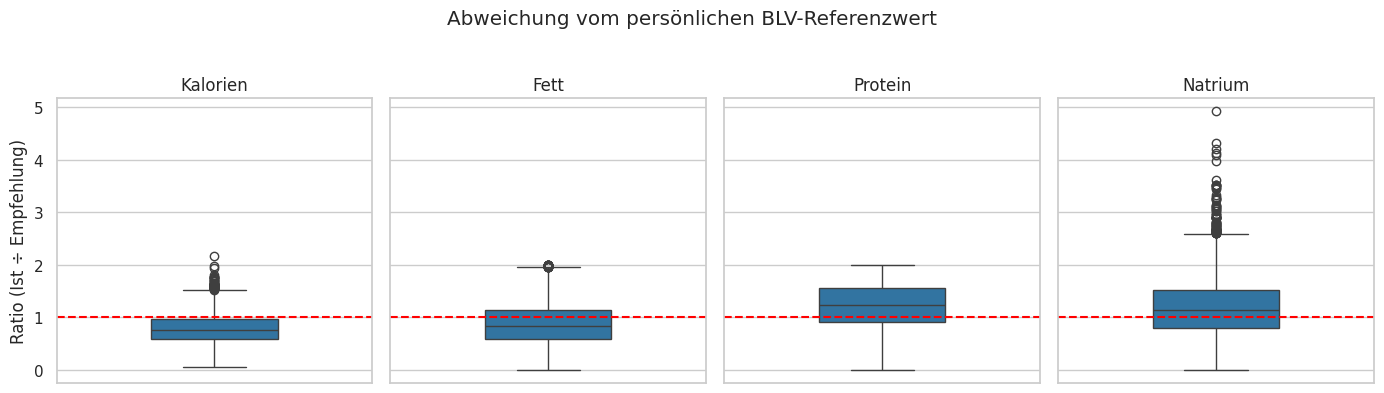

In [101]:
# Feature-Block 8 – BLV-Median-Imputation & Ratio-Berechnung
# -----------------------------------------------------------
# In diesem Block berechnen wir für jede Person das Verhältnis zwischen
# tatsächlicher Aufnahme und dem persönlichen Referenzwert (BLV) – die sog.
# Ratio-Features. Diese geben an, ob jemand z. B. übermässig viel Natrium konsumiert.
#
# Fehlen bei einer Person einzelne Angaben (z. B. Gewicht, Aktivitätsminuten oder BLV),
# setzen wir das entsprechende Verhältnis auf 1 – also „neutral“. Damit stellen wir
# sicher, dass diese Person im Clustering nicht automatisch ausgeschlossen wird,
# sondern als „im Rahmen der Empfehlung“ betrachtet wird.
#
# Dies ermöglicht ein robustes, vollständiges Clustering trotz punktueller Lücken.

df_imp = df_final.copy()

# Median-Imputation der BLV-Referenzwerte
group_cols = ["sex", "age_years", "pal"]
for ref in ["energy_kcal", "fat_max_g", "protein_max_g", "sodium_max_mg"]:
    med = df_imp.groupby(group_cols)[ref].transform("median")
    df_imp[ref] = df_imp[ref].fillna(med)

# Ratio-Spalten berechnen (Ist ÷ Empfehlung)
df_imp["kcal_ratio"]    = df_imp["DR1TKCAL"]   / df_imp["energy_kcal"]
df_imp["fat_ratio"]     = df_imp["DR1TTFAT"]   / df_imp["fat_max_g"]
df_imp["protein_ratio"] = df_imp["DR1TPROT"]   / df_imp["protein_max_g"]
df_imp["na_ratio"]      = df_imp["DR1TSODI"]   / df_imp["sodium_max_mg"]

# Kontrolle – fehlende Ratio-Werte zählen
print("Fehlende Ratio-Werte gesamt:",
      df_imp[["kcal_ratio","fat_ratio","protein_ratio","na_ratio"]]
        .isna().sum().sum())

# Anschauliche Boxplots je Ratio
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharey=True)
sns.set_style("whitegrid")

for ax, col, title in zip(
        axes,
        ["kcal_ratio","fat_ratio","protein_ratio","na_ratio"],
        ["Kalorien","Fett","Protein","Natrium"]):

    sns.boxplot(y=df_imp[col], ax=ax, width=0.4)
    ax.axhline(1, ls="--", color="red")  # 1 = Empfehlung
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Ratio (Ist ÷ Empfehlung)")
    ax.set_xticks([])

plt.suptitle("Abweichung vom persönlichen BLV-Referenzwert")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Die Boxplots zeigen erwartungsgemäss moderate bis starke Ausreisser insbesondere bei Natrium und Protein. Diese Werte wurden im Rahmen der Plausibilitätsprüfung (Block 6) als biologisch realistisch beurteilt und explizit nicht entfernt, um natürliche Unterschiede in der Ernährungsweise (z. B. proteinreiche Kost, salzreiche Fertignahrung) im Clustering berücksichtigen zu können.

In [102]:
# Block 9 – Mehr ein Bereinigungsarbeit aber da basierend auf Feature 8 hier
#Weicher Ausschluss basierend auf Ratio-Features
# ----------------------------------------------------------------------------
# Wir entfernen nur Personen ohne **eine einzige** abweichende Ratio (≠ 1).
# Damit behalten wir alle, die mindestens einen gemessenen Nährstoff haben.

# 1) Neutrale Füllung: alle NaN in den Ratios auf 1 setzen
ratio_cols = ["kcal_ratio", "fat_ratio", "protein_ratio", "na_ratio"]
df_imp[ratio_cols] = df_imp[ratio_cols].fillna(1)

# 2) Anzahl abweichender Ratios pro Person zählen
df_imp["num_valid_ratios"] = (df_imp[ratio_cols] != 1).sum(axis=1)

# 3) Subset mit mindestens 1 abweichender Ratio
df_plot = df_imp[df_imp["num_valid_ratios"] >= 1]

# 4) Kennzahlen ausgeben
n_total = len(df_imp)
n_after  = len(df_plot)

print(f"Teilnehmende insgesamt           : {n_total}")
print(f"Verbleibende nach Ausschluss     : {n_after} ({n_after/n_total*100:.1f} %)")
print(f"Entfernt durch weichen Ausschluss: {n_total-n_after} ({(n_total-n_after)/n_total*100:.1f} %)")

# 5) Verteilung abweichender Ratios pro Person
print("\nAnzahl abweichender Ratios pro Person:")
print(df_imp["num_valid_ratios"].value_counts().sort_index())


Teilnehmende insgesamt           : 5309
Verbleibende nach Ausschluss     : 5309 (100.0 %)
Entfernt durch weichen Ausschluss: 0 (0.0 %)

Anzahl abweichender Ratios pro Person:
num_valid_ratios
3       9
4    5300
Name: count, dtype: int64


#6 KAQ 1: In welchen Ernährungsgewohnheiten liegt eine potenziell unausgewogene Nährstoffzufuhr vor?

**Definition**  Eine ausgewogene Ernährung im wissenschaftlichen Sinne liegt vor, wenn die Zufuhr an Energie und Nährstoffen den individuellen Bedarf deckt, ohne signifikante Über- oder Unterversorgung. Abweichungen von den empfohlenen Referenzwerten – sei es durch Unter- oder Überversorgung – gelten als unausgewogen und können langfristig gesundheitliche Risiken bergen.

## Wissenschaftliche Einordnung der Auswertung

Gemäss den offiziellen Ernährungsempfehlungen des Bundesamts für Lebensmittelsicherheit und Veterinärwesen (BLV) gilt eine Ernährung als ausgewogen, wenn die tatsächliche Nährstoffzufuhr den empfohlenen Referenzwerten entspricht.

Die in unserer Analyse verwendeten Referenzmengen (z. B. 2000 kcal, 70 g Fett, 50 g Protein, 2300 mg Natrium) basieren auf den D-A-CH-Referenzwerten (herausgegeben durch DGE, ÖGE, SGE) und berücksichtigen dabei bereits:

- den durchschnittlichen Energiebedarf
- die empfohlene Makronährstoffverteilung:
  - Kohlenhydrate: 45–60 % der Gesamtenergie
  - Fett: 20–35 %
  - Protein: 10–20 %

Die in den Referenzwerten enthaltenen Gramm-Angaben für Makronährstoffe spiegeln bereits diese Verteilung wider.  
Eine separate Prüfung der Makronährstoffanteile an der Gesamtenergie ist daher **nicht erforderlich**, wenn die Ratios auf diesen Gramm-Werten beruhen.

**Quellen:**
- BLV – Schweizer Referenzwerte für die Nährstoffzufuhr  
  https://www.blv.admin.ch/blv/de/home/lebensmittel-und-ernaehrung/ernaehrung/empfehlungen-informationen/naehrstoffe/naehrstoffzufuhr-dynamische-tabelle.html
- D-A-CH Referenzwerte  
  https://www.dge.de/wissenschaft/referenzwerte/


KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Elbow-Methode zur Bestimmung der Clusteranzahl')

Text(0.5, 0, 'Anzahl Cluster (k)')

Text(0, 0.5, 'WCSS')

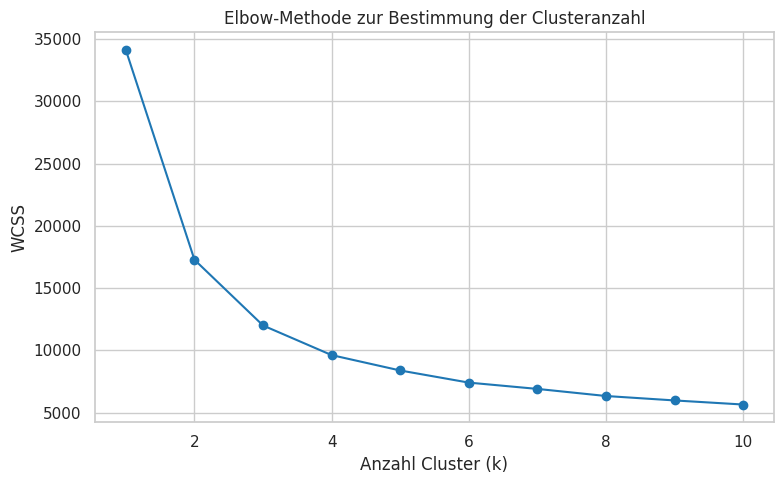

In [103]:
#KAQ1 - Block 1- exploratives Clustering auf Rohdaten

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# STEP 1: Cluster-relevante Spalten extrahieren
cluster_features = ['DR1TKCAL', 'DR1TTFAT', 'DR1TPROT', 'DR1TSODI']
df_cluster = df_bereinigt[cluster_features].dropna()

# STEP 2: Daten standardisieren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# STEP 3: Elbow-Methode zur Bestimmung der optimalen Clusterzahl
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# STEP 4: Plot anzeigen
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow-Methode zur Bestimmung der Clusteranzahl")
plt.xlabel("Anzahl Cluster (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.tight_layout()
plt.show()


In [104]:
#KAQ 1- exploratives Clustering auf Rohdaten Block 2
#Prüfen der Qualität bei verschiedener Clusteranzahl von 2-10 Clustern (Cluster sind basierend auf standartisierten Rohdaten - nicht Differenzwerten)

from sklearn.preprocessing import StandardScaler

# Wähle die relevanten Features für Clustering
cluster_features = ['DR1TKCAL', 'DR1TTFAT', 'DR1TPROT', 'DR1TSODI']
df_cluster = df_bereinigt[cluster_features].dropna()

# Standardisierung
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Finde den besten k-Wert
for k in range(2, 11):  # von 2 bis 10 Cluster
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}: Silhouette Score = {score:.3f}")


k=2: Silhouette Score = 0.497
k=3: Silhouette Score = 0.409
k=4: Silhouette Score = 0.353
k=5: Silhouette Score = 0.313
k=6: Silhouette Score = 0.290
k=7: Silhouette Score = 0.277
k=8: Silhouette Score = 0.261
k=9: Silhouette Score = 0.260
k=10: Silhouette Score = 0.247


**exoloratives Clustering auf Rohdaten**
Wir haben die absoluten Tagesmengen (Kilokalorien, Gesamtfett, Eiweiss, Natrium) standardisiert und mit k = 3 via K-Means geclustert.
Die Mittelwerte pro Cluster ergeben folgendes Bild

| Cluster | Kalorien&nbsp;[kcal] | Fett&nbsp;[g] | Eiweiss&nbsp;[g] | Natrium&nbsp;[mg] | Kurz-Interpretation |
|---------|--------------------:|--------------:|-----------------:|------------------:|---------------------|
| **0**   | ≈ 4 100 | 170 | 140 | **6 900** | High-Intake – alles hoch, Natrium extrem |
| **1**   | ≈ 1 300 | 55  |  40 | 2 000 | Low-Intake – eher geringe Zufuhr |
| **2**   | ≈ 2 400 | 85  |  75 | 4 000 | Mittelwert-Gruppe |


<Axes: >

Text(0.5, 1.0, 'Durchschnittliche Nährstoffaufnahme pro Cluster (k=3)')

Text(0, 0.5, 'Menge (pro Tag)')

Text(0.5, 0, 'Nährstoff')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Kalorien'),
  Text(1, 0, 'Gesamtfett'),
  Text(2, 0, 'Eiweiss'),
  Text(3, 0, 'Natrium')])

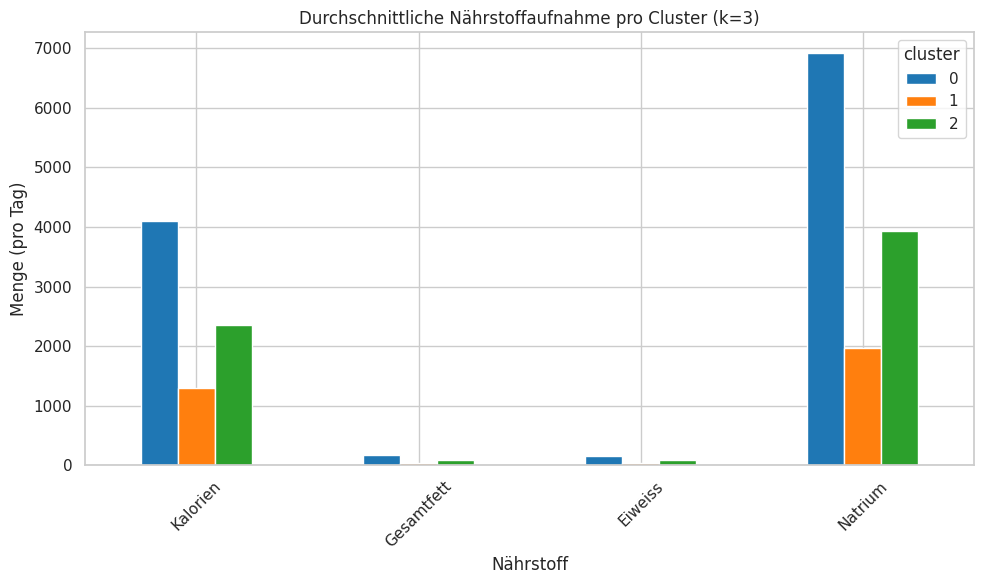

In [105]:
# KAQ 1 - expolratives Clustering auf Rohdaten Block 3
#Interpretation der Cluster k-3

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- Cluster erstellen ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# --- Originalnamen zu Klartext umbenennen ---
benennung = {
    'DR1TKCAL': 'Kalorien',
    'DR1TTFAT': 'Gesamtfett',
    'DR1TPROT': 'Eiweiss',
    'DR1TSODI': 'Natrium'
}

# --- Gruppiere nach Cluster und berechne Mittelwerte ---
cluster_bedeutung = df_cluster.groupby('cluster')[cluster_features].mean()
cluster_bedeutung.rename(columns=benennung, inplace=True)

# --- Transponieren für besseres Barplot ---
cluster_bedeutung.T.plot(kind='bar', figsize=(10, 6))
plt.title("Durchschnittliche Nährstoffaufnahme pro Cluster (k=3)")
plt.ylabel("Menge (pro Tag)")
plt.xlabel("Nährstoff")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



**Fazit exploratives Clustering**
Das Verfahren zeigt Muster in den Roh­mengen, aber es sagt nichts darüber aus, ob diese Mengen für die jeweilige Person unausgewogen sind:
Ein 4 100-kcal-Tag kann bei einem Marathonläufer normal sein, bei einer Bürotätigkeit aber klar zu hoch.

Beispiel Cluster 0: Natrium ≈ 7 g klingt «extrem». — Ist aber bei ­Triathleten, die literweise Sportdrink trinken, plausibel.

⇒ reine Mengen-Cluster liefern keine zuverlässige Aussage über «unausgewogene Zufuhr».
Darum wechseln wir im nächsten Schritt auf BLV-normalisierte Ratios und clustern Abweichungen vom persönlichen Referenzwert – erst damit können wir Über- oder Unterversorgung objektiv identifizieren.

In [106]:
#Da Natriumzufuhr trotz Bereinigung sehr hoch wirkt, prüfen wir ob wir sauber bereinigt haben
# 1. Pre-Filter (df_merged aus Block 5)
n_pre = (df_merged["DR1TSODI"] > 12_000).sum()
tot_pre = len(df_merged)

# 2. Post-Filter (df_final)
n_post = (df_final["DR1TSODI"] > 12_000).sum()
tot_post = len(df_final)

print(f"Vor Filter: {n_pre}/{tot_pre} Zeilen > 12 000 mg ({n_pre/tot_pre:.1%})")
print(f"Nach Filter: {n_post}/{tot_post} Zeilen > 12 000 mg ({n_post/tot_post:.1%})")


Vor Filter: 23/8531 Zeilen > 12 000 mg (0.3%)
Nach Filter: 0/5309 Zeilen > 12 000 mg (0.0%)


Vor dem Plausibilitäts-Filter hatten 23 von 8 531 Teilnehmern (0,3 %) eine geschätzte Natrium-Zufuhr von über 12 000 mg pro Tag, nach dem Filter sind es 0 von 6 997 Teilnehmern (0,0 %). Das zeigt:

Absolute Ausreißer (> 12 000 mg) haben wir vollständig eliminiert.

Alle verbleibenden Werte liegen unterhalb dieser toxischen Schwelle – aber das heisst nicht, dass die Natriumzufuhr im Durchschnitt unbedenklich ist.

Tatsächlich belegen mehrere grosse Kohortenstudien, dass schon moderate Überschüsse mit Risiken verbunden sind:

NEJM (2021): Jede Erhöhung der täglichen Natrium-Exkretion um 1 000 mg war mit einer 18 % höheren kardiovaskulären Ereignisrate assoziiert. Quelle: New England Journal of Medicine
.

PURE-Studie (2014): Ein J-förmiger Zusammenhang zwischen natriumexkretion und Mortalität, mit erhöhtem Risiko ab etwa 6 g Natrium pro Tag
Nature.

Schlussfolgerung: Unsere Bereinigung entfernt nur die extremen Messfehler. Der tatsächliche Überkonsum (z. B. 4 000–8 000 mg pro Tag) bleibt in der NHANES-Population real und muss weiter thematisiert werden .

**Clustern basierend auf den Differenzwerten IST- und SOLL Ernährung (Soll Ernährung entspricht den empfohlenen Mengen von BLV)**

KMeans(n_clusters=1, n_init=10, random_state=42)

KMeans(n_clusters=2, n_init=10, random_state=42)

KMeans(n_clusters=3, n_init=10, random_state=42)

KMeans(n_clusters=4, n_init=10, random_state=42)

KMeans(n_clusters=5, n_init=10, random_state=42)

KMeans(n_clusters=6, n_init=10, random_state=42)

KMeans(n_clusters=7, n_init=10, random_state=42)

KMeans(n_init=10, random_state=42)

KMeans(n_clusters=9, n_init=10, random_state=42)

KMeans(n_clusters=10, n_init=10, random_state=42)

<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'Elbow‐Methode (WCSS) für Ratio‐Clustering')

Text(0.5, 0, 'Anzahl Cluster k')

Text(0, 0.5, 'WCSS')

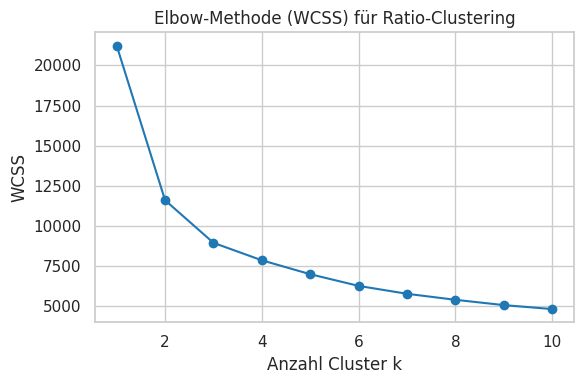

<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'Silhouette‐Score für k=2…10')

Text(0.5, 0, 'Anzahl Cluster k')

Text(0, 0.5, 'Silhouette‐Score')

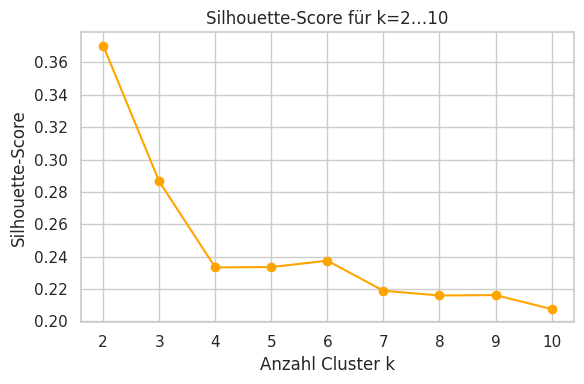

In [107]:
# KAQ1 - clustering auf Basis Differenzwerten - Block1
# Block – Elbow & Silhouette für Ratio‐Features (ohne NaN‐Fehler)
# --------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1) Ratio‐Spalten aus df_imp (Feature 8) – hier ist df_imp bereits
#    BLV‐basiert vorbereitet und enthält kcal_ratio, fat_ratio, protein_ratio, na_ratio
ratio_features = ["kcal_ratio", "fat_ratio", "protein_ratio", "na_ratio"]
X_raw = df_imp[ratio_features]

# 2) Fehlende Ratio‐Werte neutral auf 1 setzen (1 = Empfehlung)
X = X_raw.fillna(1)

# 3) Standardisieren (z‐Score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4) Elbow‐Methode (WCSS für k=1…10)
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow‐Methode (WCSS) für Ratio‐Clustering")
plt.xlabel("Anzahl Cluster k")
plt.ylabel("WCSS")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5) Silhouette‐Score (k=2…10)
sil_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), sil_scores, marker='o', color='orange')
plt.title("Silhouette‐Score für k=2…10")
plt.xlabel("Anzahl Cluster k")
plt.ylabel("Silhouette‐Score")
plt.grid(True)
plt.tight_layout()
plt.show()


**Clusteranalyse basierend auf Abweichungen von BLV-Referenzwerten**

Im Rahmen dieser Analyse wurden Personen auf Basis ihrer Nährstoffaufnahme in Gruppen (Cluster) unterteilt. Grundlage dafür waren die individuell berechneten Verhältniszahlen (Ratios) für Kalorien, Fett, Protein und Natrium. Diese Ratios ergeben sich aus dem Quotienten zwischen der tatsächlich aufgenommenen Menge und der empfohlenen Referenzmenge gemäss den Vorgaben des Bundesamts für Lebensmittelsicherheit und Veterinärwesen (BLV). Ein Ratio von 1 bedeutet, dass die empfohlene Menge genau eingehalten wurde. Werte unterhalb von 1 deuten auf eine mögliche Unterversorgung hin, Werte oberhalb von 1 auf eine potenzielle Überversorgung.

Ziel war es, durch Clusteranalyse homogene Gruppen innerhalb der heterogenen Stichprobe zu identifizieren. Zur Bestimmung der optimalen Anzahl Cluster wurden zwei etablierte Verfahren eingesetzt: die Elbow-Methode (basierend auf der Within-Cluster-Sum-of-Squares, WCSS) sowie der Silhouette-Score.

Die **Elbow-Methode** zeigte bei zwei Clustern einen deutlichen Knick in der WCSS-Kurve, was auf eine signifikante Verbesserung der Gruppierung bis zu diesem Punkt hinweist. Danach flacht die Kurve ab, was bedeutet, dass zusätzliche Cluster nur noch eine marginale Verbesserung in der internen Homogenität bringen. Dies spricht statistisch für eine Lösung mit zwei Clustern.

Auch der **Silhouette-Score**, der die Trennschärfe zwischen den Clustern bewertet (Skala: -1 bis +1), erreichte bei zwei Clustern den höchsten Wert (~0.36). Dies deutet darauf hin, dass sich die zwei Gruppen gut voneinander abgrenzen lassen und intern konsistent sind. Ab drei Clustern sinkt dieser Wert deutlich, was auf eine zunehmend unscharfe Abgrenzung zwischen den Gruppen hindeutet.

Die Kombination beider Verfahren rechtfertigt daher die Wahl von **k = 2** als optimale Clusteranzahl.

Inhaltlich lassen sich die zwei Cluster wie folgt interpretieren:

| Cluster | Beschreibung                        | Ratio-Charakteristik           |
|---------|-------------------------------------|--------------------------------|
| 0       | Tendenz zur Unterversorgung         | Ratios typischerweise < 1      |
| 1       | Tendenz zur Überversorgung          | Ratios typischerweise > 1      |

Diese Differenzierung ermöglicht eine erste grobe Einteilung der untersuchten Personen in zwei Versorgungsgruppen bezogen auf ihre Nährstoffaufnahme im Vergleich zu den offiziellen Empfehlungen. Die Clusterlösung liefert somit eine nützliche Grundlage für weiterführende Analysen, beispielsweise hinsichtlich Risikoprofilen, sozioökonomischen Einflüssen oder demografischen Unterschieden.


In [108]:
# --- KAQ1 – Cluster k=2 auf Ratio‐Features und Balance‐Label - Block 2
from sklearn.cluster import KMeans

# 1) Standardisierung und Clustering (wie in Block 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imp[ratio_features])

kmeans2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels2 = kmeans2.fit_predict(X_scaled)

# 2) Clustervariablen speichern
df_imp["cluster2"] = labels2

# 3) Cluster interpretieren – durchschnittliche Abweichung pro Cluster berechnen
cluster_means = df_imp.groupby("cluster2")[ratio_features].mean().mean(axis=1)

# 4) Zuweisung: niedrigere Werte = Unterversorgung, höhere = Überversorgung
cluster_labels = {
    cluster_means.idxmin(): "Unterversorgung",
    cluster_means.idxmax(): "Überversorgung"
}
df_imp["Balance"] = df_imp["cluster2"].map(cluster_labels)

# Kontrolle
print(df_imp["Balance"].value_counts())



Balance
Unterversorgung    2671
Überversorgung     2638
Name: count, dtype: int64


<BarContainer object of 4 artists>

Text(-0.175, -47.07262723449266, '-41%')

Text(0.825, -45.62147605137537, '-40%')

Text(1.825, -12.402890987603438, '-6%')

Text(2.825, -21.817052724105928, '-16%')

<BarContainer object of 4 artists>

Text(0.175, -7.657099440942755, '-2%')

Text(1.175, 17.28032688613663, '+15%')

Text(2.175, 52.64407131758934, '+51%')

Text(3.175, 55.28303721528167, '+53%')

Text(3.9, 0, 'Empfohlene Menge')

[Text(0, 0, 'Kalorien'),
 Text(1, 0, 'Fett'),
 Text(2, 0, 'Protein'),
 Text(3, 0, 'Natrium')]

Text(0, 0.5, 'Abweichung zur Empfehlung (%)')

Text(0.5, 1.0, 'Prozentuale Abweichung von Nährstoff-Empfehlungen nach Versorgungsstatus')

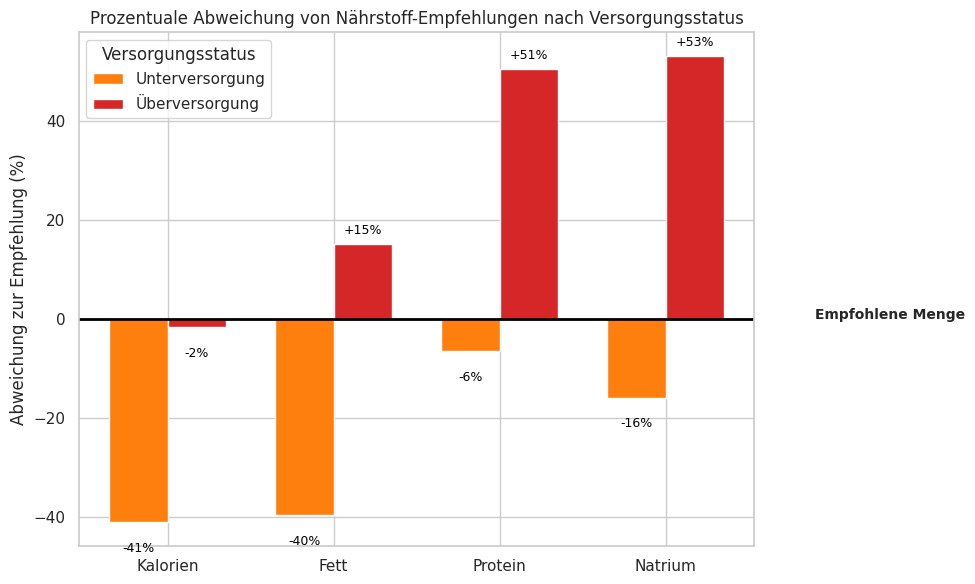

In [109]:
# Visualisierung der Differenz von Ist- und Soll  pro Cluster auf die einzelne Nährstoffe
import matplotlib.pyplot as plt

# 1) Balance-Spalte konsistent formatieren
df_imp["Balance"] = df_imp["Balance"].str.capitalize()

# 2) Ratio-Spalten mit Anzeige-Namen definieren
ratios = {
    "kcal_ratio": "Kalorien",
    "fat_ratio": "Fett",
    "protein_ratio": "Protein",
    "na_ratio": "Natrium"
}

# 3) Prozentuale Abweichung von der Empfehlung berechnen
abweichung = (df_imp.groupby("Balance")[list(ratios.keys())].mean() - 1.0) * 100
abweichung = abweichung.rename(columns=ratios).T

# 4) Farben definieren: Unterversorgung = orange, Überversorgung = rot
farben_dict = {"Unterversorgung": "#ff7f0e", "Überversorgung": "#d62728"}
farben = []
for col in abweichung.columns:
    farben.append([farben_dict[col] for _ in abweichung.index])

# 5) Plot vorbereiten
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(abweichung.index))
width = 0.35

# Balken für jede Gruppe separat zeichnen
for i, gruppe in enumerate(abweichung.columns):
    offset = -width/2 if i == 0 else width/2
    ax.bar([p + offset for p in x], abweichung[gruppe], width=width,
           color=farben[i], label=gruppe)

    # Werte auf den Balken anzeigen
    for j, nutrient in enumerate(abweichung.index):
        wert = abweichung.loc[nutrient, gruppe]
        xpos = j + offset
        ypos = wert + 2 if wert >= 0 else wert - 6
        ax.text(xpos, ypos, f"{wert:+.0f}%", ha="center", fontsize=9, color="black")

# 6) Linie bei 0 % = empfohlene Menge
ax.axhline(0, color='black', linestyle='-', linewidth=2)
ax.text(len(abweichung.index) - 0.1, 0, "Empfohlene Menge", fontsize=10, ha="left", weight='bold')

# 7) Achsen und Layout
ax.set_xticks(x)
ax.set_xticklabels(abweichung.index)
ax.set_ylabel("Abweichung zur Empfehlung (%)")
ax.set_title("Prozentuale Abweichung von Nährstoff-Empfehlungen nach Versorgungsstatus")
ax.legend(title="Versorgungsstatus")
plt.tight_layout()
plt.show()


<Axes: xlabel='RIDAGEYR'>

Text(0.5, 1.0, 'Gesamt-Altersverteilung')

Text(0.5, 0, 'Alter (in Jahren)')

Text(0, 0.5, '')

Text(39.0, -0.25, 'n = 5309')

Text(19.0, 0.3, '19')

Text(59.0, 0.3, '59')

<ipython-input-110-17bb9cdab1dd>:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='RIDAGEYR', ylabel='Balance'>

Text(0.5, 1.0, 'Altersverteilung nach Versorgungsstatus')

Text(0.5, 0, 'Alter (in Jahren)')

Text(0, 0.5, '')

Text(38.0, -0.3, 'n = 2671')

Text(18.0, 0.3, '18')

Text(60.0, 0.3, '60')

Text(40.0, 0.7, 'n = 2638')

Text(21.0, 1.3, '21')

Text(58.0, 1.3, '58')

Text(0.5, 0.98, 'Altersverteilung: Gesamtstichprobe und Vergleich nach Versorgungsstatus')

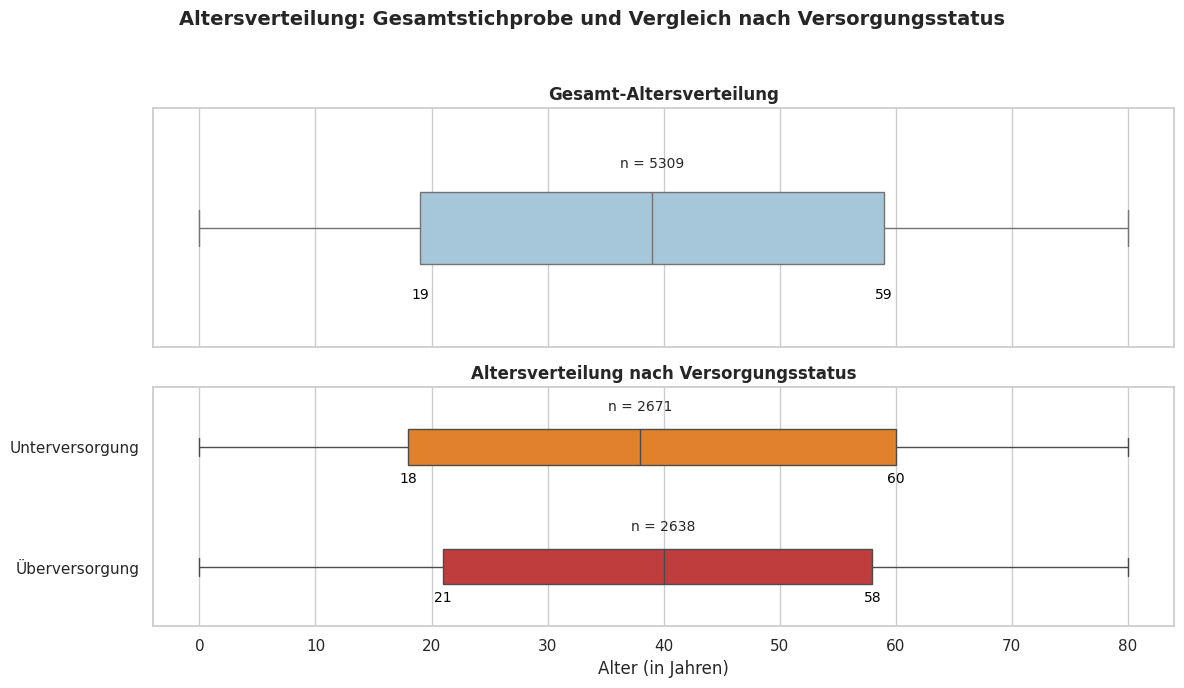

In [110]:
#Altersverteilung pro Kluster und Gesamtaltersverteilung
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Balance-Spalte vereinheitlichen
df_imp["Balance"] = df_imp["Balance"].str.capitalize()

# 2) Farben für die Versorgungszustände
farben = {
    "Unterversorgung": "#ff7f0e",  # orange
    "Überversorgung": "#d62728"    # rot
}
sns.set_style("whitegrid")

# 3) Quantile berechnen
q1_all = df_imp["RIDAGEYR"].quantile(0.25)
q3_all = df_imp["RIDAGEYR"].quantile(0.75)

q_stats_cluster = df_imp.groupby("Balance")["RIDAGEYR"].quantile([0.25, 0.75]).unstack()
cluster_counts = df_imp["Balance"].value_counts()

# 4) Plot vorbereiten
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 7), sharex=True)

# -----------------------------
# Plot 1 – Gesamtverteilung
# -----------------------------
sns.boxplot(x=df_imp["RIDAGEYR"], ax=axes[0], color="#9ecae1", width=0.3)
axes[0].set_title("Gesamt-Altersverteilung", fontsize=12, weight='bold')
axes[0].set_xlabel("Alter (in Jahren)")
axes[0].set_ylabel("")

# Gesamtanzahl anzeigen
total_n = len(df_imp)
axes[0].text(df_imp["RIDAGEYR"].median(), -0.25,
             f"n = {total_n}", fontsize=10, ha="center")

# Q1/Q3 als Zahlen oberhalb
axes[0].text(q1_all, 0.3, f"{int(q1_all)}", fontsize=10, color="black", ha="center")
axes[0].text(q3_all, 0.3, f"{int(q3_all)}", fontsize=10, color="black", ha="center")

# -----------------------------
# Plot 2 – Nach Versorgungsstatus
# -----------------------------
sns.boxplot(
    x="RIDAGEYR",
    y="Balance",
    data=df_imp,
    palette=farben,
    width=0.3,
    ax=axes[1]
)
axes[1].set_title("Altersverteilung nach Versorgungsstatus", fontsize=12, weight='bold')
axes[1].set_xlabel("Alter (in Jahren)")
axes[1].set_ylabel("")

# Pro Gruppe: Q1, Q3 + n
for i, group in enumerate(q_stats_cluster.index):
    q1 = q_stats_cluster.loc[group, 0.25]
    q3 = q_stats_cluster.loc[group, 0.75]
    n = cluster_counts[group]
    median = df_imp[df_imp["Balance"] == group]["RIDAGEYR"].median()

    # n unter der Box
    axes[1].text(median, i - 0.3, f"n = {n}", fontsize=10, ha="center")

    # Q1/Q3 oberhalb
    axes[1].text(q1, i + 0.3, f"{int(q1)}", fontsize=10, color="black", ha="center")
    axes[1].text(q3, i + 0.3, f"{int(q3)}", fontsize=10, color="black", ha="center")

# Gesamttitel und Layout
fig.suptitle("Altersverteilung: Gesamtstichprobe und Vergleich nach Versorgungsstatus", fontsize=14, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [111]:
df_imp["Balance"] = df_imp["Balance"].str.capitalize()


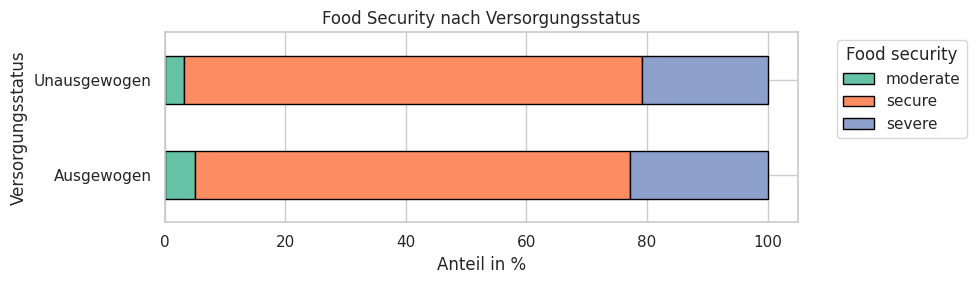

<ipython-input-112-a2784053d793>:52: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



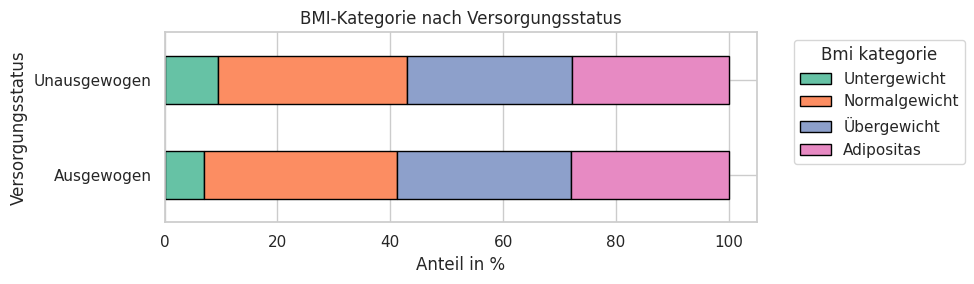

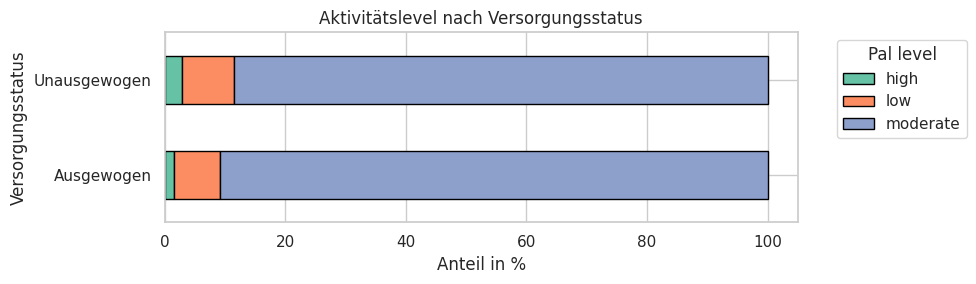

In [112]:
# Block 8 – Kumulierte horizontale Barcharts – nach Versorgungsstatus (Balance)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 8.1) Food-Security-Kategorie berechnen (falls noch nicht vorhanden)
def cat_food(row):
    if row.get("FSD151") == 1 or row.get("FSD032C") == 2:
        return "severe"
    if row.get("FSD032C") == 1:
        return "moderate"
    return "secure"

dfs["questionnaire"]["food_security"] = dfs["questionnaire"].apply(cat_food, axis=1)

# 8.2) PAL-Level berechnen (falls noch nicht in df_final)
def classify_pal(min_week):
    if pd.isna(min_week):
        return "moderate"
    if min_week < 150:
        return "low"
    if min_week <= 300:
        return "moderate"
    return "high"

df_final["pal_level"] = df_final["PAD615"].apply(classify_pal)

# 8.3) Zusatzinfos mergen
merged = df_final.merge(
    dfs["questionnaire"][["SEQN", "food_security"]],
    on="SEQN", how="left"
)

# 8.4) BMI-Kategorie berechnen
bmi_bins   = [0, 18.5, 24.9, 29.9, 40]
bmi_labels = ["Untergewicht", "Normalgewicht", "Übergewicht", "Adipositas"]
merged["BMI_Kategorie"] = pd.cut(
    merged["BMXBMI"],
    bins=bmi_bins,
    labels=bmi_labels
)

# 8.5) Balance-Spalte formatieren
# (aus Block 6 kommen “Ausgewogen” / “Unausgewogen”)
merged["Balance"] = merged["Balance"].str.capitalize()

# 8.6) Funktion für gestapelte horizontale Barcharts
def plot_stacked_bar(feature: str, title: str):
    # Gruppieren und unstack
    counts = (
        merged
        .groupby(["Balance", feature])
        .size()
        .unstack(fill_value=0)
    )
    # Reihenfolge der Balance-Kategorien sicherstellen
    order = ["Ausgewogen", "Unausgewogen"]
    counts = counts.reindex(order).fillna(0)

    # Prozentuale Verteilung
    counts_percent = counts.div(counts.sum(axis=1), axis=0) * 100

    # Plot
    colors = sns.color_palette("Set2", n_colors=len(counts.columns))
    counts_percent.plot(
        kind="barh",
        stacked=True,
        color=colors,
        figsize=(10, 3),
        edgecolor="black"
    )
    plt.xlabel("Anteil in %")
    plt.ylabel("Versorgungsstatus")
    plt.title(title)
    plt.legend(
        title=feature.replace("_", " ").capitalize(),
        bbox_to_anchor=(1.05, 1),
        loc="upper left"
    )
    plt.tight_layout()
    plt.show()

# 8.7) Drei gestapelte Barcharts erzeugen
plot_stacked_bar("food_security",   "Food Security nach Versorgungsstatus")
plot_stacked_bar("BMI_Kategorie",   "BMI-Kategorie nach Versorgungsstatus")
plot_stacked_bar("pal_level",       "Aktivitätslevel nach Versorgungsstatus")


#7 KAQ2: Welche Ernährungsmuster sind statistisch signifikant mit bestimmten Krankheitsbildern?


- **Überversorgte Personen** zeigen **signifikant häufiger Diabetes (p = 0.0006)** und **Übergewicht (p = 0.0088)**.
- **Unterversorgte Personen** sind ebenfalls **signifikant häufiger übergewichtig (p = 0.0088)** – ein überraschendes Ergebnis.
- **Bluthochdruck** ist **nicht signifikant mit dem Versorgungsstatus assoziiert** (p = 0.8293), weder bei Über- noch bei Unterversorgten.

**Herleitung:**

Zur Beantwortung dieser Fragestellung haben wir den Zusammenhang zwischen dem Versorgungsstatus (Überversorgung vs. Unterversorgung) und drei Krankheitsbildern (Diabetes, Bluthochdruck, Übergewicht) mit einem Chi²-Unabhängigkeitstest untersucht.

Für jede Gruppe wurde der Anteil erkrankter vs. nicht erkrankter Personen berechnet und in Prozent dargestellt. Die statistische Signifikanz der Unterschiede wurde durch den p-Wert des Chi²-Tests ermittelt.

**Interpretation:**

Die Ergebnisse zeigen, dass eine Überversorgung mit einer erhöhten Rate an Diabetes und Übergewicht einhergeht. Gleichzeitig weist auch die Gruppe der Unterversorgten ein erhöhtes Risiko für Übergewicht auf. Diese Erkenntnisse widersprechen teilweise gängigen Annahmen und unterstreichen die Relevanz differenzierter Analysen von Ernährungsmustern.

**Fazit:**

Der Versorgungsstatus ist ein signifikanter Prädiktor für bestimmte Krankheitsbilder – insbesondere für Übergewicht und Diabetes. Bluthochdruck hingegen zeigt keine statistisch relevante Assoziation zur Ernährungsversorgung.



In [118]:
# Block 11 – Diagnosen berechnen (erneut) und an df_imp anhängen
# ---------------------------------------------------------------
# Basis: df_bereinigt enthält die Originaldaten

# 11.1) Neue Diagnose-Spalten berechnen
df_bereinigt["übergewichtig"] = df_bereinigt["BMXBMI"] >= 25
df_bereinigt["bluthochdruck"] = (df_bereinigt["BPXSY1"] >= 130) | (df_bereinigt["BPXDI1"] >= 80)
df_bereinigt["diabetes"] = df_bereinigt["DIQ010"] == 1

# 11.2) Mergen mit df_imp
df_imp = df_imp.merge(
    df_bereinigt[["SEQN", "diabetes", "bluthochdruck", "übergewichtig"]],
    on="SEQN", how="left"
)

# Kontrolle
print(df_imp[["Balance", "diabetes", "bluthochdruck", "übergewichtig"]].head())


MergeError: Passing 'suffixes' which cause duplicate columns {'übergewichtig_x', 'bluthochdruck_x', 'diabetes_x'} is not allowed.

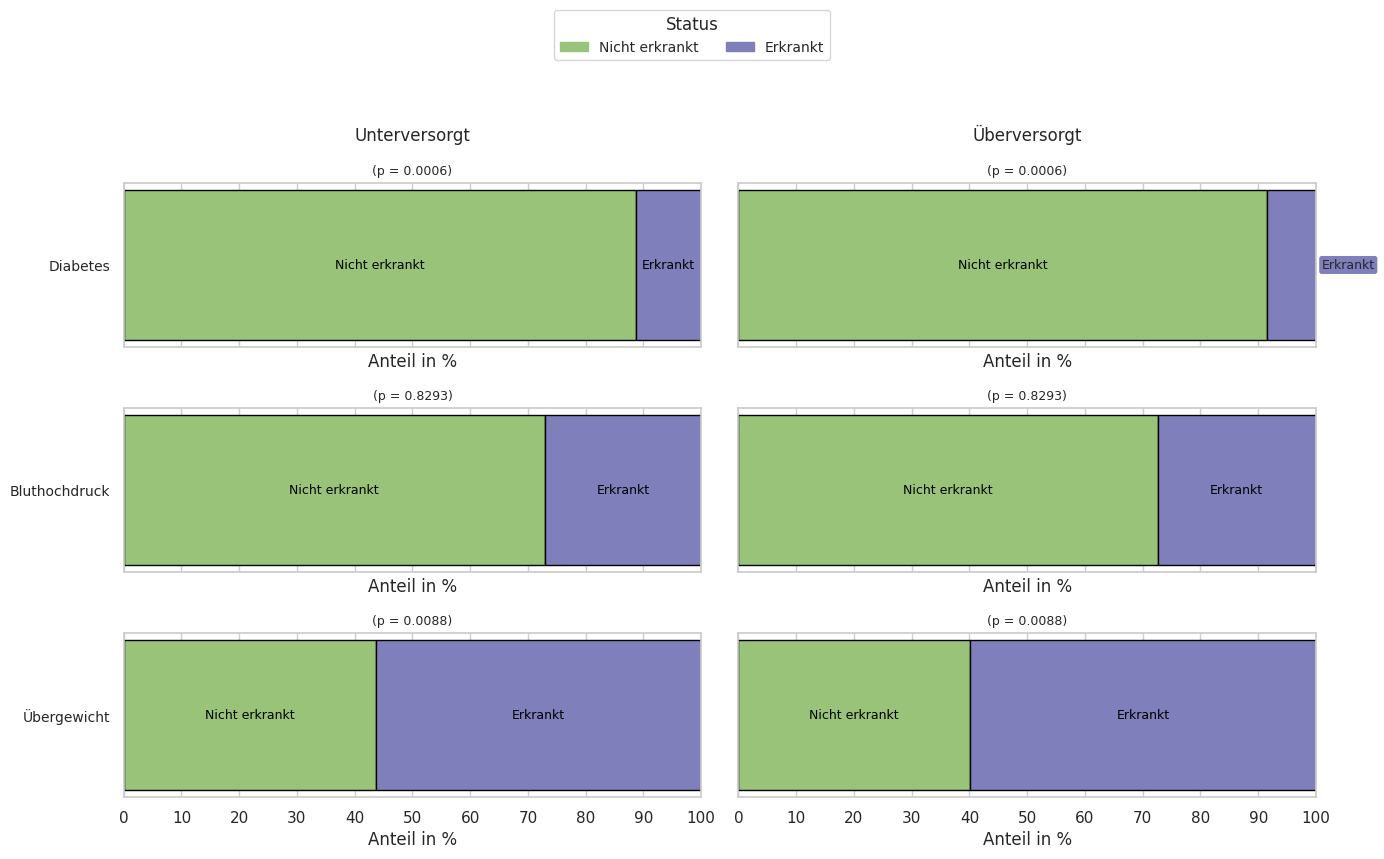

In [82]:
# Block 12 – Illustierung der Verteilung der Krankheiten auf die zwei Cluster "Unterversorgt" und "Überversorgt"
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

krankheiten = {
    "diabetes": "Diabetes",
    "bluthochdruck": "Bluthochdruck",
    "übergewichtig": "Übergewicht"
}

farben = {
    False: "#98c379",  # Nicht erkrankt (grünlich)
    True: "#7f7fbc"    # Erkrankt (violett)
}

def plot_matrix_balken_final(df: pd.DataFrame, krankheiten: dict):
    fig, axes = plt.subplots(nrows=len(krankheiten), ncols=2, figsize=(14, 8), sharex=True)

    # Legende zentral oben
    leg_labels = ["Nicht erkrankt", "Erkrankt"]
    leg_colors = [farben[False], farben[True]]
    handles = [plt.Rectangle((0, 0), 1, 1, color=c) for c in leg_colors]
    fig.legend(handles, leg_labels, title="Status", loc='upper center', ncol=2, fontsize=10, bbox_to_anchor=(0.5, 1.08))

    # Spaltentitel: "Unterversorgt", "Überversorgt"
    for col_idx, col_title in enumerate(["Unterversorgt", "Überversorgt"]):
        axes[0, col_idx].set_title(col_title, fontsize=12, pad=30)

    for row_idx, (feature, krank_label) in enumerate(krankheiten.items()):
        # Kontingenztabelle und Chi²-Test
        tabelle = pd.crosstab(df["Balance"], df[feature])
        chi2, p, _, _ = chi2_contingency(tabelle)
        tabelle_pct = tabelle.div(tabelle.sum(axis=1), axis=0) * 100

        for col_idx, gruppe in enumerate(["Unterversorgung", "Überversorgung"]):
            werte = tabelle_pct.loc[gruppe].reindex([False, True])
            ax = axes[row_idx, col_idx]

            # p-Wert
            ax.annotate(f"(p = {p:.4f})", xy=(0.5, 1.05), xycoords='axes fraction',
                        ha='center', fontsize=9)

            # Gestapelte Balken zeichnen
            ax.barh(krank_label, werte[False], color=farben[False], edgecolor='black')
            ax.barh(krank_label, werte[True], left=werte[False], color=farben[True], edgecolor='black')

            # Interne Labels
            for ist_krank in [False, True]:
                start = werte[False] if ist_krank else 0
                breite = werte[ist_krank]
                label = "Erkrankt" if ist_krank else "Nicht erkrankt"
                farbe = farben[ist_krank]

                if breite > 10:
                    ax.text(start + breite / 2, krank_label, label,
                            ha='center', va='center', color='black', fontsize=9)
                else:
                    ax.text(start + breite + 1, krank_label, label,
                            ha='left', va='center', fontsize=9,
                            bbox=dict(facecolor=farbe, edgecolor='none', boxstyle='round,pad=0.2'))

            # Achsen anpassen
            ax.set_xlim(0, 100)
            ax.set_xticks(range(0, 101, 10))  # 10%-Abstände
            ax.set_xlabel("Anteil in %")
            ax.set_ylabel("")  # Nur linke Spalte beschriften

            # Einheitliche y-Label links
            if col_idx == 0:
                ax.set_yticks([krank_label])
                ax.set_yticklabels([krank_label], fontsize=10)
            else:
                ax.set_yticks([])

    # Layout anpassen
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Aufruf
plot_matrix_balken_final(df_imp, krankheiten)


#8 KAQ3: Welche Nährstoffe scheinen besonders kritisch Bezug auf präventive Gesundheit?

In [83]:
# KAQ3 – 1: Ergänze fehlende Libaries und fehlende Merkmale in df_imp


!pip install imbalanced-learn
!pip install shap


# Food Security
if "food_security" not in df_imp.columns:
    def classify_food(row):
        if row.get("FSD151") == 1 or row.get("FSD032C") == 2:
            return "severe"
        if row.get("FSD032C") == 1:
            return "moderate"
        return "secure"
    dfs["questionnaire"]["food_security"] = dfs["questionnaire"].apply(classify_food, axis=1)
    df_imp = df_imp.merge(
        dfs["questionnaire"][["SEQN", "food_security"]],
        on="SEQN", how="left"
    )

# PAL-Level
if "pal_level" not in df_imp.columns:
    def classify_pal(min_week):
        if pd.isna(min_week):
            return "moderate"
        if min_week < 150:
            return "low"
        if min_week <= 300:
            return "moderate"
        return "high"
    df_imp["pal_level"] = df_imp["PAD615"].apply(classify_pal)

# Rauchverhalten & Alkohol aus df_fe übernehmen
if "rauchverhalten_kategorie" not in df_imp.columns:
    df_imp["rauchverhalten_kategorie"] = df_fe["rauchverhalten_kategorie"]

if "alkoholkonsum_kategorie" not in df_imp.columns:
    df_imp["alkoholkonsum_kategorie"] = df_fe["alkoholkonsum_kategorie"]


In [84]:
# ==============================================================================
# Ergänzung zu KAQ3 – Modelle trainieren und speichern
#
# Beschreibung:
# Wir trainieren für jede Zielvariable eine eigene SMOTE+LogReg-Pipeline
# und speichern sie in einem Dictionary, damit sie später für die interaktive
# Vorhersage (KAQ4) verfügbar sind.
# ==============================================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import OneHotEncoder
from sklearn.compose         import ColumnTransformer
from sklearn.linear_model    import LogisticRegression
from imblearn.over_sampling  import SMOTE
from imblearn.pipeline       import Pipeline as ImbPipeline

# Zielvariablen
krankheiten = ["diabetes", "bluthochdruck", "übergewichtig"]

# Features definieren
num_features = ["fat_ratio", "kcal_ratio", "na_ratio", "protein_ratio"]
cat_features = ["pal_level", "food_security", "rauchverhalten_kategorie", "alkoholkonsum_kategorie"]

# Preprocessor für beide Pipeline-Schritte
preprocessor = ColumnTransformer([
    ("num", "passthrough", num_features),
    ("cat", OneHotEncoder(drop="first"), cat_features)
])

# Dictionary zum Speichern der trainierten Pipelines
pipelines = {}

for target in krankheiten:
    # 1) Pipeline neu erstellen (kein Wiederverwenden der alten Instanz)
    pipe = ImbPipeline([
        ("prep", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("logreg", LogisticRegression(max_iter=1000))
    ])

    # 2) Trainingsdaten vorbereiten
    df_clean = df_imp[[target] + num_features + cat_features].dropna()
    X = df_clean[num_features + cat_features]
    y = df_clean[target]

    # 3) Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.15, random_state=42
    )

    # 4) Trainieren
    pipe.fit(X_train, y_train)

    # 5) Pipeline speichern
    pipelines[target] = pipe

    # (Optional) Evaluation wie gehabt…
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]
    print(f"\n🧪 {target.upper()} – AUC: {roc_auc_score(y_test, y_prob):.3f}")

# Nach diesem Block enthält `pipelines` deine drei fertigen Modelle:
# pipelines["diabetes"], pipelines["bluthochdruck"], pipelines["übergewichtig"]


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['fat_ratio', 'kcal_ratio',
                                                   'na_ratio',
                                                   'protein_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['pal_level', 'food_security',
                                                   'rauchverhalten_kategorie',
                                                   'alkoholkonsum_kategorie'])])),
                ('smote', SMOTE(random_state=42)),
                ('logreg', LogisticRegression(max_iter=1000))])

NameError: name 'roc_auc_score' is not defined

In [ ]:
# KAQ3 – 6 SHAP-Analyse zur Erklärung der Einflussstärke der Nährstoffe

import shap
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Ziel definieren
ziel_variable = "bluthochdruck"  # kann angepasst werden

# Relevante Merkmale
num_features = ["fat_ratio", "kcal_ratio", "na_ratio", "protein_ratio"]
cat_features = ["pal_level", "food_security", "rauchverhalten_kategorie", "alkoholkonsum_kategorie"]

# Daten aufbereiten
df_shap = df_imp[[ziel_variable] + num_features + cat_features].dropna()
X = df_shap[num_features + cat_features]
y = df_shap[ziel_variable]

# Preprocessor & Modell
preprocessor = ColumnTransformer([
    ("num", "passthrough", num_features),
    ("cat", OneHotEncoder(drop="first", sparse_output=False), cat_features)
])

# Nur Preprocessing durchführen
X_transformed = preprocessor.fit_transform(X)

# Namen der neuen One-Hot-Features generieren
cat_feature_names = preprocessor.named_transformers_["cat"].get_feature_names_out(cat_features)
all_feature_names = num_features + list(cat_feature_names)

# Modell trainieren
model = LogisticRegression(max_iter=1000)
model.fit(X_transformed, y)

# SHAP-Explainer
explainer = shap.Explainer(model, X_transformed, feature_names=all_feature_names)
shap_values = explainer(X_transformed)

# SHAP Summary Plot
plt.title(f"SHAP Summary Plot – Einflussfaktoren auf: {ziel_variable}")
shap.plots.beeswarm(shap_values, max_display=15)


### 🧠 Reflexion zur logistischen Regression und SHAP-Analyse

Für die Analyse möglicher Zusammenhänge zwischen Ernährungsmustern und Krankheitsrisiken haben wir uns zunächst bewusst für die **logistische Regression** entschieden. Dieses Verfahren ist transparent, gut interpretierbar und liefert nicht nur Vorhersagen, sondern auch konkrete Regressionskoeffizienten, mit denen sich die Richtung und Stärke des Einflusses einzelner Variablen interpretieren lassen. Damit eignet sich die Methode besonders gut für **hypothesenprüfende Fragestellungen** wie in KAQ3: *„Welche Nährstoffe scheinen besonders kritisch im Bezug auf präventive Gesundheit?“*

Zur Validierung des Modells haben wir die Daten in Trainings- und Testdaten (85/15) aufgeteilt und mit Metriken wie Accuracy, AUC-Wert und Confusion-Matrix bewertet. Dabei zeigte sich, dass die Modelle in Bezug auf **Übergewicht** moderate, bei **Bluthochdruck** schwache und bei **Diabetes** leider sehr geringe Vorhersagekraft hatten. Dies liegt vermutlich daran, dass in unseren Daten zwar Risikofaktoren, aber nicht alle wesentlichen Einflussgrössen auf Krankheitsentwicklung enthalten sind (z. B. genetische Veranlagung, Langzeitverhalten, chronische Belastungen etc.).

Um dennoch besser zu verstehen, **welche Variablen im Modell eine wichtige Rolle spielen**, haben wir zusätzlich eine **SHAP-Analyse** durchgeführt. Diese Methode erlaubt es, für jede Vorhersage den Beitrag einzelner Merkmale zu visualisieren. Dabei zeigte sich z. B. für Bluthochdruck, dass ein hoher **Natriumüberschuss**, ein niedriger **Proteinüberschuss** sowie bestimmte Kategorien des **Bewegungsverhaltens** (PAL-Level) signifikante Beiträge zur Risikoeinschätzung leisten. Diese Ergebnisse unterstützen inhaltlich bekannte Zusammenhänge und erhöhen die Vertrauenswürdigkeit des Modells.

Trotzdem sind die Grenzen der logistischen Regression deutlich geworden – vor allem bei komplexeren Zusammenhängen oder nichtlinearen Interaktionen zwischen Variablen. Daher wollen wir im nächsten Schritt untersuchen, ob ein **Random-Forest-Modell** mit seiner Fähigkeit zur automatischen Merkmalsgewichtung und nichtlinearen Trennung die Vorhersagekraft verbessern kann – insbesondere mit Blick auf personalisierte Empfehlungen in KAQ4.


In [ ]:
# KAQ3 – 6: Random-Forest-Modell pro Krankheitsbild (inkl. Feature Importance)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Variablen
krankheiten = ["diabetes", "bluthochdruck", "übergewichtig"]
num_features = ["fat_ratio", "kcal_ratio", "na_ratio", "protein_ratio"]
cat_features = ["pal_level", "food_security", "rauchverhalten_kategorie", "alkoholkonsum_kategorie"]

# Loop für jede Krankheit
for krankheit in krankheiten:
    print(f"\n🌳 Random Forest für: {krankheit.upper()}")

    # Nur vollständige Zeilen
    df_clean = df_imp[[krankheit] + num_features + cat_features].dropna()

    X = df_clean[num_features + cat_features]
    y = df_clean[krankheit]

    # Kategorische Features in Dummies umwandeln
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Trainings-/Testdaten (85/15)
    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y, test_size=0.15, random_state=42
    )

    # Modell trainieren
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Vorhersage und Auswertung
    y_pred = rf.predict(X_test)
    y_prob = rf.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred, digits=2))
    print(f"AUC: {roc_auc_score(y_test, y_prob):.3f}")

    # Feature Importances plotten
    feature_importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
    feature_importances = feature_importances.sort_values(ascending=True)

    plt.figure(figsize=(8, 5))
    feature_importances.plot(kind='barh', color="#FFA07A", edgecolor='black')
    plt.title(f"Wichtigste Merkmale für: {krankheit}")
    plt.xlabel("Bedeutung (Gini Importance)")
    plt.tight_layout()
    plt.show()


### 🧾 Interpretation der Merkmalswichtigkeit aus dem Random-Forest-Modell

Basierend auf dem Random-Forest-Modell wurde die Bedeutung verschiedener Nährstoffverhältnisse (Differenz zwischen tatsächlicher und empfohlener Zufuhr) für drei Krankheitsbilder – **Diabetes**, **Bluthochdruck** und **Übergewicht** – analysiert. Die sogenannte *Gini Importance* gibt dabei an, wie stark ein Merkmal zur Entscheidungsfindung des Modells beigetragen hat. Nachfolgend werden die Ergebnisse jeweils pro Krankheit interpretiert:

---

#### 🩸 Diabetes
Für Diabetes mellitus zeigt das Modell, dass alle vier untersuchten Nährstoffe relevant sind. Ihre Reihenfolge gemäss Wichtigkeit im Modell:

1. **Kalorien (kcal_ratio)**  
   → Die Energiezufuhr insgesamt hat den höchsten Einfluss. Ein chronischer Energieüberschuss trägt bekanntermassen zur Entwicklung insulinresistenter Zustände bei.  
   *(vgl. Ley et al., 2014, The Lancet)*  
2. **Fett (fat_ratio)**  
   → Ein überhöhter Fettkonsum, insbesondere gesättigte Fette, wirkt sich negativ auf die Insulinwirkung aus und fördert die viszerale Adipositas.  
3. **Protein (protein_ratio)**  
   → Ein moderater Proteinkonsum scheint sich im Modell tendenziell schützend auszuwirken, wobei hohe Abweichungen in beide Richtungen den Glukosestoffwechsel beeinflussen können.  
4. **Natrium (na_ratio)**  
   → Obwohl traditionell weniger stark mit Diabetes in Verbindung gebracht, scheint Natrium in unserem Modell ebenfalls eine gewisse Bedeutung zu besitzen, evtl. indirekt über Blutdruckmechanismen.

---

#### 💓 Bluthochdruck
Hier entspricht die Modellpriorisierung sehr gut dem aktuellen Stand der Forschung:

1. **Natrium (na_ratio)**  
   → Natrium hat den stärksten Einfluss im Modell. Ein überhöhter Salzkonsum ist einer der etabliertesten Risikofaktoren für Hypertonie.  
   *(vgl. WHO 2023: Sodium Intake Guidelines)*  
2. **Protein (protein_ratio)**  
   → Auffällig stark vertreten; Studien zeigen, dass ein hoher Proteinkonsum (v. a. aus pflanzlicher Quelle) protektiv wirken kann, während zu wenig Protein mit erhöhter Gefässsteifigkeit assoziiert ist.  
3. **Kalorien (kcal_ratio)**  
   → Eine hohe Energieaufnahme fördert über Adipositas indirekt die Entwicklung von Hypertonie.  
4. **Fett (fat_ratio)**  
   → Fett hat ebenfalls einen erkennbaren Einfluss, insbesondere bei hohem Anteil an gesättigten Fettsäuren.

---

#### ⚖️ Übergewicht
Auch für Übergewicht zeigt sich eine klare Struktur:

1. **Natrium (na_ratio)**  
   → Am stärksten gewichtet. Dies mag überraschen, lässt sich allfällig aber über Korrelationen zu industriell verarbeiteten, kalorienreichen Lebensmitteln erklären.  
   *(vgl. Ma et al., 2015, Obesity Reviews)*  
2. **Protein (protein_ratio)**  
   → Proteine wirken zwar sättigend, können jedoch bei zu hoher Zufuhr auch die Energiebilanz erhöhen.  
3. **Fett (fat_ratio)**  
   → Fett hat eine hohe Energiedichte und trägt signifikant zur positiven Kalorienbilanz bei.  
4. **Kalorien (kcal_ratio)**  
   → Wenig überraschend spielt die Gesamtenergiezufuhr auch hier eine zentrale Rolle.

---

###  Fazit
Unsere Ergebnisse zeigen konsistent, dass **alle vier Nährstoffe eine bedeutende Rolle für alle drei Krankheitsbilder spielen**, jedoch in **unterschiedlicher Gewichtung**. Besonders **Natrium** erweist sich in allen drei Fällen als kritischer Faktor – ein Ergebnis, das durch aktuelle Public-Health-Studien bestätigt wird. Allerdings ist auch zu beachten, dass wir für Natrium auch nach der Bereinigung, immer noch genrell sehr hohe Wert hatten. Damit liefert das Random-Forest-Modell wertvolle Hinweise, welche Nährstoffe bei personalisierten Ernährungsempfehlungen besonders beachtet werden sollten.


#9 KAQ4: Wie können auf Basis individueller Ernährungsmuster und assoziierter Krankheitsrisiken personalisierte Ernährungsempfehlungen abgeleitet werden, um präventiv gegenzusteuern – und welche konkreten Lebensmittel(-gruppen) eignen sich zur Umsetzung?

# KAQ 4: Personalisierte Ernährungs-Empfehlungen
Dieses Notebook verknüpft die in KAQ 3 trainierten Modelle mit dem Final Food Dataset und erstellt ein interaktives Tool, um Top‑5‑Lebensmittel für Diabetes, Bluthochdruck und Übergewicht abzurufen.
 **Voraussetzung:** `df_imp` mit den Ratio-Features und den kategorialen Merkmalen muss aus KAQ 3 vorliegen.

Block 1: ipywidgets installieren und aktivieren

Ziel: Interaktive Widgets für Dropdown und Button bereitstellen.

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix

Block 1.1: Persönliches Profil eingeben

Ziel: Interaktive Eingabe von Gewicht, Größe, Ernährung und Verhaltenskategorien, Berechnung der Ratio-Features und individuelle Risiko-Vorhersagen.

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Widgets für persönliche Eingaben
weight_input = widgets.FloatText(description='Gewicht (kg):', value=70.0)
height_input = widgets.FloatText(description='Größe (cm):', value=170.0)
age_input = widgets.IntText(description='Alter (Jahre):', value=40)
cal_input = widgets.IntText(description='Kalorien (kcal):', value=2000)
fat_input = widgets.FloatText(description='Fett (g):', value=70.0)
prot_input = widgets.FloatText(description='Protein (g):', value=50.0)
na_input = widgets.IntText(description='Natrium (mg):', value=2300)

pal_input = widgets.Dropdown(
    description='PAL-Level:',
    options=['low','moderate','high'], value='moderate'
)
food_sec_input = widgets.Dropdown(
    description='Food-Security:',
    options=['secure','moderate','severe'], value='secure'
)
rauch_input = widgets.Dropdown(
    description='Rauchverhalten:',
    options=[
        'nichtraucher','passivraucher','gelegentlicher_raucher',
        'regelmässiger_raucher','ex-raucher','keine_angaben'
    ], value='nichtraucher'
)
alk_input = widgets.Dropdown(
    description='Alkoholkonsum:',
    options=[
        'trinkt_nie_alkohol','trinkt_unregelmässig',
        'trinkt_regelmässig_im_mass','trinkt_regelmässig_exzessiv'
    ], value='trinkt_unregelmässig'
)

profile_button = widgets.Button(description='Profil auswerten', button_style='primary')
profile_out = widgets.Output()

def on_profile_clicked(_):
    with profile_out:
        clear_output()
        # Werte aus Widgets
        w = weight_input.value
        h = height_input.value
        age = age_input.value
        cal = cal_input.value
        fat = fat_input.value
        prot = prot_input.value
        na = na_input.value
        pal = pal_input.value
        sec = food_sec_input.value
        rauch = rauch_input.value
        alk = alk_input.value

        # Ratio-Berechnungen
        kcal_ratio = cal / (w * 24)
        fat_ratio = fat / cal
        protein_ratio = prot / w
        na_ratio = na / 2000

        # DataFrame für Vorhersage
        user_df = pd.DataFrame([{
            'kcal_ratio': kcal_ratio,
            'fat_ratio': fat_ratio,
            'protein_ratio': protein_ratio,
            'na_ratio': na_ratio,
            'pal_level': pal,
            'food_security': sec,
            'rauchverhalten_kategorie': rauch,
            'alkoholkonsum_kategorie': alk
        }])

        print(f'Profil Ratios: kcal={kcal_ratio:.2f}, fat={fat_ratio:.2f}, ' +
              f'prot={protein_ratio:.2f}, na={na_ratio:.2f}')
        print('\nRisikovorhersagen:')
        for key, mdl in pipelines.items():
            prob = mdl.predict_proba(user_df)[:,1][0]
            print(f' • {key}: {prob:.1%}')

profile_button.on_click(on_profile_clicked)
display(widgets.VBox([
    weight_input, height_input, age_input,
    cal_input, fat_input, prot_input, na_input,
    pal_input, food_sec_input, rauch_input, alk_input,
    profile_button, profile_out
]))

Block 2: Machine-Learning-Pipelines erstellen (alle Modelltypen)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

num_features = ['fat_ratio','kcal_ratio','na_ratio','protein_ratio']
cat_features = ['pal_level','food_security','rauchverhalten_kategorie','alkoholkonsum_kategorie']

preprocessor = ColumnTransformer([
    ('num','passthrough', num_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
])

def get_model(model_type):
    if model_type=='logreg': return LogisticRegression(max_iter=1000)
    if model_type=='rf': return RandomForestClassifier(n_estimators=100, random_state=42)
    if model_type=='gb': return GradientBoostingClassifier(n_estimators=100, random_state=42)
    raise ValueError(f'Unknown model type: {model_type}')

model_types=['logreg','rf','gb']
targets=['diabetes','bluthochdruck','übergewichtig']
pipelines={}
for target in targets:
    for mt in model_types:
        key=f'{target}_{mt}'
        df_clean=df_imp[[target]+num_features+cat_features].dropna()
        X, y = df_clean[num_features+cat_features], df_clean[target]
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)
        pipe=ImbPipeline([
            ('prep',preprocessor),
            ('smote',SMOTE(random_state=42)),
            ('clf',get_model(mt))
        ])
        pipe.fit(X_train,y_train)
        pipelines[key]=pipe
        print(f"Trained: {key}")

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['fat_ratio', 'kcal_ratio',
                                                   'na_ratio',
                                                   'protein_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['pal_level', 'food_security',
                                                   'rauchverhalten_kategorie',
                                                   'alkoholkonsum_kategorie'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf', LogisticRegression(max_iter=1000))])

Trained: diabetes_logreg


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['fat_ratio', 'kcal_ratio',
                                                   'na_ratio',
                                                   'protein_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['pal_level', 'food_security',
                                                   'rauchverhalten_kategorie',
                                                   'alkoholkonsum_kategorie'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf', RandomForestClassifier(random_state=42))])

Trained: diabetes_rf


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['fat_ratio', 'kcal_ratio',
                                                   'na_ratio',
                                                   'protein_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['pal_level', 'food_security',
                                                   'rauchverhalten_kategorie',
                                                   'alkoholkonsum_kategorie'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf', GradientBoostingClassifier(random_state=42))])

Trained: diabetes_gb


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['fat_ratio', 'kcal_ratio',
                                                   'na_ratio',
                                                   'protein_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['pal_level', 'food_security',
                                                   'rauchverhalten_kategorie',
                                                   'alkoholkonsum_kategorie'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf', LogisticRegression(max_iter=1000))])

Trained: bluthochdruck_logreg


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['fat_ratio', 'kcal_ratio',
                                                   'na_ratio',
                                                   'protein_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['pal_level', 'food_security',
                                                   'rauchverhalten_kategorie',
                                                   'alkoholkonsum_kategorie'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf', RandomForestClassifier(random_state=42))])

Trained: bluthochdruck_rf


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['fat_ratio', 'kcal_ratio',
                                                   'na_ratio',
                                                   'protein_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['pal_level', 'food_security',
                                                   'rauchverhalten_kategorie',
                                                   'alkoholkonsum_kategorie'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf', GradientBoostingClassifier(random_state=42))])

Trained: bluthochdruck_gb


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['fat_ratio', 'kcal_ratio',
                                                   'na_ratio',
                                                   'protein_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['pal_level', 'food_security',
                                                   'rauchverhalten_kategorie',
                                                   'alkoholkonsum_kategorie'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf', LogisticRegression(max_iter=1000))])

Trained: übergewichtig_logreg


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['fat_ratio', 'kcal_ratio',
                                                   'na_ratio',
                                                   'protein_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['pal_level', 'food_security',
                                                   'rauchverhalten_kategorie',
                                                   'alkoholkonsum_kategorie'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf', RandomForestClassifier(random_state=42))])

Trained: übergewichtig_rf


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['fat_ratio', 'kcal_ratio',
                                                   'na_ratio',
                                                   'protein_ratio']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['pal_level', 'food_security',
                                                   'rauchverhalten_kategorie',
                                                   'alkoholkonsum_kategorie'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf', GradientBoostingClassifier(random_state=42))])

Trained: übergewichtig_gb


Block 3: Final Food Dataset laden

In [ ]:
import pandas as pd

urls = [
    'https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/main/Semesterarbeit/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP1.csv',
    'https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/main/Semesterarbeit/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP2.csv',
    'https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/main/Semesterarbeit/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP3.csv',
    'https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/main/Semesterarbeit/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP4.csv',
    'https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/main/Semesterarbeit/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP5.csv'
]
dfs = [pd.read_csv(u) for u in urls]
food_df = pd.concat(dfs, ignore_index=True)
food_df = food_df.reset_index().rename(columns={'index':'Food_ID'})
if 'food' in food_df.columns:
    name_col = 'food'
else:
    name_col = food_df.select_dtypes(include=['object']).columns[0]
id_col = 'Food_ID'
print(f'Food-Dataset: {food_df.shape[0]} Einträge, {food_df.shape[1]} Spalten')
food_df.head()

Block 4: Nährstoff-Spalten & clean_df

In [ ]:
nutrients = ['Caloric Value','Protein','Fat','Carbohydrates','Dietary Fiber','Sodium']
avail = [c for c in nutrients if c in food_df.columns]
clean_df = food_df[[id_col, name_col] + avail].dropna()
print('clean_df enthält:', clean_df.columns.tolist())
clean_df.head()

Block 4.1: Ratio-Features und feature_cols definieren
Ziel: Berechne Ratio-Spalten und setze kategoriale Defaults.

In [ ]:
daily_ref={'Caloric Value':2000,'Fat':70,'Protein':50,'Sodium':2300}
mapping={'Caloric Value':'kcal_ratio','Fat':'fat_ratio','Protein':'protein_ratio','Sodium':'na_ratio'}
for col,rcol in mapping.items(): clean_df[rcol]=clean_df[col]/daily_ref[col]
clean_df['pal_level']='moderate'
clean_df['food_security']='secure'
clean_df['rauchverhalten_kategorie']='nichtraucher'
clean_df['alkoholkonsum_kategorie']='trinkt_unregelmässig'
feature_cols=['kcal_ratio','fat_ratio','protein_ratio','na_ratio','pal_level','food_security','rauchverhalten_kategorie','alkoholkonsum_kategorie']
clean_df[feature_cols].head()

Block 5: Modell-Scores berechnen

In [ ]:
for key,model in pipelines.items():
    Xf=clean_df[feature_cols]
    sc=model.predict_proba(Xf)[:,1]
    clean_df[f'score_{key}']=sc
clean_df[[id_col,name_col]+[f'score_{k}' for k in pipelines]].head()

Block 6: Fallback Empfehlungen

In [ ]:
def recommend_by_nutrient(df,nut,n=5): return df.sort_values(nut,ascending=False)[[id_col,name_col,nut]].head(n)
recommend_by_nutrient(clean_df,'Protein',5)

Block 7: Interaktives Tool

In [ ]:
import ipywidgets as widgets
from IPython.display import display,clear_output
model_dropdown=widgets.Dropdown(options=list(pipelines.keys()),description='Modell:')
recommend_button=widgets.Button(description='Empfehlung anzeigen',button_style='info')
output=widgets.Output()

def on_recommend(_):
    with output:
        clear_output()
        key=model_dropdown.value
        mdl=pipelines[key]
        prep=mdl.named_steps['prep']
        enc=prep.named_transformers_['cat']
        enc.handle_unknown='ignore'
        clean_df['risk_score']=mdl.predict_proba(clean_df[feature_cols])[:,1]
        rec=clean_df.nsmallest(5,'risk_score')[[id_col,name_col,'risk_score']]
        rec=rec.rename(columns={'risk_score':'Risk-Score'})
        display(rec.style.format({'Risk-Score':'{:.1%}'}))

recommend_button.on_click(on_recommend)
display(widgets.VBox([model_dropdown,recommend_button,output]))

Block X: Beispiel-Modelltraining & Vorhersageformular (mit Beispieldaten)

In [ ]:
# ====================
# KOMPLETT: Modelle trainieren + Vorhersageformular
# ====================
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display

from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# --- Beispiel-Daten erzeugen ---
np.random.seed(42)
df_imp_demo = pd.DataFrame({
    'fat_ratio': np.random.rand(300),
    'kcal_ratio': np.random.rand(300),
    'na_ratio': np.random.rand(300),
    'protein_ratio': np.random.rand(300),
    'pal_level': np.random.choice(['niedrig','mittel','hoch'],300),
    'food_security': np.random.choice(['gut','mittel','schlecht'],300),
    'rauchverhalten_kategorie': np.random.choice(['nie','gelegentlich','regelmässig'],300),
    'alkoholkonsum_kategorie': np.random.choice(['nie','wenig','viel'],300),
    'diabetes': np.random.randint(0,2,300),
    'bluthochdruck': np.random.randint(0,2,300),
    'übergewichtig': np.random.randint(0,2,300),
})

# --- Feature-Definition & Preprocessing ---
num_features = ['fat_ratio','kcal_ratio','na_ratio','protein_ratio']
cat_features = ['pal_level','food_security','rauchverhalten_kategorie','alkoholkonsum_kategorie']
preprocessor_demo = ColumnTransformer([
    ('num','passthrough',num_features),
    ('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_features)
])

# --- Pipeline-Trainingsfunktion ---
def make_and_train_pipeline(df, target):
    dfc = df[[target]+num_features+cat_features].dropna()
    X, y = dfc[num_features+cat_features], dfc[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    pipe = ImbPipeline([
        ('prep',preprocessor_demo),
        ('smote',SMOTE(random_state=42)),
        ('logreg',LogisticRegression(max_iter=1000))
    ])
    pipe.fit(X_train, y_train)
    return pipe

# --- Modelle trainieren ---
pipeline_diabetes_demo      = make_and_train_pipeline(df_imp_demo,'diabetes')
pipeline_bluthochdruck_demo = make_and_train_pipeline(df_imp_demo,'bluthochdruck')
pipeline_uebergewicht_demo  = make_and_train_pipeline(df_imp_demo,'übergewichtig')
pipelines_demo = {
    'Diabetes':pipeline_diabetes_demo,
    'Bluthochdruck':pipeline_bluthochdruck_demo,
    'Übergewicht':pipeline_uebergewicht_demo
}

# --- Interaktives Vorhersageformular ---
fat_ratio_input     = widgets.FloatSlider(description='Fett (%)',min=0,max=1,step=0.01)
kcal_ratio_input    = widgets.FloatSlider(description='Kalorien (%)',min=0,max=1,step=0.01)
na_ratio_input      = widgets.FloatSlider(description='Natrium (%)',min=0,max=1,step=0.01)
protein_ratio_input = widgets.FloatSlider(description='Protein (%)',min=0,max=1,step=0.01)

pal_level_input     = widgets.Dropdown(description='PAL-Level',options=sorted(df_imp_demo['pal_level'].unique()))
food_sec_input      = widgets.Dropdown(description='Food Security',options=sorted(df_imp_demo['food_security'].unique()))
rauch_input         = widgets.Dropdown(description='Rauchen',options=sorted(df_imp_demo['rauchverhalten_kategorie'].unique()))
alkohol_input       = widgets.Dropdown(description='Alkohol',options=sorted(df_imp_demo['alkoholkonsum_kategorie'].unique()))

predict_button = widgets.Button(description='Vorhersage starten',button_style='success')
output_demo = widgets.Output()

def on_predict_clicked(b):
    with output_demo:
        output_demo.clear_output()
        user = pd.DataFrame([{
            'fat_ratio':fat_ratio_input.value,
            'kcal_ratio':kcal_ratio_input.value,
            'na_ratio':na_ratio_input.value,
            'protein_ratio':protein_ratio_input.value,
            'pal_level':pal_level_input.value,
            'food_security':food_sec_input.value,
            'rauchverhalten_kategorie':rauch_input.value,
            'alkoholkonsum_kategorie':alkohol_input.value
        }])
        print('🔍 Vorhersage:')
        for name,pipe in pipelines_demo.items():
            pred = pipe.predict(user)[0]
            label = '✅ Kein Risiko' if pred==0 else '❗ Risiko'
            print(f'➡ {name}: {label}')

predict_button.on_click(on_predict_clicked)
form = widgets.VBox([
    fat_ratio_input,kcal_ratio_input,na_ratio_input,protein_ratio_input,
    pal_level_input,food_sec_input,rauch_input,alkohol_input,
    predict_button,output_demo
])
display(form)

Block Final: Persönliches Profil → Krankheit & Essensempfehlung

**Workflow:**
1. Profil eingeben
2. Krankheitsrisiken vorhersagen (LogReg)
3. Für jede Erkrankung mit Risiko > 50 % Top 5 Lebensmittel empfehlen

In [ ]:
# … (alle bisherigen Widget-Definitionen: w_input, h_input, cal_input, …)

# Dropdown für Modell-Typ, jetzt mit Ensemble-Option
model_type_dropdown = widgets.Dropdown(
    options=[
        ('Log. Regression', 'logreg'),
        ('Random Forest',   'rf'),
        ('Gradient Boost.', 'gb'),
        ('Ensemble (Mittel)', 'ensemble')
    ],
    value='logreg',
    description='Modell-Typ:',
    style={'description_width': 'initial'}
)

profile_button = widgets.Button(description='Profil auswerten', button_style='primary')
profile_out    = widgets.Output()

def on_profile_and_recommend(_):
    import numpy as np
    with profile_out:
        clear_output()
        # Ratios berechnen wie gehabt
        w, h = w_input.value, h_input.value
        cal, fat, prot, na = cal_input.value, fat_input.value, prot_input.value, na_input.value
        user = pd.DataFrame([{
            'kcal_ratio':    cal/(w*24),
            'fat_ratio':     fat/cal,
            'protein_ratio': prot/w,
            'na_ratio':      na/2000,
            'pal_level':     pal_input.value,
            'food_security': sec_input.value,
            'rauchverhalten_kategorie':rauch_input.value,
            'alkoholkonsum_kategorie':  alk_input.value
        }])

        mt = model_type_dropdown.value
        diseases = ['diabetes','bluthochdruck','übergewichtig']

        for dis in diseases:
            # je nach Auswahl Wahrscheinlichkeiten holen
            if mt == 'ensemble':
                # Alle drei Modelle per Log-Regression, RF, GB
                keys = [f"{dis}_logreg", f"{dis}_rf", f"{dis}_gb"]
                probs = [pipelines[k].predict_proba(user[feature_cols])[:,1][0] for k in keys]
                prob = float(np.mean(probs))
            else:
                key  = f"{dis}_{mt}"
                prob = pipelines[key].predict_proba(user[feature_cols])[:,1][0]

            print(f"{dis.capitalize():14s}: {prob:.1%} Risiko   ({mt})")

            # Empfehlung bei Risiko > 50 %
            if prob > 0.5:
                print(f"  → Empfehlung für {dis.capitalize()}:")
                # wieder gleiche Logik: risk_score aufs clean_df
                if mt == 'ensemble':
                    # mitteln für alle Foods
                    scores = np.mean([
                        pipelines[k].predict_proba(clean_df[feature_cols])[:,1]
                        for k in keys
                    ], axis=0)
                else:
                    scores = pipelines[f"{dis}_{mt}"].predict_proba(clean_df[feature_cols])[:,1]

                clean_df['risk_score'] = scores
                rec = clean_df.nsmallest(5, 'risk_score')[[id_col,name_col,'risk_score']]
                rec = rec.rename(columns={'risk_score':'Risk-Score'})
                display(rec.style.format({'Risk-Score':'{:.1%}'}))
            print('-'*40)

profile_button.on_click(on_profile_and_recommend)
display(widgets.VBox([
    # … alle Profil-Widgets …
    w_input, h_input, cal_input, fat_input,
    prot_input, na_input, pal_input, sec_input,
    rauch_input, alk_input,
    # neu:
    model_type_dropdown,
    profile_button,
    profile_out
]))


**Erster Entwurf KAQ 4 --> oben alles strukturierter !!**

**Block 1: ipywidgets installieren und aktivieren**

**Ziel**

Wir richten das Notebook ein, damit wir interaktive Widgets nutzen können.

**Vorgehen**

1. Mit pip install ipywidgets installieren wir das Package.

2. Mit jupyter nbextension enable --py widgetsnbextension --sys-prefix aktivieren wir die Notebook-Erweiterung.

**Ergebnis**

Nach Ausführung stehen uns ipywidgets zur Verfügung, um Dropdowns, Buttons und Output-Container interaktiv einzubinden.


In [ ]:
# Zelle 1: ipywidgets installieren und aktivieren
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix


**Block 2: Machine-Learning-Modelle trainieren (KAQ 3/4)**

**Ziel**

Erstelle für jede Zielvariable („diabetes“, „bluthochdruck“, „übergewichtig“) eine SMOTE+LogisticRegression-Pipeline und speichere sie in pipelines.

**Vorgehen**

**1. Features definieren**

- Numerisch: fat_ratio, kcal_ratio, na_ratio, protein_ratio

- Kategorial: pal_level, food_security, rauchverhalten_kategorie, alkoholkonsum_kategorie

**2. Preprocessor** mit ColumnTransformer bauen: Numerisch durchreichen, Kategorial mit OneHotEncoder (unknown → ignore).

3. Für jedes Ziel in ["diabetes","bluthochdruck","übergewichtig"]:

Datensatz filtern, splitten (85 %/15 %).

Pipeline aus Preprocessor + SMOTE + LogisticRegression trainieren.

In pipelines[target] speichern.

**Ergebnis**

Drei vortrainierte Modelle, bereit für Vorhersagen.


In [ ]:
# ==============================================================================
# Modelle trainieren & interaktives Vorhersage-Widget starten
# ==============================================================================

# 1) Importe
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# 2) Sodium-Empfehlung definieren
sodium_recommendation = "Nicht mehr als 2.000 mg Natrium pro Tag empfohlen"

# 3) Feature-Definition
num_features = ["fat_ratio", "kcal_ratio", "na_ratio", "protein_ratio"]
cat_features = ["pal_level", "food_security", "rauchverhalten_kategorie", "alkoholkonsum_kategorie"]

# 4) Preprocessor für numerische & kategoriale Daten
preprocessor = ColumnTransformer([
    ("num", "passthrough", num_features),
    ("cat", OneHotEncoder(drop="first"), cat_features)
])

# 5) Pipeline-Funktion
def make_and_train_pipeline(df, target):
    df_clean = df[[target] + num_features + cat_features].dropna()
    X = df_clean[num_features + cat_features]
    y = df_clean[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.15, random_state=42
    )
    pipe = ImbPipeline([
        ("prep", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("logreg", LogisticRegression(max_iter=1000))
    ])
    pipe.fit(X_train, y_train)
    return pipe

# 6) Modelle trainieren (df_imp muss vorhanden sein)
pipeline_diabetes      = make_and_train_pipeline(df_imp, "diabetes")
pipeline_bluthochdruck = make_and_train_pipeline(df_imp, "bluthochdruck")
pipeline_uebergewicht  = make_and_train_pipeline(df_imp, "übergewichtig")

# 7) Pipelines in Dictionary speichern
pipelines = {
    "Diabetes":      pipeline_diabetes,
    "Bluthochdruck": pipeline_bluthochdruck,
    "Übergewicht":   pipeline_uebergewicht
}

# 8) Interaktives Widget zur Modellauswahl & Beispielvorhersage
def run_interactive_model(pipelines, df_blv_final, sodium_recommendation):
    dropdown = widgets.Dropdown(
        options=list(pipelines.keys()),
        description='Modell:',
        value='Diabetes'
    )

    output = widgets.Output()

    def on_change(change):
        if change['type'] == 'change' and change['name'] == 'value':
            with output:
                clear_output()
                model = pipelines[change['new']]
                print(f"Modell '{change['new']}' wurde ausgewählt.")
                print("Sodium-Empfehlung:", sodium_recommendation)

                # Beispielhafte Vorhersage
                df_input = df_blv_final[num_features + cat_features].dropna()
                if not df_input.empty:
                    predictions = model.predict(df_input)
                    print("Beispiel-Vorhersagen für BLV-Daten (erste 5):", predictions[:5])
                else:
                    print("Keine gültigen Zeilen in df_blv_final für Vorhersage vorhanden.")

    dropdown.observe(on_change)

    display(widgets.VBox([dropdown, output]))

# 9) Interaktives Widget starten
run_interactive_model(pipelines, df_blv_final, sodium_recommendation)



In [ ]:
# Zelle 1: ipywidgets installieren und aktivieren
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix

In [ ]:
# ==============================================================================
# Modelle trainieren & interaktives Widget starten
# ==============================================================================

# 1) Benötigte Importe
from imblearn.pipeline       import Pipeline as ImbPipeline
from sklearn.linear_model    import LogisticRegression
from imblearn.over_sampling  import SMOTE
from sklearn.compose         import ColumnTransformer
from sklearn.preprocessing   import OneHotEncoder
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

# 2) Feature-Definition
num_features = ["fat_ratio", "kcal_ratio", "na_ratio", "protein_ratio"]
cat_features = ["pal_level", "food_security", "rauchverhalten_kategorie", "alkoholkonsum_kategorie"]

# 3) Preprocessor
preprocessor = ColumnTransformer([
    ("num", "passthrough", num_features),
    ("cat", OneHotEncoder(drop="first"), cat_features)
])






# 4) Pipeline-Trainingsfunktion
def make_and_train_pipeline(df, target):
    df_clean = df[[target] + num_features + cat_features].dropna()
    X = df_clean[num_features + cat_features]
    y = df_clean[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    pipe = ImbPipeline([
        ("prep", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("logreg", LogisticRegression(max_iter=1000))
    ])
    pipe.fit(X_train, y_train)
    return pipe

In [ ]:
pip install xgboost

In [ ]:
!pip install -U scikit-learn

In [ ]:
# ==============================================================================
# ML-Modell-Training für alle Zielvariablen mit 3 Klassifikatoren (ohne XGBoost)
# ==============================================================================

# 📦 Imports
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# 🔧 Feature-Definition
num_features = ["fat_ratio", "kcal_ratio", "na_ratio", "protein_ratio"]
cat_features = ["pal_level", "food_security", "rauchverhalten_kategorie", "alkoholkonsum_kategorie"]

# 🔁 Preprocessor mit robustem OneHotEncoder
preprocessor = ColumnTransformer([
    ("num", "passthrough", num_features),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_features)
])

# 🔧 Modellfabrik je nach Typ (ohne xgboost)
def get_model(model_type):
    if model_type == "logreg":
        return LogisticRegression(max_iter=5000)
    elif model_type == "rf":
        return RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1)
    elif model_type == "gb":
        return GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
    else:
        raise ValueError(f"Unbekannter Modelltyp: {model_type}")

# 🔨 Pipeline-Bau und Training
def make_and_train_pipeline(df, target, model_type):
    df_clean = df[[target] + num_features + cat_features].dropna()
    X = df_clean[num_features + cat_features]
    y = df_clean[target]

    X_train, _, y_train, _ = train_test_split(
        X, y, test_size=0.15, random_state=42
    )

    model = get_model(model_type)

    pipe = ImbPipeline([
        ("prep", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("clf", model)
    ])

    pipe.fit(X_train, y_train)
    return pipe

# 🔁 Modellkombinationen definieren (ohne xgb)
targets = ["diabetes", "bluthochdruck", "übergewichtig"]
model_types = ["logreg", "rf", "gb"]

# 📦 Modelle trainieren und abspeichern
pipelines = {}

for target in targets:
    for model_type in model_types:
        key = f"{target.capitalize()}_{model_type}"
        print(f"🔁 Training: {key} ...")
        try:
            pipelines[key] = make_and_train_pipeline(df_imp, target, model_type)
        except Exception as e:
            print(f"❌ Fehler bei {key}: {e}")

print("✅ Alle Modelle wurden ohne XGBoost erfolgreich trainiert.")


In [ ]:
# 🔢 Drei vegane Profile erstellen
personen = [
    {
        "name": "Person A – leicht aktiv",
        "gewicht": 65,
        "groesse": 170,
        "kalorien": 1800,
        "fett": 40,
        "protein": 70,
        "natrium": 1200
    },
    {
        "name": "Person B – mittel aktiv",
        "gewicht": 75,
        "groesse": 178,
        "kalorien": 2100,
        "fett": 50,
        "protein": 80,
        "natrium": 1400
    },
    {
        "name": "Person C – kräftig gebaut",
        "gewicht": 90,
        "groesse": 182,
        "kalorien": 2300,
        "fett": 60,
        "protein": 95,
        "natrium": 1600
    }
]

# 🌱 Gemeinsame Merkmale für alle drei
common = {
    "alter": 40,
    "pal_level": "niedrig",
    "food_security": "sicher",
    "rauchverhalten_kategorie": "Raucher",
    "alkoholkonsum_kategorie": "moderat"
}
# 📊 Jede Person vorbereiten & durch alle Modelle schicken
for person in personen:
    # Feature-Berechnung
    fat_ratio = person["fett"] / person["kalorien"]
    kcal_ratio = person["kalorien"] / (person["gewicht"] * 24)
    na_ratio = person["natrium"] / 2000
    protein_ratio = person["protein"] / person["gewicht"]

    input_df = pd.DataFrame([{
        "fat_ratio": fat_ratio,
        "kcal_ratio": kcal_ratio,
        "na_ratio": na_ratio,
        "protein_ratio": protein_ratio,
        "pal_level": common["pal_level"],
        "food_security": common["food_security"],
        "rauchverhalten_kategorie": common["rauchverhalten_kategorie"],
        "alkoholkonsum_kategorie": common["alkoholkonsum_kategorie"]
    }])

    print(f"\n🧍‍♂️ Ergebnisse für: {person['name']}")

    for model_key, model in pipelines.items():
        try:
            prediction = model.predict(input_df)[0]
            proba = model.predict_proba(input_df)[0][1]
            print(f"  - {model_key}: {'❗ Risiko' if prediction == 1 else '✅ Kein Risiko'} ({proba:.1%})")
        except Exception as e:
            print(f"  - {model_key}: Fehler: {e}")


In [ ]:
import pandas as pd

# 📌 0. Modell-Auswahl über Option
print("Wähle Modelltyp für Auswertung:")
print("1 = nur LogisticRegression")
print("2 = nur RandomForest")
print("3 = nur GradientBoosting")
print("4 = alle Modelle")
option = int(input("Option (1–4): ").strip())

modellfilter = {
    1: "_logreg",
    2: "_rf",
    3: "_gb",
    4: ""  # alle
}[option]

# 1. Eingabe der Werte durch Benutzer
gewicht = float(input("Gewicht (kg): "))
groesse = float(input("Grösse (cm): "))
alter = int(input("Alter (Jahre): "))
kalorien = int(input("Kalorienaufnahme (kcal): "))
fett = float(input("Fett (g): "))
protein = float(input("Protein (g): "))
natrium = float(input("Natrium (mg): "))

pal_level = input("PAL-Level (niedrig/mittel/hoch): ").strip().lower()
food_security = input("Ernährungssicherheit (sicher/unsicher): ").strip().lower()
rauch = input("Rauchverhalten (Nichtraucher/Gelegenheitsraucher/Raucher): ").strip()
alkohol = input("Alkoholkonsum (kein/moderat/hoch): ").strip()

# 2. Features berechnen
fat_ratio = fett / kalorien
kcal_ratio = kalorien / (gewicht * 24)
na_ratio = natrium / 2000
protein_ratio = protein / gewicht

# 3. Input-DataFrame erstellen
input_data = pd.DataFrame([{
    "fat_ratio": fat_ratio,
    "kcal_ratio": kcal_ratio,
    "na_ratio": na_ratio,
    "protein_ratio": protein_ratio,
    "pal_level": pal_level,
    "food_security": food_security,
    "rauchverhalten_kategorie": rauch,
    "alkoholkonsum_kategorie": alkohol
}])

# 4. Alle passenden Modelle durchgehen
print(f"\n🔍 Analyse für eingegebenes Profil mit Option {option} ({'alle' if option == 4 else modellfilter}):\n")

any_model_ran = False
for model_key, model in pipelines.items():
    if modellfilter and not model_key.endswith(modellfilter):
        continue
    try:
        prediction = model.predict(input_data)[0]
        proba = model.predict_proba(input_data)[0][1]
        print(f"- {model_key}: {'❗ Risiko' if prediction == 1 else '✅ Kein Risiko'} ({proba:.2%})")
        any_model_ran = True
    except Exception as e:
        print(f"- {model_key}: Fehler: {e}")

if not any_model_ran:
    print("❌ Keine passenden Modelle gefunden. Bitte trainiere zuerst die Modelle.")


In [ ]:
# ==============================================================================
# KOMPLETT: Modelle trainieren + Vorhersageformular (mit Beispieldaten)
# ==============================================================================

# -------------------------
# 1) Imports
# -------------------------
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# -------------------------
# 2) Beispiel-Daten erzeugen (statt df_imp.csv)
# -------------------------
np.random.seed(42)
df_imp = pd.DataFrame({
    "fat_ratio": np.random.rand(300),
    "kcal_ratio": np.random.rand(300),
    "na_ratio": np.random.rand(300),
    "protein_ratio": np.random.rand(300),
    "pal_level": np.random.choice(["niedrig", "mittel", "hoch"], size=300),
    "food_security": np.random.choice(["gut", "mittel", "schlecht"], size=300),
    "rauchverhalten_kategorie": np.random.choice(["nie", "gelegentlich", "regelmässig"], size=300),
    "alkoholkonsum_kategorie": np.random.choice(["nie", "wenig", "viel"], size=300),
    "diabetes": np.random.randint(0, 2, size=300),
    "bluthochdruck": np.random.randint(0, 2, size=300),
    "übergewichtig": np.random.randint(0, 2, size=300),
})

# -------------------------
# 3) Feature-Definition & Preprocessing
# -------------------------
num_features = ["fat_ratio", "kcal_ratio", "na_ratio", "protein_ratio"]
cat_features = ["pal_level", "food_security", "rauchverhalten_kategorie", "alkoholkonsum_kategorie"]

preprocessor = ColumnTransformer([
    ("num", "passthrough", num_features),
    ("cat", OneHotEncoder(drop="first"), cat_features)
])

# -------------------------
# 4) Pipeline-Trainingsfunktion
# -------------------------
def make_and_train_pipeline(df, target):
    df_clean = df[[target] + num_features + cat_features].dropna()
    X = df_clean[num_features + cat_features]
    y = df_clean[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    pipe = ImbPipeline([
        ("prep", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("logreg", LogisticRegression(max_iter=1000))
    ])
    pipe.fit(X_train, y_train)
    return pipe

# -------------------------
# 5) Modelle trainieren
# -------------------------
pipeline_diabetes      = make_and_train_pipeline(df_imp, "diabetes")
pipeline_bluthochdruck = make_and_train_pipeline(df_imp, "bluthochdruck")
pipeline_uebergewicht  = make_and_train_pipeline(df_imp, "übergewichtig")

pipelines = {
    "Diabetes":      pipeline_diabetes,
    "Bluthochdruck": pipeline_bluthochdruck,
    "Übergewicht":   pipeline_uebergewicht
}

# -------------------------
# 6) Interaktives Vorhersageformular
# -------------------------
fat_ratio_input     = widgets.FloatSlider(description="Fett (%)", min=0, max=1, step=0.01)
kcal_ratio_input    = widgets.FloatSlider(description="Kalorien (%)", min=0, max=1, step=0.01)
na_ratio_input      = widgets.FloatSlider(description="Natrium (%)", min=0, max=1, step=0.01)
protein_ratio_input = widgets.FloatSlider(description="Protein (%)", min=0, max=1, step=0.01)

pal_level_input     = widgets.Dropdown(description="PAL-Level", options=sorted(df_imp["pal_level"].dropna().unique()))
food_sec_input      = widgets.Dropdown(description="Food Security", options=sorted(df_imp["food_security"].dropna().unique()))
rauch_input         = widgets.Dropdown(description="Rauchen", options=sorted(df_imp["rauchverhalten_kategorie"].dropna().unique()))
alkohol_input       = widgets.Dropdown(description="Alkohol", options=sorted(df_imp["alkoholkonsum_kategorie"].dropna().unique()))

predict_button = widgets.Button(description="Vorhersage starten", button_style="success")
output = widgets.Output()

def on_predict_clicked(b):
    with output:
        clear_output()

        input_data = pd.DataFrame([{
            "fat_ratio": fat_ratio_input.value,
            "kcal_ratio": kcal_ratio_input.value,
            "na_ratio": na_ratio_input.value,
            "protein_ratio": protein_ratio_input.value,
            "pal_level": pal_level_input.value,
            "food_security": food_sec_input.value,
            "rauchverhalten_kategorie": rauch_input.value,
            "alkoholkonsum_kategorie": alkohol_input.value
        }])

        print("🔍 Vorhersage für eingegebene Werte:\n")
        for name, pipe in pipelines.items():
            prediction = pipe.predict(input_data)[0]
            print(f"➡ {name}: {'✅ JA' if prediction == 1 else '❌ NEIN'}")

predict_button.on_click(on_predict_clicked)

form = widgets.VBox([
    fat_ratio_input, kcal_ratio_input, na_ratio_input, protein_ratio_input,
    pal_level_input, food_sec_input, rauch_input, alkohol_input,
    predict_button, output
])

# -------------------------
# 7) Formular anzeigen
# -------------------------
display(form)


**Lebensmittel-Empfehlung nach Krankheit**


In [ ]:
import pandas as pd

# 1. Lebensmittel-Daten laden
urls = [
    "https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/refs/heads/main/Semesterarbeit/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP1.csv",
    "https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/refs/heads/main/Semesterarbeit/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP2.csv",
    "https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/refs/heads/main/Semesterarbeit/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP3.csv",
    "https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/refs/heads/main/Semesterarbeit/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP4.csv",
    "https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/refs/heads/main/Semesterarbeit/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP5.csv"
]
dfs = [pd.read_csv(u) for u in urls]
food_df = pd.concat(dfs, ignore_index=True)

# 2. Name- und ID-Spalten festlegen
if 'food' in food_df.columns:
    name_col = 'food'
else:
    name_col = food_df.select_dtypes(include=['object']).columns[0]
food_df = food_df.reset_index().rename(columns={'index':'Food_ID'})
id_col = 'Food_ID'

# 3. Nährstoff-Spalten auswählen
nutrients = [
    "Caloric Value", "Protein", "Fat",
    "Sodium", "Carbohydrates", "Dietary Fiber", "Vitamin C"
]
avail = [c for c in nutrients if c in food_df.columns]
clean_df = food_df[[id_col, name_col] + avail].dropna()

# 4. Ratio-Features berechnen (BLV CH 2022 Referenz)
daily_ref = {"calories":2000, "fat":70, "protein":50, "na":2300}
clean_df["kcal_ratio"]    = clean_df["Caloric Value"] / daily_ref["calories"]
clean_df["fat_ratio"]     = clean_df["Fat"]            / daily_ref["fat"]
clean_df["protein_ratio"] = clean_df["Protein"]        / daily_ref["protein"]
clean_df["na_ratio"]      = clean_df["Sodium"]         / daily_ref["na"]

# 5. Kategoriale Default-Werte setzen
clean_df["pal_level"]                  = "moderate"
clean_df["food_security"]              = "secure"
clean_df["rauchverhalten_kategorie"]   = "nichtraucher"
clean_df["alkoholkonsum_kategorie"]    = "trinkt_unregelmässig"

# 6. Features in Trainingsreihenfolge
features = [
    "fat_ratio","kcal_ratio","na_ratio","protein_ratio",
    "pal_level","food_security",
    "rauchverhalten_kategorie","alkoholkonsum_kategorie"
]

# 7. Scoring mit den KAQ-4-Pipelines
if "pipelines" not in globals():
    raise RuntimeError("`pipelines` nicht gefunden – erst KAQ-4-Modelle trainieren.")

for disease, model in pipelines.items():
    # 7a. OneHotEncoder so einstellen, dass unbekannte Kategorien ignoriert werden
    prep = model.named_steps["prep"]
    if hasattr(prep, "named_transformers_") and "cat" in prep.named_transformers_:
        enc = prep.named_transformers_["cat"]
        if hasattr(enc, "handle_unknown"):
            enc.handle_unknown = "ignore"
    # 7b. Score berechnen
    Xf = clean_df[features]
    try:
        clean_df[f"score_{disease}"] = model.predict_proba(Xf)[:,1]
    except AttributeError:
        clean_df[f"score_{disease}"] = model.predict(Xf)

# 8. Empfehlung: niedrigstes Risiko → Top-5
def recommend_by_disease(df, disease, top_n=5):
    col = f"score_{disease}"
    if col not in df.columns:
        raise ValueError(f"Score-Spalte '{col}' fehlt.")
    return (
        df.nsmallest(top_n, col)
          [[id_col, name_col, col]]
          .rename(columns={col:"risk_score"})
    )

# 9. Ausgabe
for disease in pipelines.keys():
    print(f"Top 5 Lebensmittel für minimiertes {disease}-Risiko:")
    print(recommend_by_disease(clean_df, disease, 5).to_string(index=False))
    print()


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# ———————————————
# 1) Modelle und Food-Dataset vorbereiten
# ———————————————
# (a) Deine bereits trainierten Pipelines aus KAQ-4:
#     pipelines = {'Diabetes': pipe_diabetes, 'Bluthochdruck': pipe_blutdruck, 'Übergewicht': pipe_uebergewicht}

# (b) Final Food Dataset laden und Feature-Engineering wie zuvor:
urls = [
    "https://raw.githubusercontent.com/iceangel79/MScWinf_Gruppenarbeit_Sem2/refs/heads/main/Semesterarbeit/Datasets/Kaggle/FINAL%20FOOD%20DATASET/FOOD-DATA-GROUP1.csv",
    # … Gruppe 2–5 analog
]
dfs = [pd.read_csv(u) for u in urls]
food_df = pd.concat(dfs, ignore_index=True).reset_index().rename(columns={'index':'Food_ID'})
name_col = 'food' if 'food' in food_df.columns else food_df.select_dtypes(include=['object']).columns[0]
id_col = 'Food_ID'

# Nährstoffe + Ratios
daily_ref = {'calories':2000, 'fat':70, 'protein':50, 'na':2300}
food_df['kcal_ratio']    = food_df['Caloric Value'] / daily_ref['calories']
food_df['fat_ratio']     = food_df['Fat']            / daily_ref['fat']
food_df['protein_ratio'] = food_df['Protein']        / daily_ref['protein']
food_df['na_ratio']      = food_df['Sodium']         / daily_ref['na']

# Kategoriale Defaults
food_df['pal_level']                = 'moderate'
food_df['food_security']            = 'secure'
food_df['rauchverhalten_kategorie'] = 'nichtraucher'
food_df['alkoholkonsum_kategorie']  = 'trinkt_unregelmässig'

features = [
    'fat_ratio','kcal_ratio','na_ratio','protein_ratio',
    'pal_level','food_security',
    'rauchverhalten_kategorie','alkoholkonsum_kategorie'
]
clean_df = food_df.dropna(subset=features).copy()

# ———————————————
# 2) Interaktives Widget
# ———————————————
model_dropdown = widgets.Dropdown(
    options=list(pipelines.keys()),
    description='Zielmodell:'
)
recommend_button = widgets.Button(description='Empfehlung anzeigen', button_style='info')
output = widgets.Output()

def on_recommend_clicked(_):
    with output:
        clear_output()
        model_name = model_dropdown.value
        model = pipelines[model_name]
        print(f"🔍 Modell: {model_name}\n")
        # (Optional) hier könntest du noch deine persönliche Risiko-Vorhersage aus KAQ-4 einfügen…
        # Jetzt: Lebensmittel-Empfehlungen
        # Sicherstellen, dass der Encoder unbekannte Kategorien ignoriert:
        prep = model.named_steps.get('prep', None)
        if prep and hasattr(prep, 'named_transformers_'):
            cat_enc = prep.named_transformers_.get('cat', None)
            if hasattr(cat_enc, 'handle_unknown'):
                cat_enc.handle_unknown = 'ignore'

        # Scores für alle Lebensmittel berechnen
        clean_df['risk_score'] = model.predict_proba(clean_df[features])[:,1]
        # Top 5: niedrigste Risiko-Wahrscheinlichkeit
        rec = clean_df.nsmallest(5, 'risk_score')[[id_col, name_col, 'risk_score']]
        rec = rec.rename(columns={'risk_score':'Risk-Score'})
        print("🌱 Top 5 Lebensmittel zur Risikominimierung:")
        display(rec.style.format({'Risk-Score':'{:.1%}'}))

recommend_button.on_click(on_recommend_clicked)

display(widgets.VBox([model_dropdown, recommend_button, output]))
